In [1]:
# Chargement des librairies nécessaires
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
install.packages("maps")
library(maps)
install.packages("plotly")
library(plotly)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : 'gridExtra'


L'objet suivant est masqué depuis 'package:dplyr':

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : 'plotly'


L'objet suivant est masqué depuis 'package:ggplot2':

    last_plot


L'objet suivant est masqué depuis 'package:stats':

    filter


L'objet suivant est masqué depuis 'package:graphics':

    l

In [2]:
# Lecture des données
energy <- read.table("energy.txt", sep = ",", header = TRUE)
# Premières lignes du jeu de données
head(energy)
# Vérification du contenu
summary(energy)

Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.electricity.generating.capacity.per.capita
1 9.22                                                
2 8.86                                                
3 8.47                                                
4 8.09                                                
5 7.75                                                
6 7.51                                                
  Financial.flows.to.developing.countries..US...
1    20000                                      
2   130000                                      
3  3950000                                      
4 25970000                                      
5       NA                                      
6  9830000                                      
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. ⋯
1 0.31                              ⋯
2 0.50                              ⋯
3 0.56                              ⋯
4 0.63                              ⋯
5 0.56                              ⋯
6 0.59                              ⋯
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country Renewables....equivalent.primary.energy.
1  760                              NA                                      
2  730                              NA                                      
3 1030                              NA                                      
4 1220                              NA                                      
5 1030                              NA                                      
6 1550                              NA                                      
  gdp_growth gdp_per_capita Density.n.P.Km2. La

    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [3]:
# Conversion de la variable Year en facteur
energy$Year <- as.factor(energy$Year)
# Conversion de la variable Density en variable numérique
energy$Density.n.P.Km2. <- as.numeric(gsub(",", "", energy$Density.n.P.Km2.))
summary(energy)

    Entity               Year      Access.to.electricity....of.population.
 Length:3649        2013   : 175   Min.   :  1.252                        
 Class :character   2014   : 175   1st Qu.: 59.801                        
 Mode  :character   2015   : 175   Median : 98.362                        
                    2016   : 175   Mean   : 78.934                        
                    2017   : 175   3rd Qu.:100.000                        
                    2018   : 175   Max.   :100.000                        
                    (Other):2599   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [4]:
missing_data <- colMeans(is.na(energy)) * 100

# Trier les résultats par ordre décroissant
sorted_missing_data <- sort(missing_data, decreasing = TRUE)

# Afficher les résultats de manière propre
cat("Pourcentage de données manquantes par variable (ordre décroissant):\n")
for (i in seq_along(sorted_missing_data)) {
  cat(names(sorted_missing_data)[i], ": ", sprintf("%.2f", sorted_missing_data[i]), "%\n")
}
# Suppression de la varible Renewable.electricity.generating.capacity.per.capita
energy <- subset(energy, select = -Renewable.electricity.generating.capacity.per.capita)
# Suppression de la variable Financial.flows.to.developing.countries..US...
energy <- subset(energy, select = -Financial.flows.to.developing.countries..US...)
# Suppression de la variable Renewables....equivalent.primary.energy.
energy <- subset(energy, select =  -Renewables....equivalent.primary.energy.)
head(energy)

Pourcentage de données manquantes par variable (ordre décroissant):
Renewables....equivalent.primary.energy. :  58.56 %
Financial.flows.to.developing.countries..US... :  57.25 %
Renewable.electricity.generating.capacity.per.capita :  25.51 %
Value_co2_emissions_kt_by_country :  11.73 %
gdp_growth :  8.69 %
gdp_per_capita :  7.73 %
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. :  5.67 %
Renewable.energy.share.in.the.total.final.energy.consumption.... :  5.32 %
Access.to.clean.fuels.for.cooking :  4.63 %
Electricity.from.nuclear..TWh. :  3.45 %
Low.carbon.electricity....electricity. :  1.15 %
Electricity.from.fossil.fuels..TWh. :  0.58 %
Electricity.from.renewables..TWh. :  0.58 %
Access.to.electricity....of.population. :  0.27 %
Density.n.P.Km2. :  0.03 %
Land.Area.Km2. :  0.03 %
Latitude :  0.03 %
Longitude :  0.03 %
Entity :  0.00 %
Year :  0.00 %
Primary.energy.consumption.per.capita..kWh.person. :  0.00 %


Entity      Year Access.to.electricity....of.population.
1 Afghanistan 2000  1.613591                              
2 Afghanistan 2001  4.074574                              
3 Afghanistan 2002  9.409158                              
4 Afghanistan 2003 14.738506                              
5 Afghanistan 2004 20.064968                              
6 Afghanistan 2005 25.390894                              
  Access.to.clean.fuels.for.cooking
1  6.2                             
2  7.2                             
3  8.2                             
4  9.5                             
5 10.9                             
6 12.2                             
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 44.99                                                           
2 45.60                                                           
3 37.83                                                           
4 36.66                                                           
5 44.24                                                           
6 33.88                                                           
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.16                                0                             
2 0.09                                0                             
3 0.13                                0                             
4 0.31                                0                             
5 0.33                                0                             
6 0.34                                0                             
  Electricity.from.renewables..TWh. Low.carbon.electricity....electricity.
1 0.31                              65.95744                              
2 0.50                              84.74577                              
3 0.56                              81.15942                              
4 0.63                              67.02128                              
5 0.56                              62.92135                              
6 0.59                              63.44086                              
  Primary.energy.consumption.per.capita..kWh.person.
1 302.5948                                          
2 236.8919                                          
3 210.8622                                          
4 229.9682                                          
5 204.2312                                          
6 252.0691                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.64                                                       
2 1.74                                                       
3 1.40                                                       
4 1.40                                                       
5 1.20                                                       
6 1.41                                                       
  Value_co2_emissions_kt_by_country gdp_growth gdp_per_capita Density.n.P.Km2.
1  760                                     NA        NA       60              
2  730                                     NA        NA       60              
3 1030                                     NA  179.4266       60              
4 1220                               8.832278  190.6838       60              
5 1030                               1.414118  211.3821       60              
6 1550                              11.229715  242.0313       60              
  Land.Area.Km2. Latitude Longitude
1 652230         33.93911 67.70995 
2 652230         33.93911 67.70995 
3 652230         33.93911 67.70995 
4 652230         33.93911 67.70995 
5 652230         33.93911 67.70995 
6 652230         33.93911 67.70995

In [5]:
energy <- na.omit(energy)
dim(energy)

[1] 2868   18

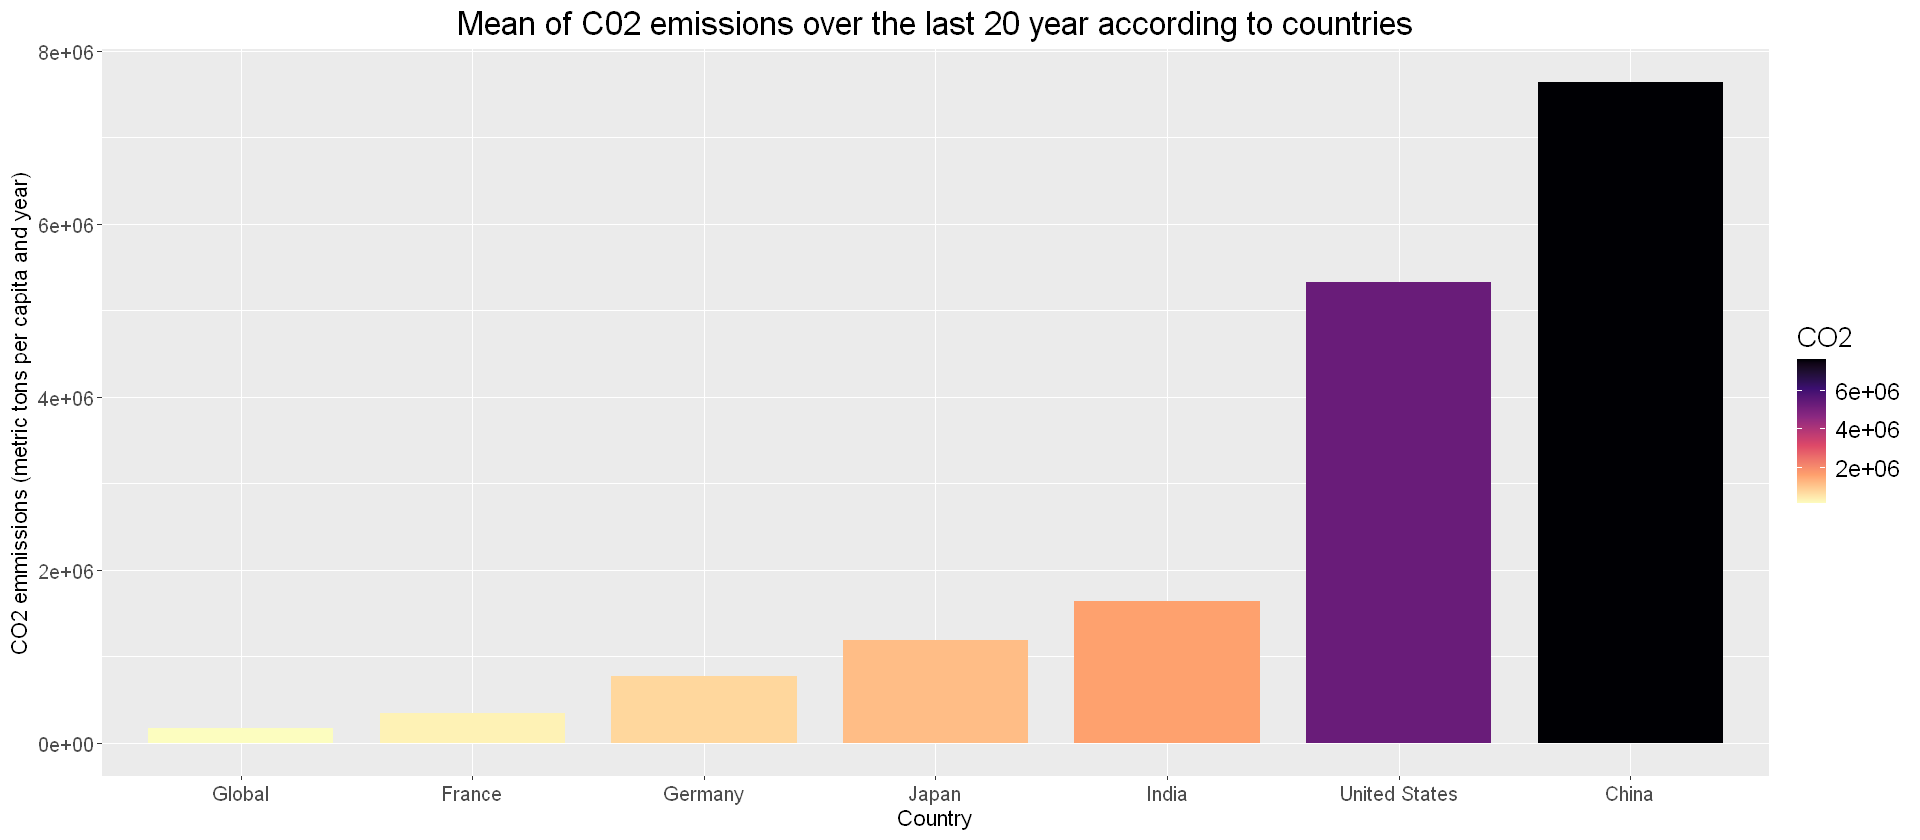

In [6]:
options(repr.plot.width = 16)
df <- energy$Value_co2_emissions_kt_by_country
df <-  matrix(df, nrow = 2868)
df <- as.data.frame(df)
colnames(df) = list("CO2")
df$Country <- energy$Entity
df_mean <- summarise(group_by(df, Country), mean_value = mean(CO2))
CO2 <- df_mean$mean_value
Country <- df_mean$Country
df <- data.frame(Country = Country, CO2 = CO2)
fr <- df[48,] ## France
df <- arrange(df, desc(CO2))
top_5 <- head(df, 5)
last_5 <- tail(df,5)
moyenne <- mean(df$CO2)
mean <- data.frame("Country" = "Global", "CO2" = moyenne)
df <- rbind(top_5, fr)
df <- rbind(df,mean)
#df <- rbind(df,last_5)
ggplot(df, aes(x=reorder(Country, CO2), y=CO2, fill=CO2)) +
  geom_bar(stat = "identity", position = "stack", width = 0.8) +
  labs(title = "Mean of C02 emissions over the last 20 year according to countries", x = "Country", y = "CO2 emmissions (metric tons per capita and year)") +
  theme(plot.title = element_text(size = 20, hjust = 0.5), 
        axis.text.y = element_text(size = 12),
        axis.title.y = element_text(size = 13),
        axis.text.x = element_text(size = 12),
       axis.title.x = element_text(size = 13),
       legend.text = element_text(size = 14),  # Ajuster la taille du texte de la légende
       legend.title = element_text(size = 16),  # Ajuster la taille du titre de la légende
       legend.position = "right") + 
       scale_fill_viridis_c(option = "A", direction = -1)

Le chargement a nécessité le package : viridisLite


Attachement du package : 'viridis'


L'objet suivant est masqué depuis 'package:maps':

    unemp




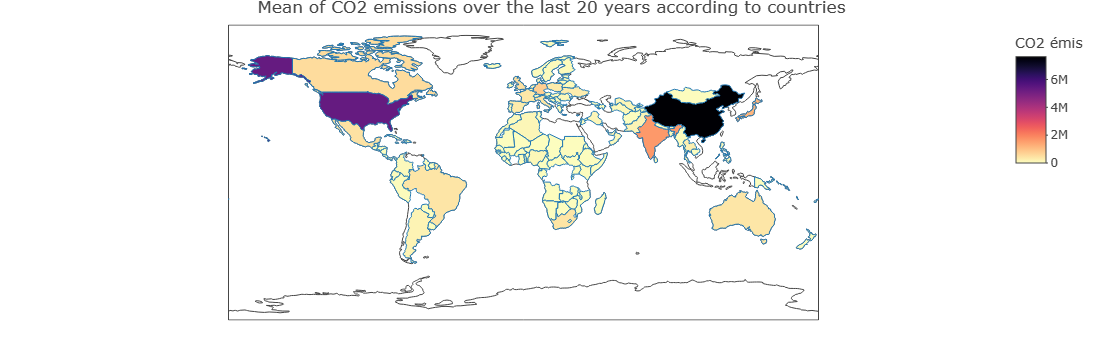

In [7]:
##### attention, par personne ou pas ? /density * area
library(viridis)
options(repr.plot.width = 16)
dfa <- energy$Value_co2_emissions_kt_by_country
dfa <-  matrix(dfa, nrow = 2868)
dfa <- as.data.frame(dfa)
colnames(dfa) = list("CO2")
dfa$Country <- energy$Entity
df_mean <- summarise(group_by(dfa, Country), mean_value = mean(CO2))
CO2 <- df_mean$mean_value
Country <- df_mean$Country
dfa <- data.frame(Country = Country, CO2 = CO2)
plot_ly(data = dfa, type = "choropleth", locations = ~Country, locationmode = "country names", z = ~CO2, text = ~paste("Pays: ", Country, "<br>CO2 emissions (metric tons per year): ", CO2),colors = viridis(100, direction = -1, option ="A")) %>%
  colorbar(title = "CO2 émis",colors = viridis(100, direction = -1, option ="A")) %>%
  layout(title = "Mean of CO2 emissions over the last 20 years according to countries")

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidt

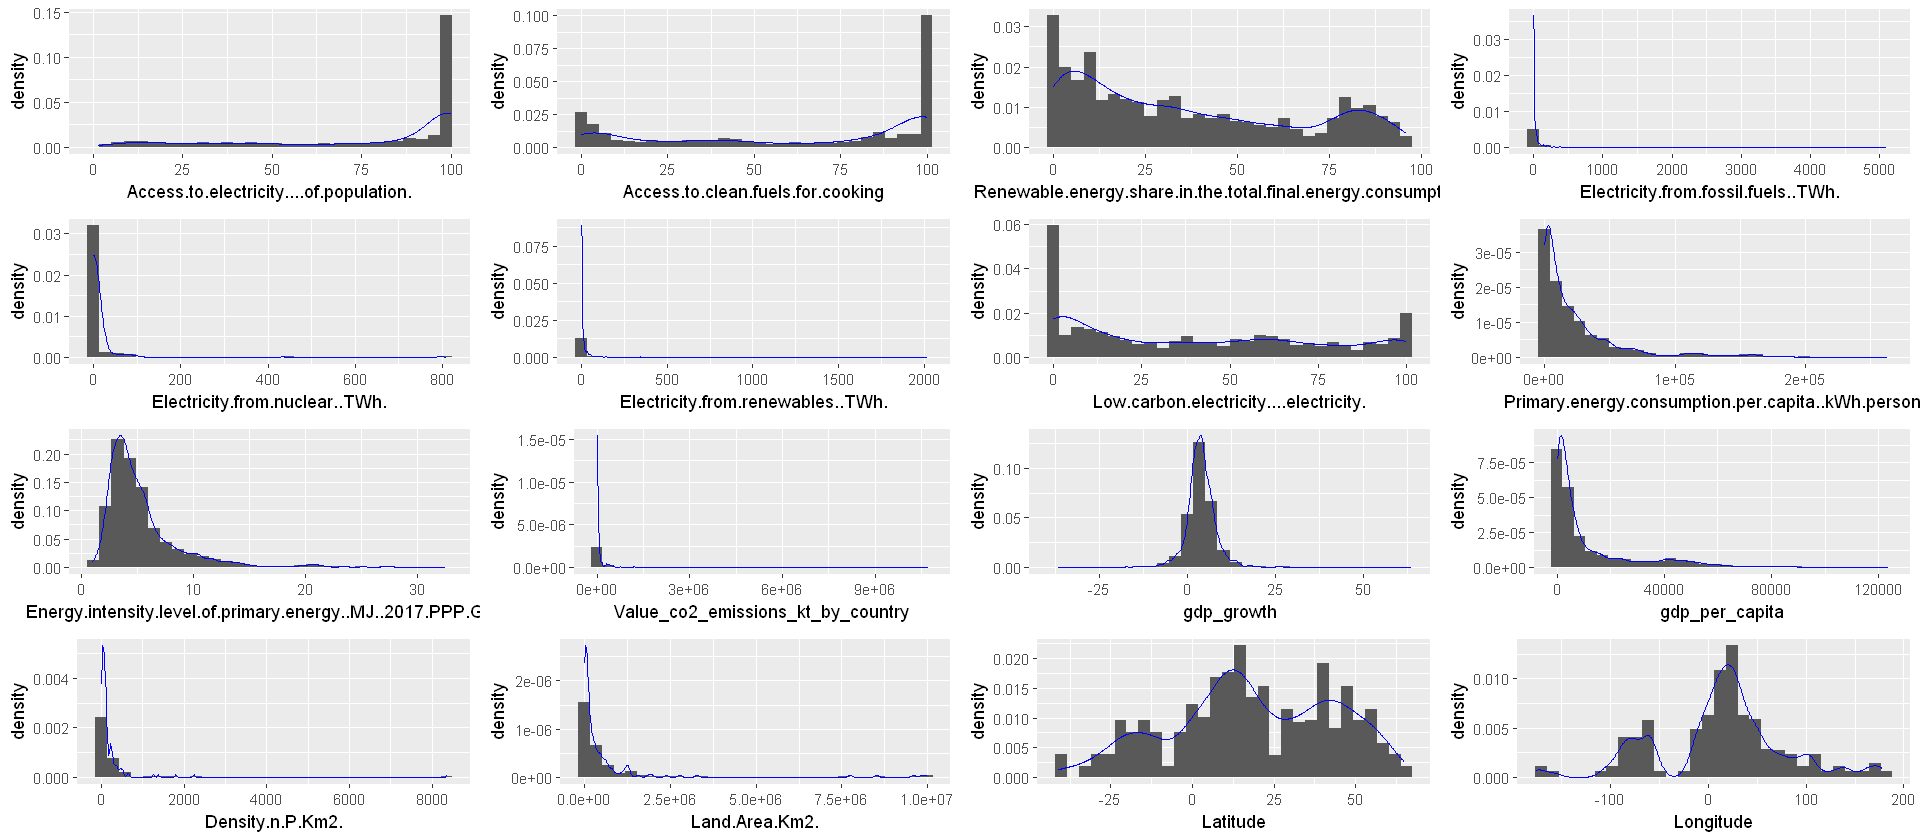

In [8]:
## que des variables quantitatives mis à part Entity et Year
g1<-ggplot(energy,aes(x=Access.to.electricity....of.population.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(energy,aes(x=Access.to.clean.fuels.for.cooking))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(energy,aes(x=Renewable.energy.share.in.the.total.final.energy.consumption....))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(energy,aes(x=Electricity.from.fossil.fuels..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(energy,aes(x=Electricity.from.nuclear..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(energy,aes(x=Electricity.from.renewables..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(energy,aes(x=Low.carbon.electricity....electricity.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(energy,aes(x=Primary.energy.consumption.per.capita..kWh.person.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(energy,aes(x=Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(energy,aes(x=Value_co2_emissions_kt_by_country))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(energy,aes(x=gdp_growth))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g12<-ggplot(energy,aes(x=gdp_per_capita))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g13<-ggplot(energy,aes(x=Density.n.P.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g14<-ggplot(energy,aes(x=Land.Area.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g15<-ggplot(energy,aes(x=Latitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g16<-ggplot(energy,aes(x=Longitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,ncol=4)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16)

In [7]:
energy[, "Access.to.electricity....of.population."] <- sqrt(energy[, "Access.to.electricity....of.population."])
energy[, "Access.to.clean.fuels.for.cooking"] <- sqrt(energy[, "Access.to.clean.fuels.for.cooking"])
energy[, "Renewable.energy.share.in.the.total.final.energy.consumption...."] <- sqrt(energy[, "Renewable.energy.share.in.the.total.final.energy.consumption...."])
energy[, "Electricity.from.fossil.fuels..TWh."] <- sqrt(energy[, "Electricity.from.fossil.fuels..TWh."])
energy[, "Electricity.from.nuclear..TWh."] <- sqrt(energy[, "Electricity.from.nuclear..TWh."])
energy[, "Electricity.from.renewables..TWh."] <- sqrt(energy[, "Electricity.from.renewables..TWh."])
energy[, "Low.carbon.electricity....electricity."] <- sqrt(energy[, "Low.carbon.electricity....electricity."])
energy[, "Primary.energy.consumption.per.capita..kWh.person."] <- log(energy[, "Primary.energy.consumption.per.capita..kWh.person."])
energy[, "Value_co2_emissions_kt_by_country"] <- log(energy[, "Value_co2_emissions_kt_by_country"])
energy[, "gdp_per_capita"] <- log(energy[, "gdp_per_capita"])
energy[, "Density.n.P.Km2."] <- log(energy[, "Density.n.P.Km2."])
energy[, "Land.Area.Km2."] <- log(energy[, "Land.Area.Km2."]) ### si je fais log pour electricity et pas sqrt, j'ai des pb lors de l'acp

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

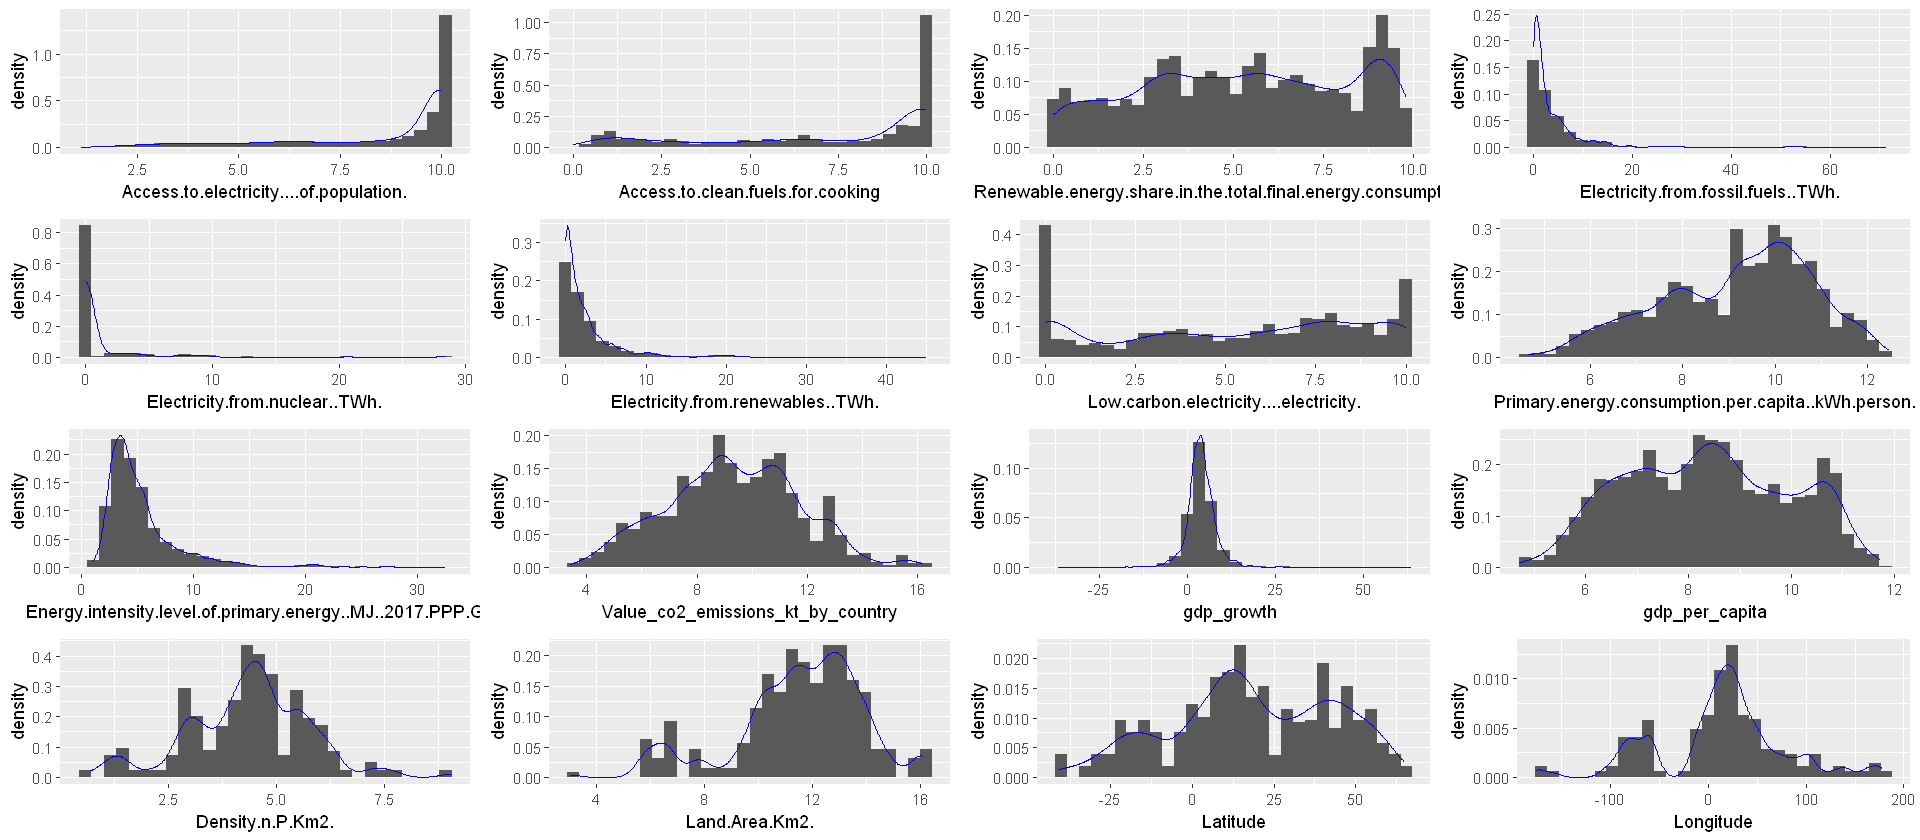

In [11]:
g1<-ggplot(energy,aes(x=Access.to.electricity....of.population.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(energy,aes(x=Access.to.clean.fuels.for.cooking))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(energy,aes(x=Renewable.energy.share.in.the.total.final.energy.consumption....))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(energy,aes(x=Electricity.from.fossil.fuels..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(energy,aes(x=Electricity.from.nuclear..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(energy,aes(x=Electricity.from.renewables..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(energy,aes(x=Low.carbon.electricity....electricity.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(energy,aes(x=Primary.energy.consumption.per.capita..kWh.person.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(energy,aes(x=Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(energy,aes(x=Value_co2_emissions_kt_by_country))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(energy,aes(x=gdp_growth))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g12<-ggplot(energy,aes(x=gdp_per_capita))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g13<-ggplot(energy,aes(x=Density.n.P.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g14<-ggplot(energy,aes(x=Land.Area.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g15<-ggplot(energy,aes(x=Latitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g16<-ggplot(energy,aes(x=Longitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,ncol=4)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16)

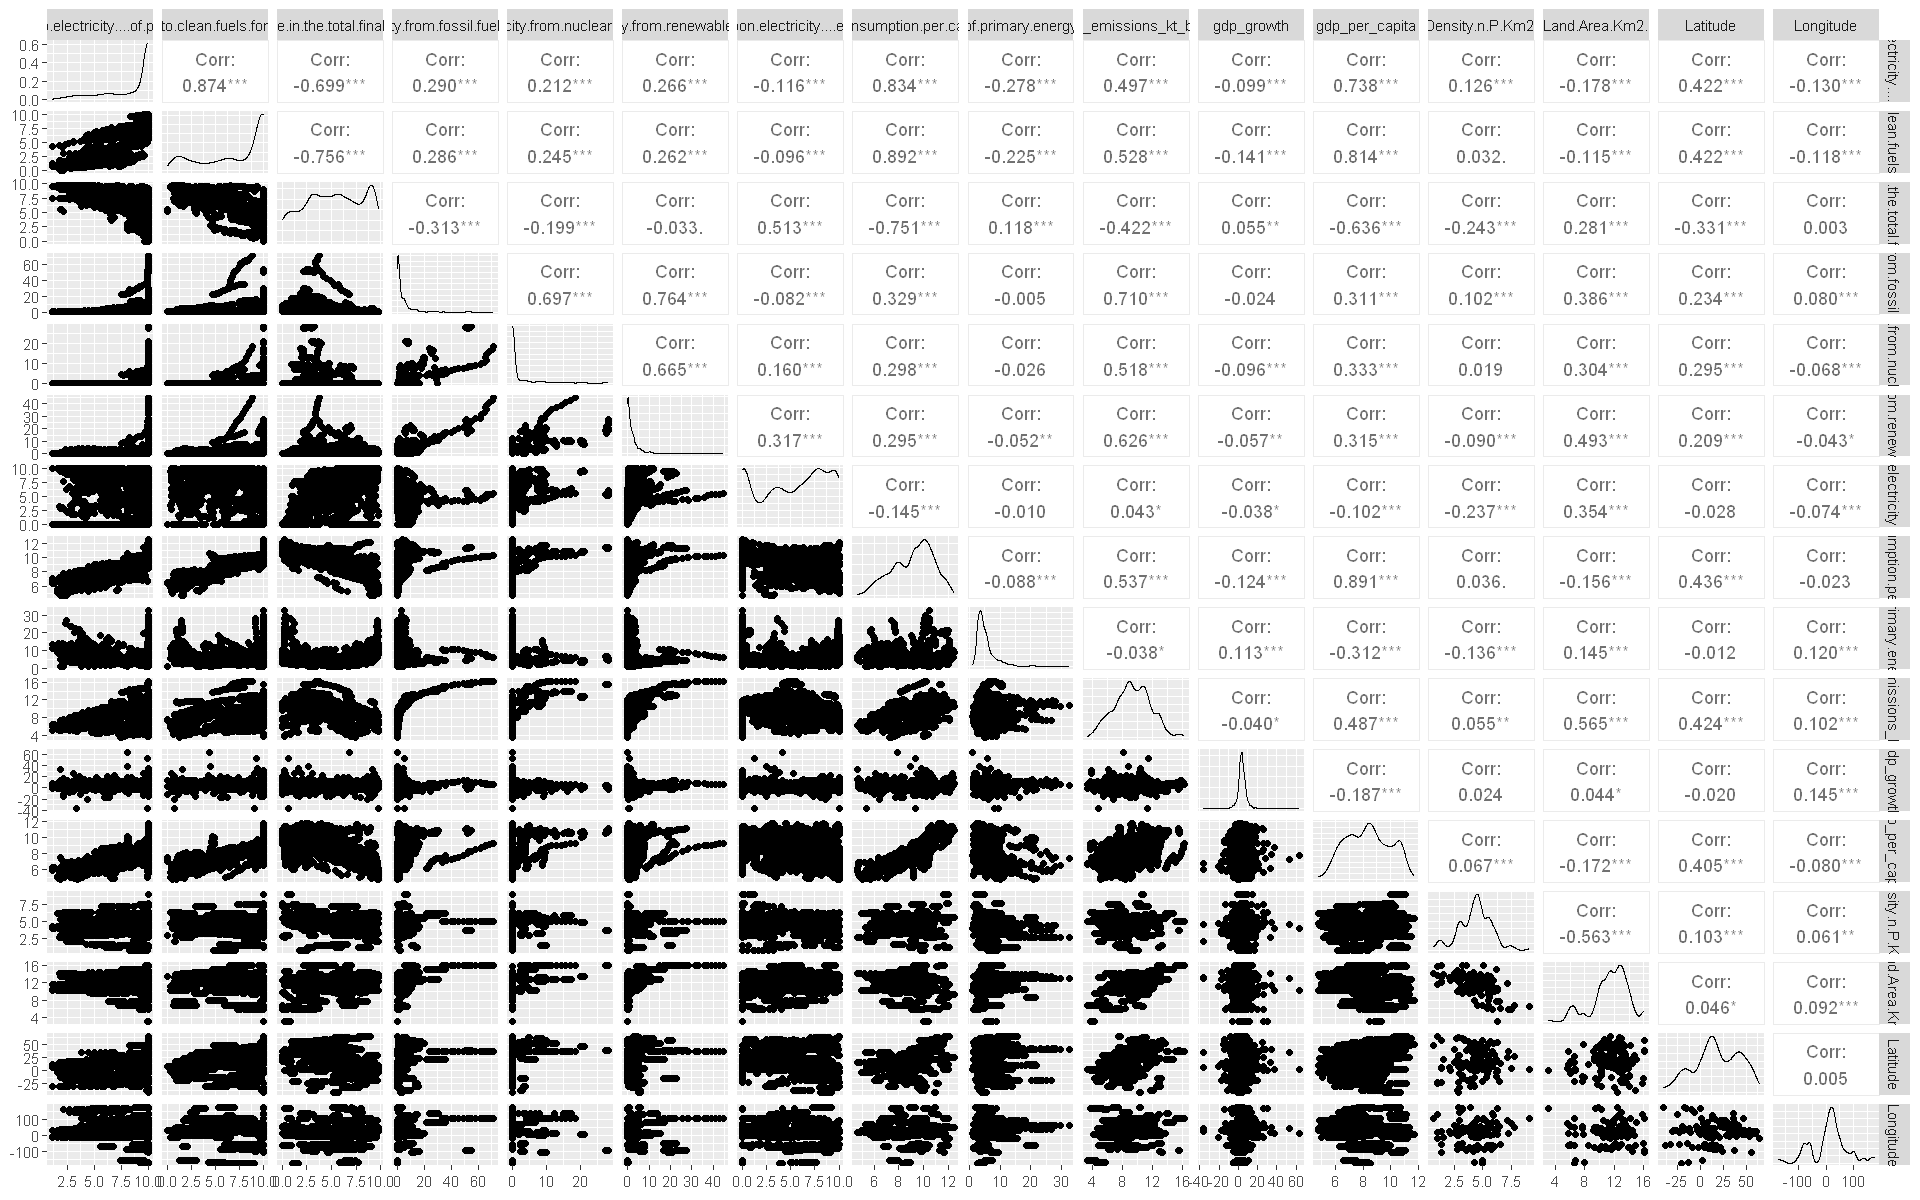

In [165]:
ggpairs(energy[, c(3:18)])

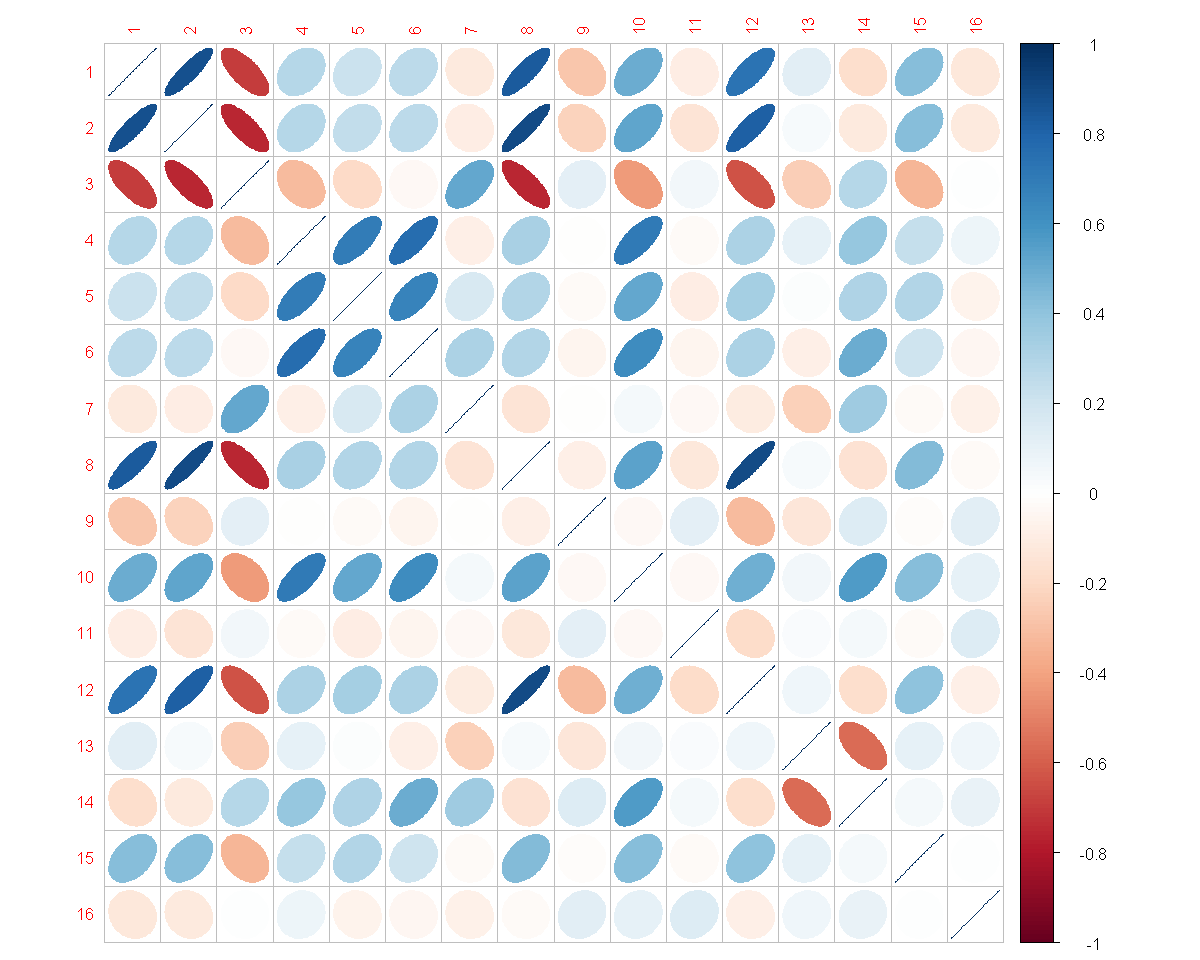

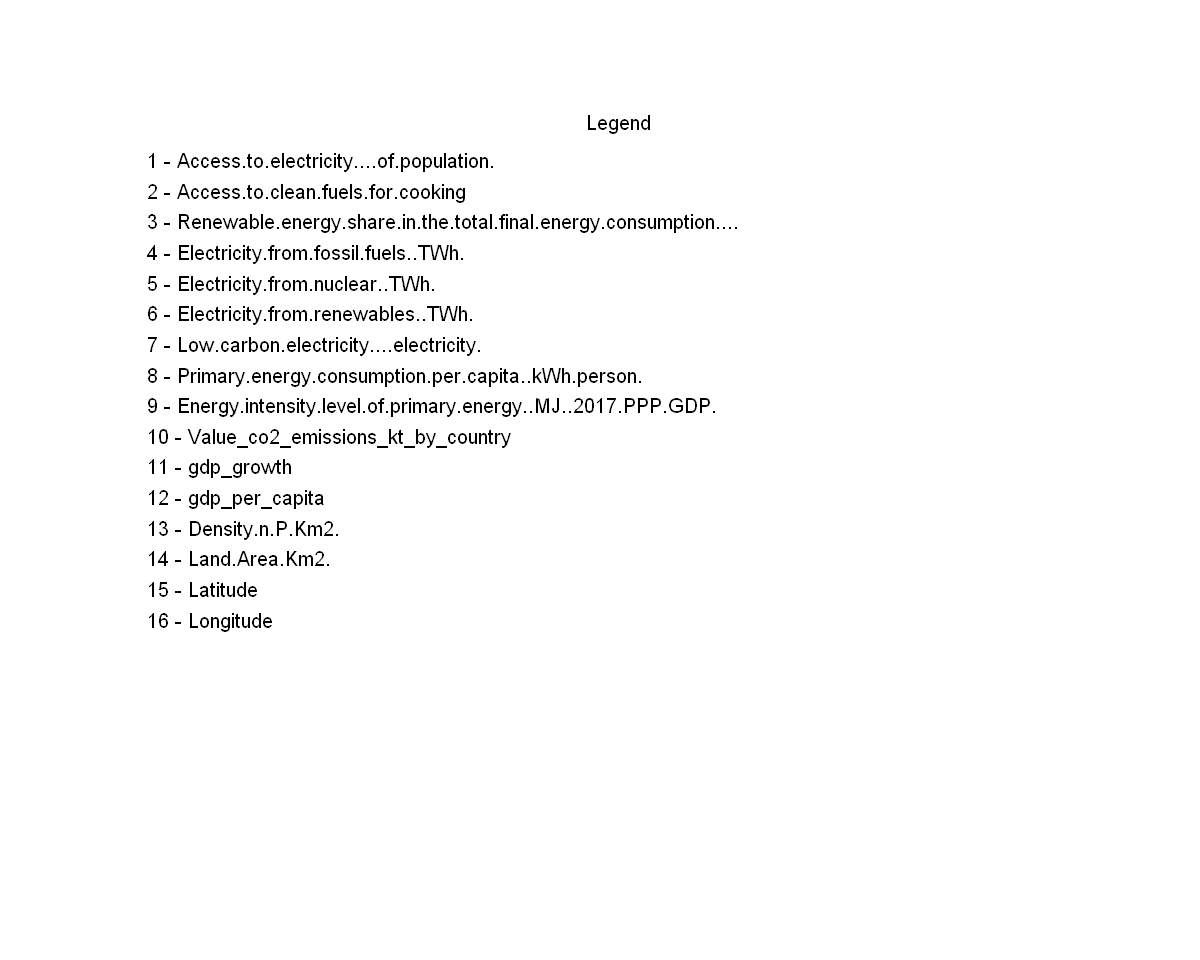

In [12]:
library(corrplot)
options(repr.plot.width = 10, repr.plot.height = 8)
energy2 <- energy
original_names <- colnames(energy2)[3:18]
# Renommer les colonnes
colnames(energy2)[3:18] <- 1:16

# Matrice de corrélation
cor_matrix <- cor(energy2[, c(3:18)])

# Afficher le corrplot avec une taille de police plus grande pour les noms de variables
corrplot(cor_matrix, method = "ellipse", tl.cex = 0.8)

# Légende pour montrer la correspondance entre les numéros et les noms originaux des variables
plot.new()
legend_names <- c(paste(1:16, " - ",original_names, sep = ""))
legend("topright", legend = legend_names, title = "Legend", cex = 1, bty = "n", col = "black")

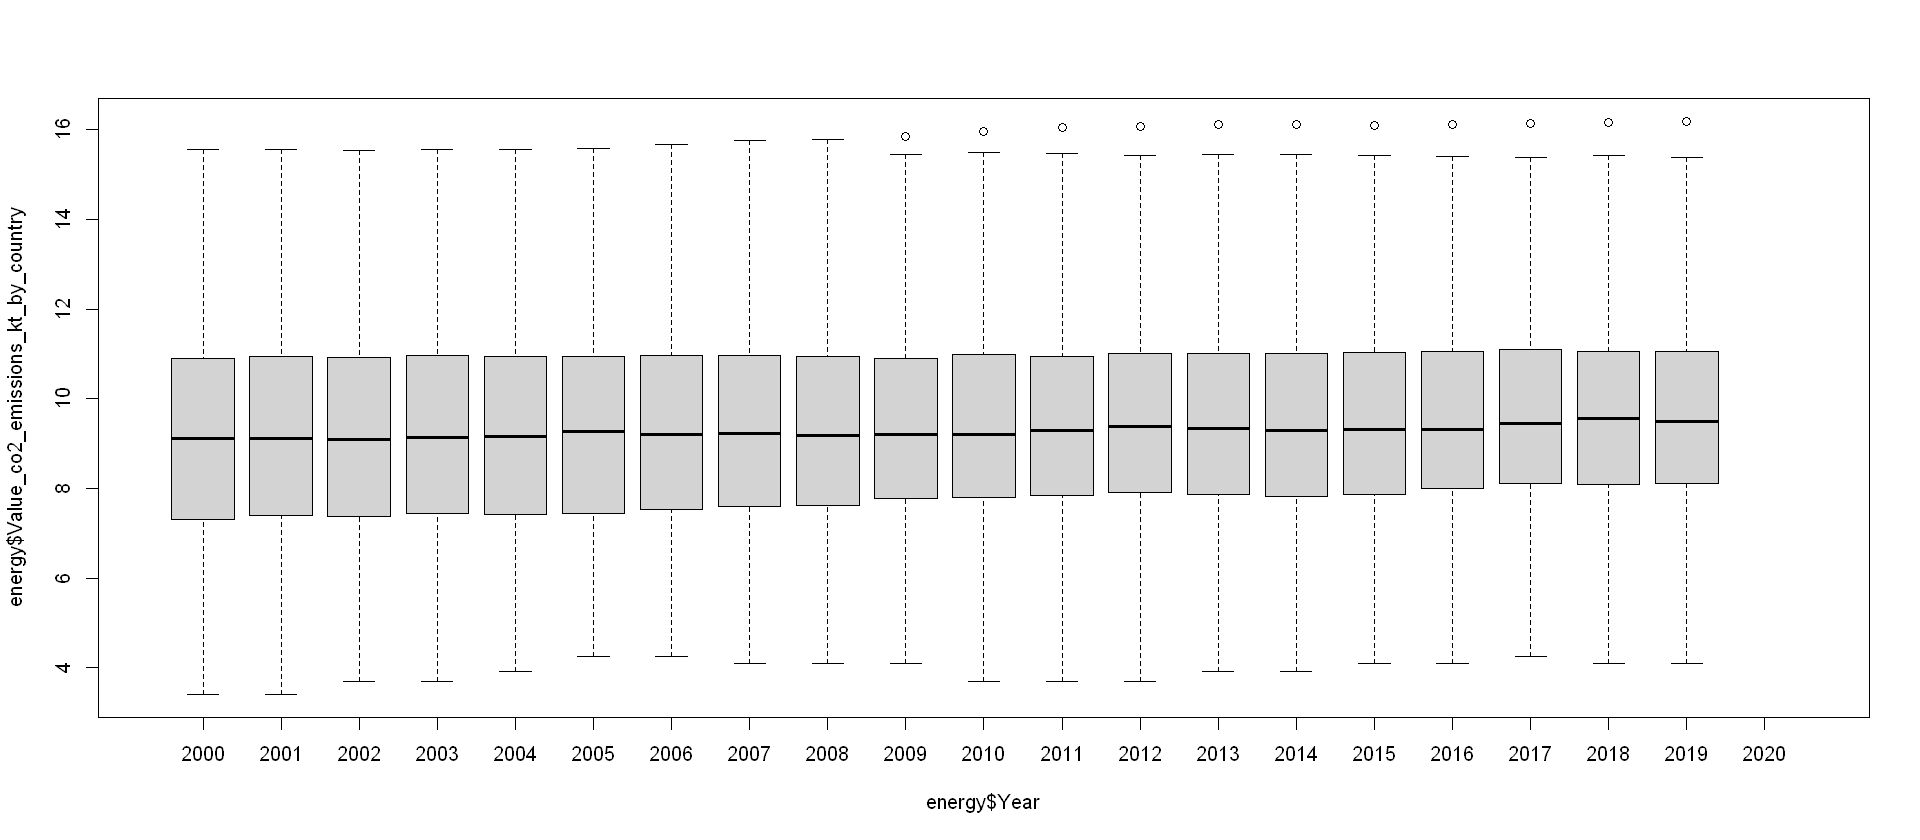

In [26]:
boxplot(energy$Value_co2_emissions_kt_by_country ~ energy$Year, data=energy)

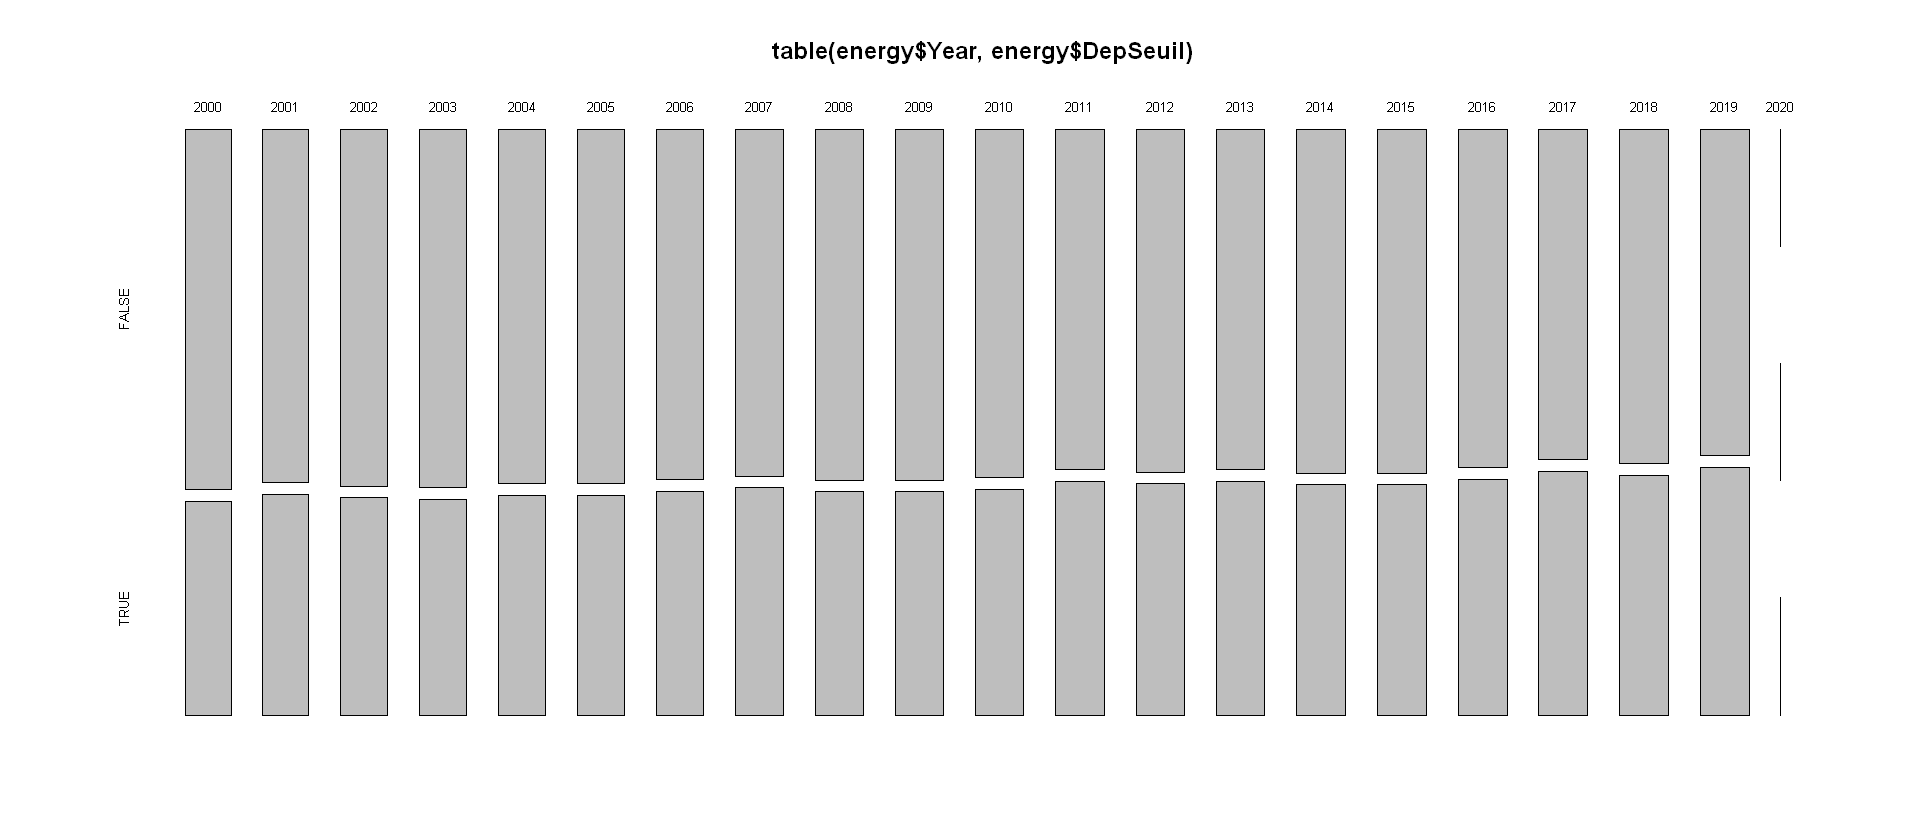

In [8]:
### O3obs en fonction des variables qualitatives
energy$DepSeuil <- as.factor(energy[, "Value_co2_emissions_kt_by_country"] > 10)
mosaicplot(table(energy$Year,energy$DepSeuil))

In [9]:
library(forcats)
energy$Entity <- as.factor(energy$Entity)
#energy$Entity <- fct_collapse(energy$Entity, "PIB ++" = c("Australia","Canada","China","Denmark","Finland","France","Germany","Iceland","Ireland","India","Italy","Japan",
                                                      #    "Luxembourg","Netherlands","Norway","Qatar","Singapore","Spain","Sweden","Switzerland","United Arab Emirates",
                                                       #   "United Kingdom","United States","Cyprus"), "PIB +" = c("Algeria","Argentina","Austria","Belgium","Brazil","Cameroon","Colombia",
                           #   "Croatia","Ecuador","Estonia","Greece","Hungary","Israel","Malta","Mexico","Morocco","New Zealand","Nigeria","Oman","Peru","Philippines","Poland","Portugal",
                            #  "Romania","Serbia","Seychelles","Thailand","Slovenia","South Africa","Tunisia","Ukraine","Uruguay"), "PIB -" = c("Armenia","Angola","Antigua and Barbuda","Azerbaijan","Bahrain",
                                                                                                                                           #    "Barbados","Belarus","Belize","Benin","Bhutan","Bosnia and Herzegovina",
                                                                                                                                           #   "Botswana","Cambodia",
                                                                                                                                           #   "Costa Rica","Cuba","Dominica","Dominican Republic","El Salvador","Equatorial Guinea",
                                                                                                                                            #  "Eswatini","Fiji","Gabon","Georgia","Ghana","Grenada","Guatemala","Guinea",
                                                                                                                                            #  "Guinea-Bissau","Guyana","Honduras","Iraq","Jamaica","Jordan","Kenya","Kuwait","Latvia","Lithuania","Maldives","Mauritius","Mongolia","Montenegro",
                                                                                                                                            #  "Namibia","Nauru","Nicaragua","North Macedonia","Pakistan","Panama","Papua New Guinea","Paraguay","Samoa",
                                                                                                                                            #  "Sri Lanka","Suriname","Tajikistan","Tonga","Trinidad and Tobago","Turkmenistan","Uzbekistan","Zimbabwe"),
                            # "PIB --" = c("Afghanistan","Bangladesh","Burkina Faso","Burundi","Central African Republic","Comoros","Chad","Djibouti","Eritrea","Ethiopia","Haiti","Kiribati","Lesotho","Liberia","Madagascar","Malawi","Mali","Mauritania","Mozambique","Myanmar","Nepal","Niger","Rwanda","Sao Tome and Principe",
                                         # "Senegal","Sierra Leone","Solomon Islands","Somalia","South Sudan","Sudan","Togo","Uganda","Vanuatu","Zambia"))
df <- energy$Value_co2_emissions_kt_by_country
df <-  matrix(df, nrow = 2868)
df <- as.data.frame(df)
colnames(df) = list("CO2")
df$Entity <- energy$Entity
df_mean <- summarise(group_by(df, Entity), mean_value = mean(CO2))
CO2 <- df_mean$mean_value
Entity <- df_mean$Entity
df <- data.frame(Entity = Entity, CO2 = CO2)
fr <- df[48,] ## France
df <- arrange(df, desc(CO2))
intervals <- c(0, 8, 10, 12, 14, 16)
labels <- c("--", "-", "=", "+", "++")
df$u <- cut(df$CO2, breaks = intervals, labels = labels, include.lowest = TRUE)
# Créer un dataframe avec les correspondances entre les pays et les modalités
modalites <- data.frame(Entity = df$Entity, Country = df$u)
# Joindre les deux dataframes en fonction du nom du pays
energy <- merge(energy, modalites, by = "Entity", all.x = TRUE)
# Afficher les premières lignes du dataframe pour vérifier
energy <- subset(energy, select = -Entity)
head(energy)
energy$Year <- fct_collapse(energy$Year, "2000-2004" = c("2000","2001","2002","2003","2004"), "2005-2009" = c("2005","2006","2007","2008","2009"),
                            "2010-2014" = c("2010","2011","2012","2013","2014"), "2015-2020" = c("2015","2016","2017","2018","2019","2020"))                                              

Year Access.to.electricity....of.population.
1 2003 3.839076                               
2 2004 4.479394                               
3 2005 5.038938                               
4 2006 5.542444                               
5 2007 6.004249                               
6 2008 6.511528                               
  Access.to.clean.fuels.for.cooking
1 3.082207                         
2 3.301515                         
3 3.492850                         
4 3.721559                         
5 3.911521                         
6 4.086563                         
  Renewable.energy.share.in.the.total.final.energy.consumption....
1 6.054750                                                        
2 6.651316                                                        
3 5.820653                                                        
4 5.647123                                                        
5 5.364699                                                        
6 4.601087                                                        
  Electricity.from.fossil.fuels..TWh. Electricity.from.nuclear..TWh.
1 0.5567764                           0                             
2 0.5744563                           0                             
3 0.5830952                           0                             
4 0.4472136                           0                             
5 0.4472136                           0                             
6 0.4358899                           0                             
  Electricity.from.renewables..TWh. Low.carbon.electricity....electricity.
1 0.7937254                         8.186653                              
2 0.7483315                         7.932298                              
3 0.7681146                         7.964977                              
4 0.8000000                         8.728716                              
5 0.8660254                         8.885233                              
6 0.7348469                         8.600733                              
  Primary.energy.consumption.per.capita..kWh.person.
1 5.437941                                          
2 5.319253                                          
3 5.529703                                          
4 5.718411                                          
5 5.870087                                          
6 6.409901                                          
  Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.
1 1.40                                                       
2 1.20                                                       
3 1.41                                                       
4 1.50                                                       
5 1.53                                                       
6 1.94                                                       
  Value_co2_emissions_kt_by_country gdp_growth gdp_per_capita Density.n.P.Km2.
1 7.106606                           8.832278  5.250617       4.094345        
2 6.937314                           1.414118  5.353667       4.094345        
3 7.346010                          11.229715  5.489067       4.094345        
4 7.473069                           5.357403  5.574940       4.094345        
5 7.478735                          13.826320  5.885251       4.094345        
6 8.177516                           3.924984  5.898975       4.094345        
  Land.Area.Km2. Latitude Longitude DepSeuil Country
1 13.38815       33.93911 67.70995  FALSE    -      
2 13.38815       33.93911 67.70995  FALSE    -      
3 13.38815       33.93911 67.70995  FALSE    -      
4 13.38815       33.93911 67.70995  FALSE    -      
5 13.38815       33.93911 67.70995  FALSE    -      
6 13.38815       33.93911 67.70995  FALSE    -

In [10]:
str(energy)

'data.frame':	2868 obs. of  19 variables:
 $ Year                                                            : Factor w/ 4 levels "2000-2004","2005-2009",..: 1 1 2 2 2 2 2 3 3 3 ...
 $ Access.to.electricity....of.population.                         : num  3.84 4.48 5.04 5.54 6 ...
 $ Access.to.clean.fuels.for.cooking                               : num  3.08 3.3 3.49 3.72 3.91 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  6.05 6.65 5.82 5.65 5.36 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.557 0.574 0.583 0.447 0.447 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.794 0.748 0.768 0.8 0.866 ...
 $ Low.carbon.electricity....electricity.                          : num  8.19 7.93 7.96 8.73 8.89 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  5.44 5.32 5.53 5.72 5.87

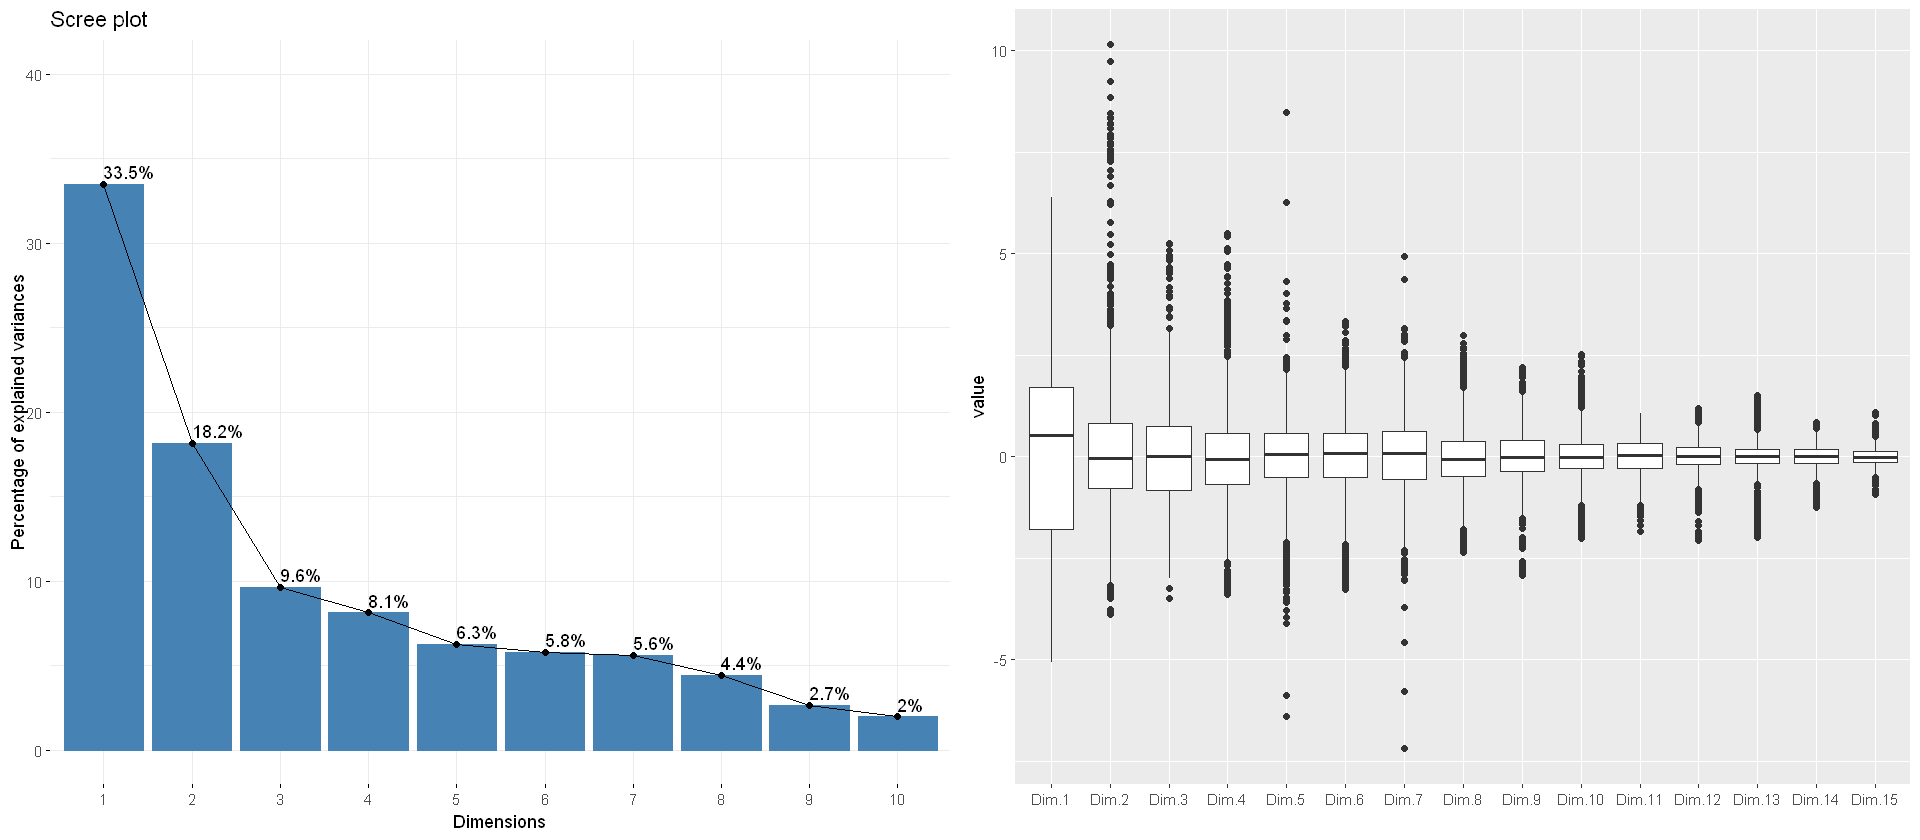

In [74]:
library(FactoMineR)
acp <- PCA(energy, scale.unit = TRUE,
           graph = FALSE, quali.sup = c(1,18,19), quanti.sup = 11, ncp = 15)
# Décroissance des valeurs propres
library(factoextra)
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

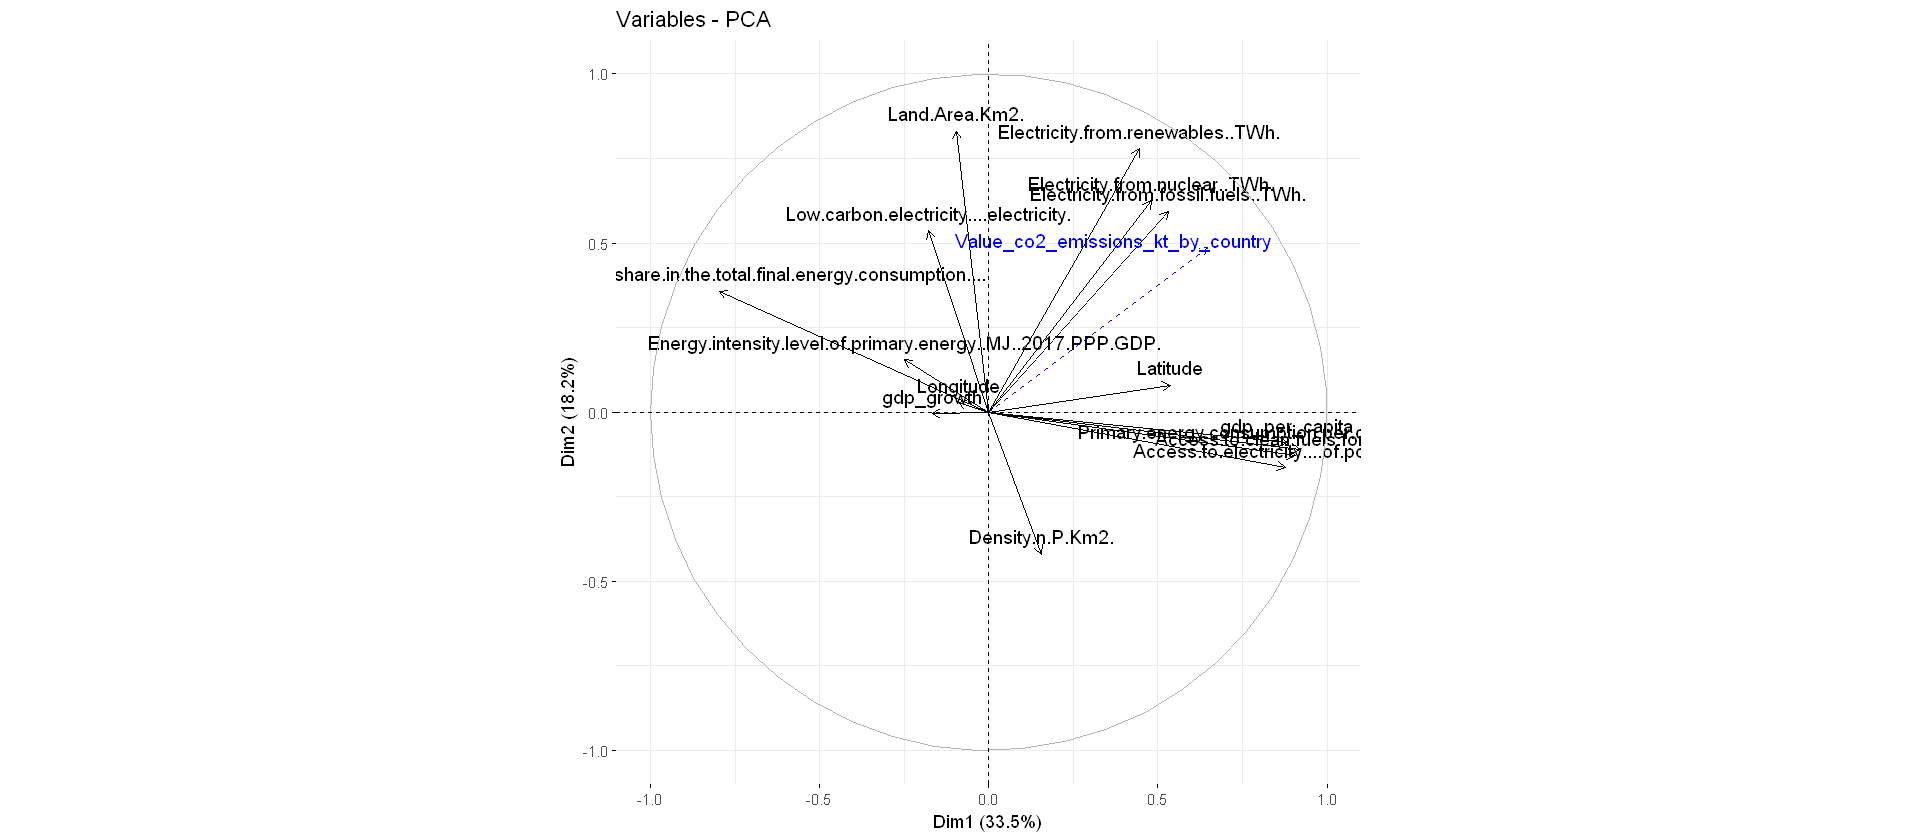

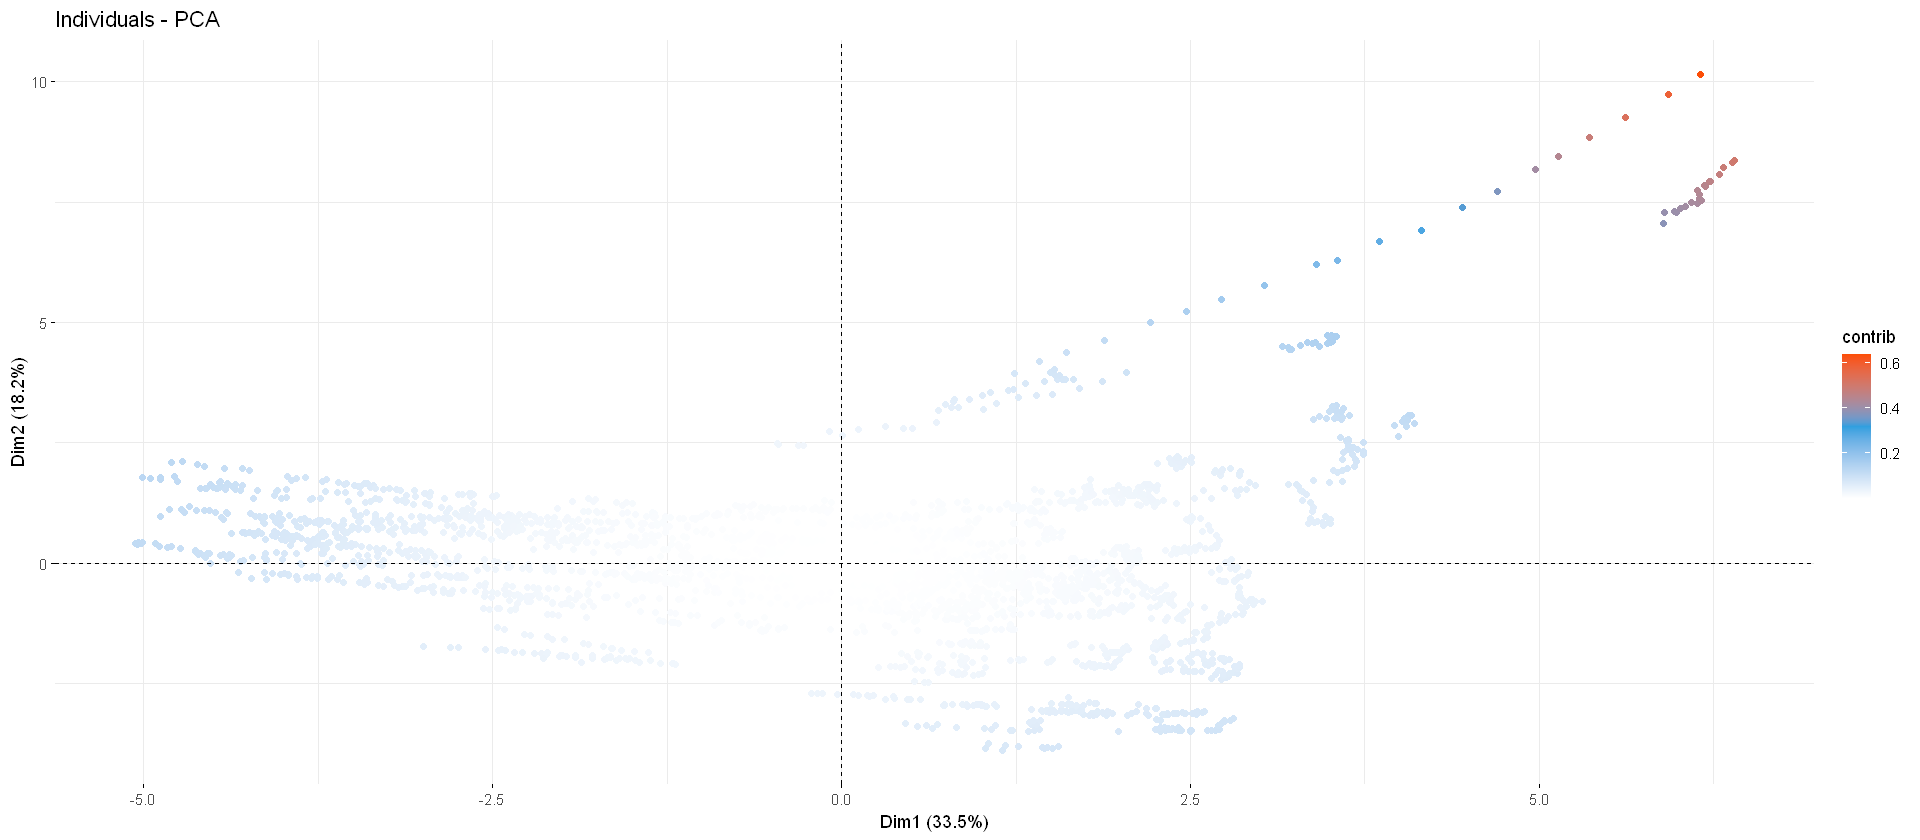

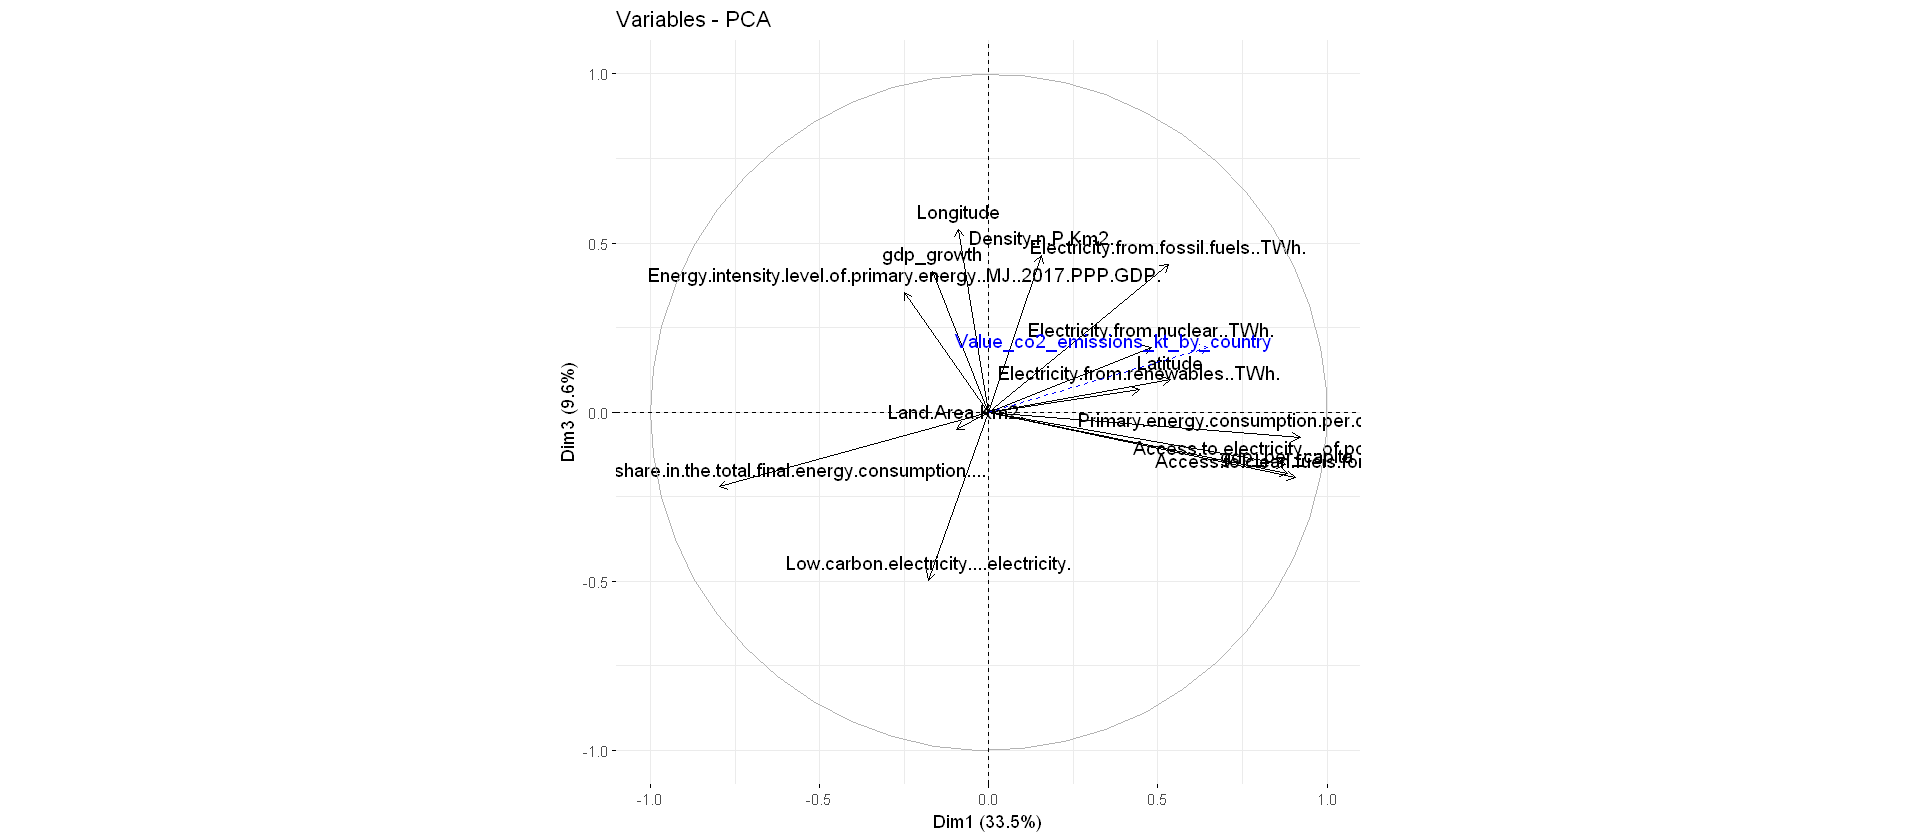

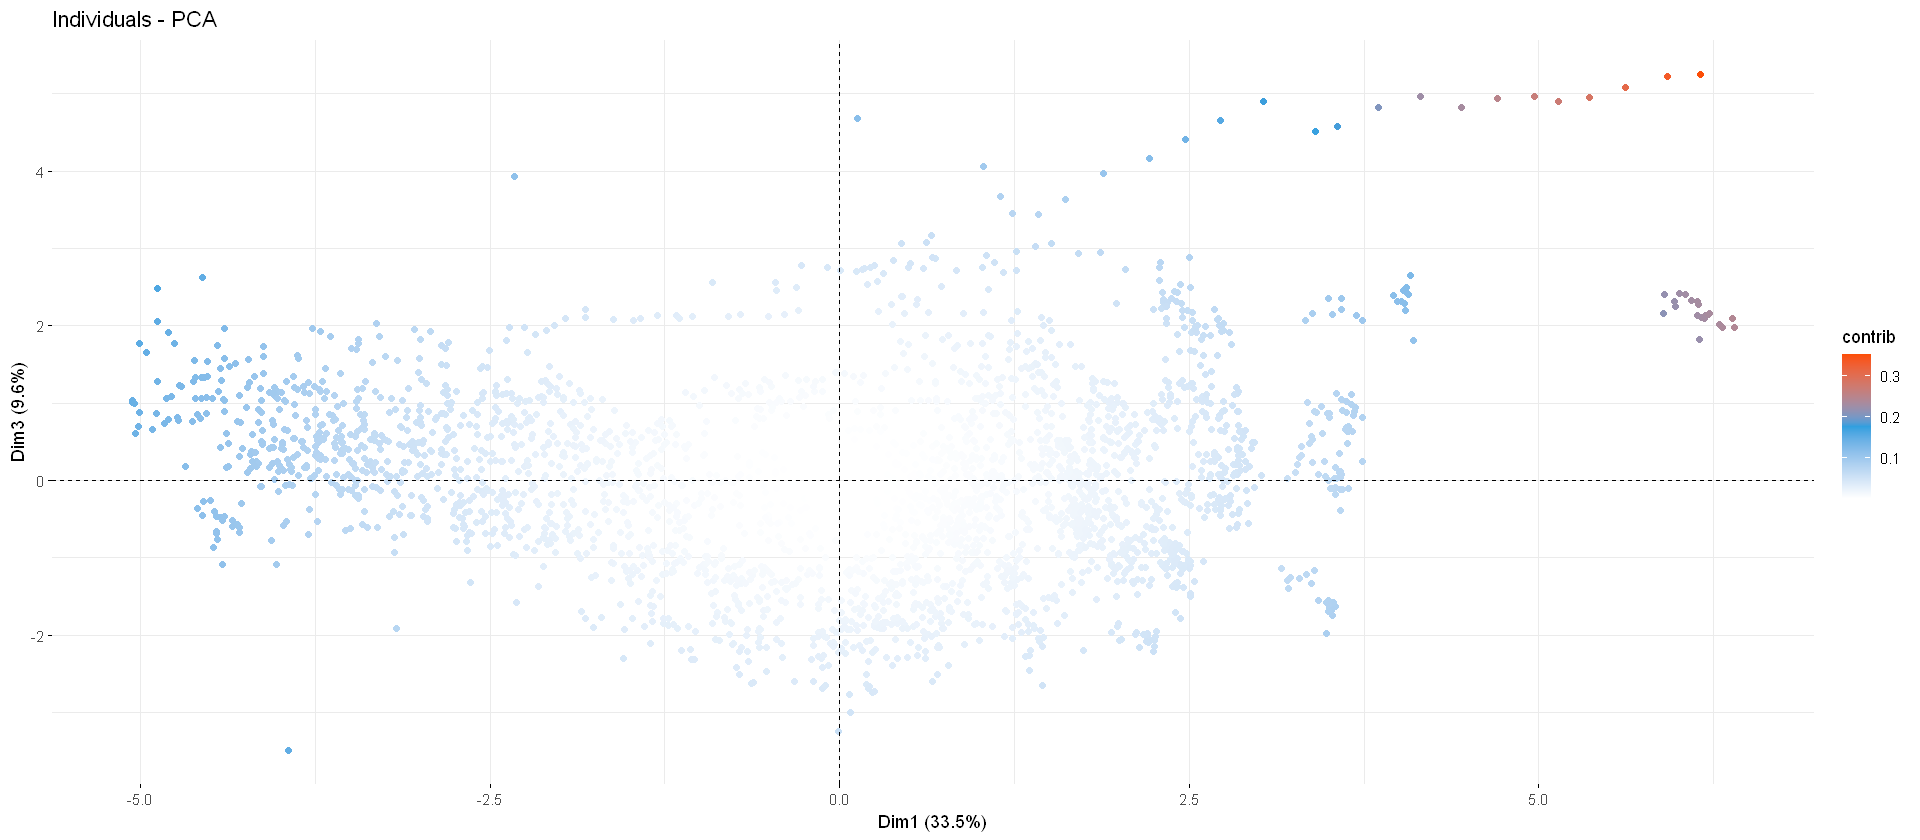

In [75]:
fviz_pca_var(acp)
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp,axes=c(1,3))
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

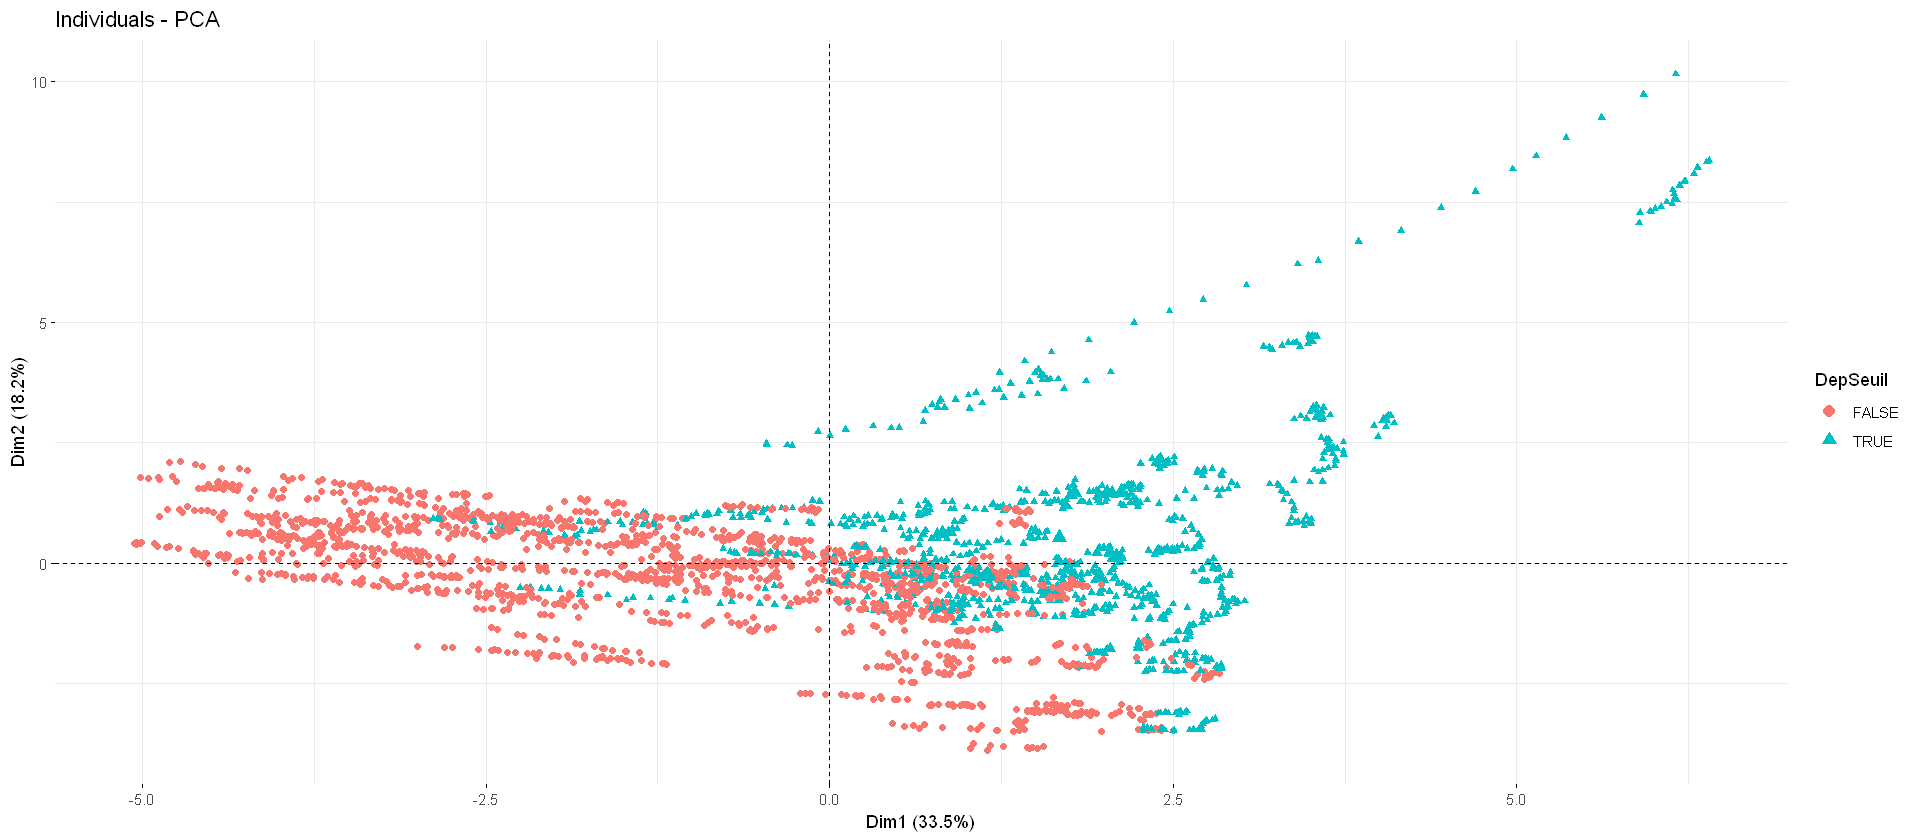

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '624' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '625' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '626' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '627' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '628' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '629' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '630' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '631' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '694' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '695' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '696' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '697' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '698' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '699' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '700' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '701' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '764' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '765' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '766' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '767' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '768' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '769' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '770' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '771' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '128' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '130' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '130' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '131' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '131' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '132' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '163' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '164' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '164' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '165' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '165' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '166' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '166' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '167' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '198' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '199' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '199' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '200' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '200' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '201' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '201' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '202' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '233' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '234' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '234' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '235' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '235' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '236' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '236' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '237' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '268' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '269' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '269' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '270' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '270' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '271' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '271' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '272' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '303' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '304' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '304' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '305' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '305' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '306' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '306' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '307' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '338' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '339' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '339' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '340' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '340' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '341' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '341' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '342' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '373' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '374' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '374' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '375' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '375' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '376' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '376' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '377' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '408' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '409' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '409' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '410' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '410' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '411' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '411' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '412' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '443' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '444' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '444' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '445' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '445' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '446' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '446' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '447' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '478' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '479' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '479' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '480' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '480' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '481' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '481' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '482' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '513' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '514' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '514' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '515' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '515' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '516' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '516' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '517' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '548' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '549' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '549' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '550' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '550' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '551' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '551' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '552' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '583' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '584' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '584' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '585' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '585' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '586' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '586' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '587' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '618' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '619' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '619' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '620' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '620' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '621' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '621' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '622' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '653' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '654' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '654' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '655' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '655' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '656' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '656' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '657' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '688' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '689' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '689' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '690' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '690' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '691' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '691' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '692' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '723' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '724' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '724' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '725' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '725' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '726' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '726' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '727' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '758' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '759' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '759' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '760' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '760' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '761' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '761' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '762' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '793' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '794' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '794' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '795' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '795' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '796' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '796' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '797' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

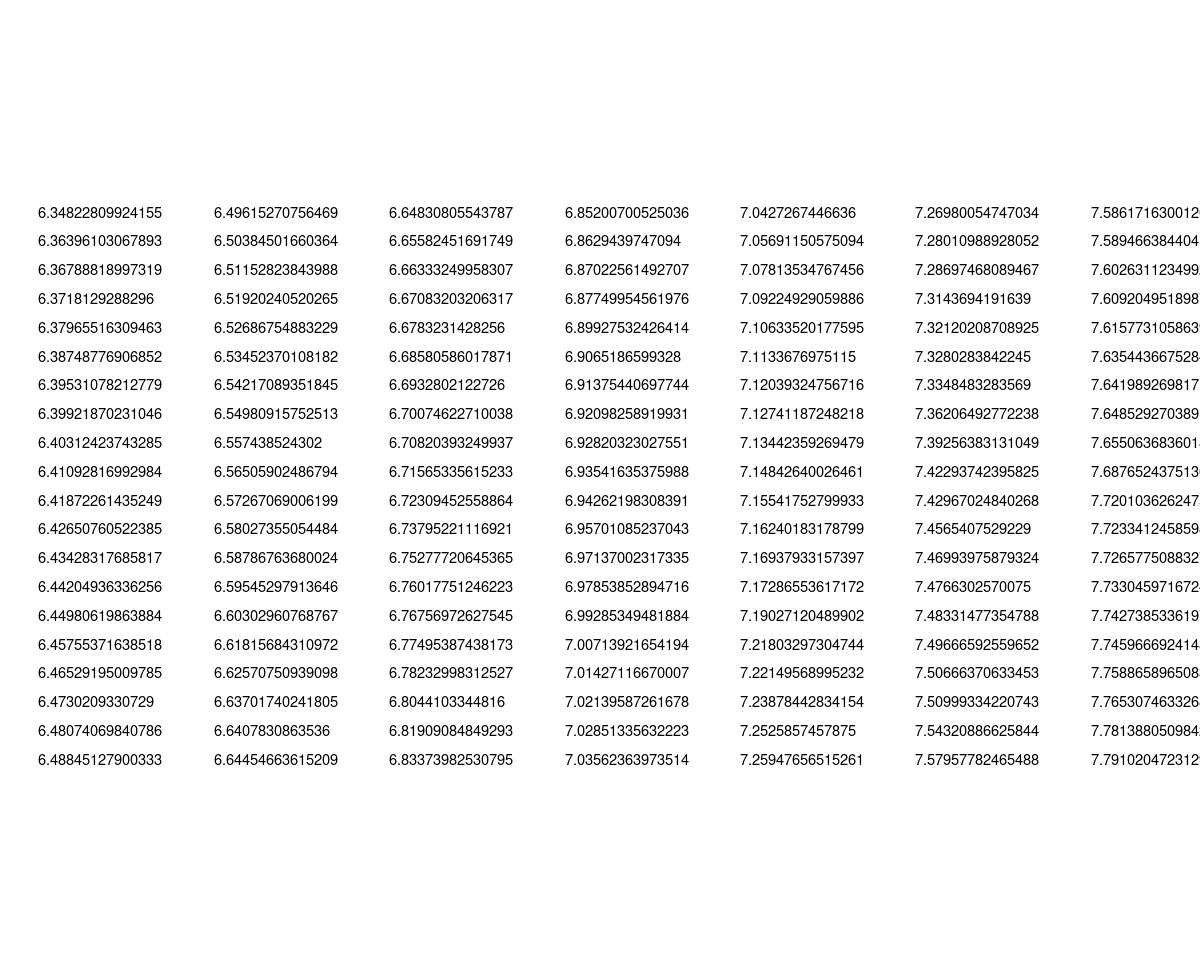

In [81]:
fviz_pca_ind(acp, label="none", habillage=18)

In [11]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(energy) # nombre de lignes dans les données
nvar <- ncol(energy) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 
### pour CO2 emissions
datappr <- energy[appri, -c(5,18)] 
# construction de l'échantillon test
datestr <- energy[testi, -c(5,18)] 
# vérification
str(datappr)
str(datestr)
#summary(datappr) 

### pour DepSeuil
datappq <- energy[appri,-c(5,11)]
# construction de l'échantillon test 
datestq <- energy[testi,-c(5,11)] 

# vérification
str(datappq)
str(datestq)
#summary(datappq)

'data.frame':	2294 obs. of  17 variables:
 $ Year                                                            : Factor w/ 4 levels "2000-2004","2005-2009",..: 1 1 2 2 2 2 3 3 3 3 ...
 $ Access.to.electricity....of.population.                         : num  3.84 4.48 5.04 6 6.51 ...
 $ Access.to.clean.fuels.for.cooking                               : num  3.08 3.3 3.49 3.91 4.09 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  6.05 6.65 5.82 5.36 4.6 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.794 0.748 0.768 0.866 0.735 ...
 $ Low.carbon.electricity....electricity.                          : num  8.19 7.93 7.96 8.89 8.6 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  5.44 5.32 5.53 5.87 6.41 ...
 $ Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     : num  1.4 1.2 1.41 1.53 1.94 2.25 2

In [12]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(0, 20)+ylim(-1.1, 1.1)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

In [13]:
### régression linéaire sans sélection de variable
reg.lm <- lm(Value_co2_emissions_kt_by_country ~ . , data = datappr)
summary(reg.lm)
anova(reg.lm,test="F")


Call:
lm(formula = Value_co2_emissions_kt_by_country ~ ., data = datappr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04343 -0.17052  0.00977  0.19584  1.65008 

Coefficients:
                                                                   Estimate
(Intercept)                                                      -1.218e+01
Year2005-2009                                                    -4.986e-02
Year2010-2014                                                    -3.668e-02
Year2015-2020                                                     3.715e-02
Access.to.electricity....of.population.                           1.234e-01
Access.to.clean.fuels.for.cooking                                -5.655e-03
Renewable.energy.share.in.the.total.final.energy.consumption.... -6.910e-02
Electricity.from.nuclear..TWh.                                   -1.075e-02
Electricity.from.renewables..TWh.                                -2.228e-02
Low.carbon.electricity....electricity.        

Df  
Year                                                                3
Access.to.electricity....of.population.                             1
Access.to.clean.fuels.for.cooking                                   1
Renewable.energy.share.in.the.total.final.energy.consumption....    1
Electricity.from.nuclear..TWh.                                      1
Electricity.from.renewables..TWh.                                   1
Low.carbon.electricity....electricity.                              1
Primary.energy.consumption.per.capita..kWh.person.                  1
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.         1
gdp_growth                                                          1
gdp_per_capita                                                      1
Density.n.P.Km2.                                                    1
Land.Area.Km2.                                                      1
Latitude                                                            1
Longitude                                                           1
Country                                                             4
Residuals                                                        2272
                                                                 Sum Sq      
Year                                                               35.5281555
Access.to.electricity....of.population.                          3131.8099066
Access.to.clean.fuels.for.cooking                                 419.9873251
Renewable.energy.share.in.the.total.final.energy.consumption....    7.8821890
Electricity.from.nuclear..TWh.                                   2123.7364732
Electricity.from.renewables..TWh.                                1594.1123664
Low.carbon.electricity....electricity.                              1.4852519
Primary.energy.consumption.per.capita..kWh.person.                  5.9842393
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.        57.5252618
gdp_growth                                                         11.3069603
gdp_per_capita                                                      0.1526926
Density.n.P.Km2.                                                   24.3691289
Land.Area.Km2.                                                   5296.9181533
Latitude                                                            2.9185620
Longitude                                                           0.8700169
Country                                                            32.5145776
Residuals                                                         223.8935645
                                                                 Mean Sq     
Year                                                               11.8427185
Access.to.electricity....of.population.                          3131.8099066
Access.to.clean.fuels.for.cooking                                 419.9873251
Renewable.energy.share.in.the.total.final.energy.consumption....    7.8821890
Electricity.from.nuclear..TWh.                                   2123.7364732
Electricity.from.renewables..TWh.                                1594.1123664
Low.carbon.electricity....electricity.                              1.4852519
Primary.energy.consumption.per.capita..kWh.person.                  5.9842393
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.        57.5252618
gdp_growth                                                         11.3069603
gdp_per_capita                                                      0.1526926
Density.n.P.Km2.                                                   24.3691289
Land.Area.Km2.                                                   5296.9181533
Latitude                                                            2.9185620
Longitude                                                           0.8700169
Country                                                             8.1286444
Residuals                                                           0.09854

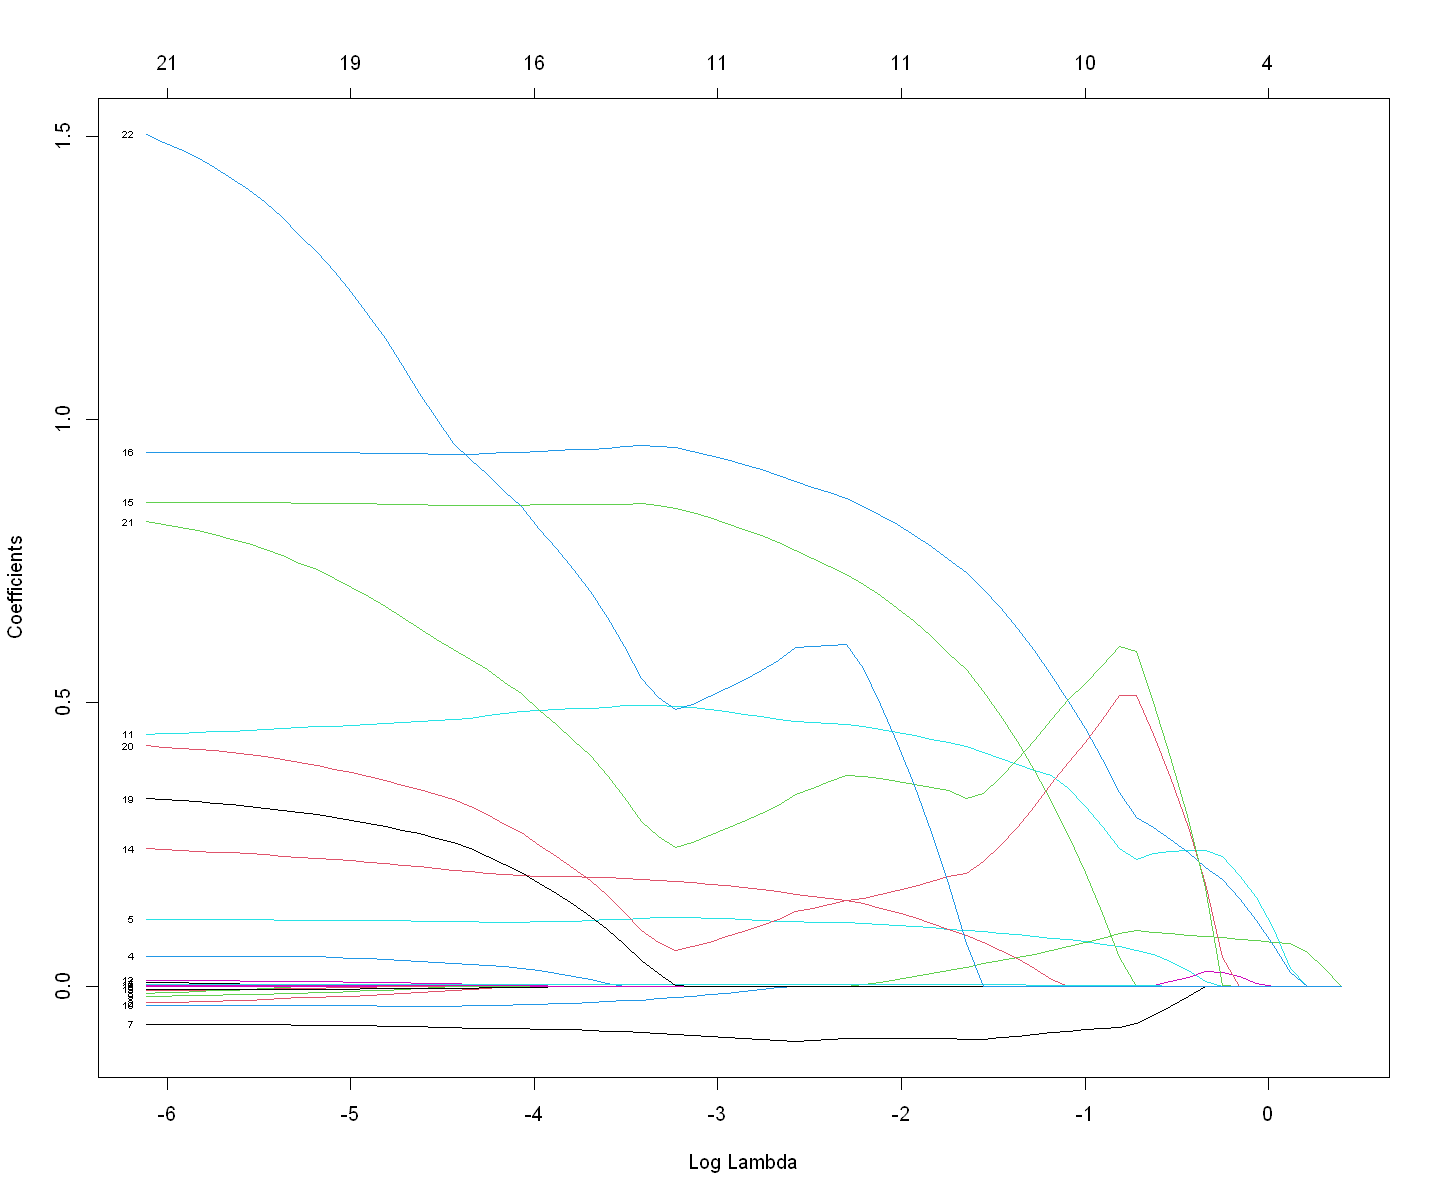

In [14]:
### Lasso
library(glmnet)
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(Value_co2_emissions_kt_by_country ~ . - 1, data = datappr)
reg.lasso <- glmnet(y = datappr$Value_co2_emissions_kt_by_country, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
#legend("bottomright", 
      # legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))

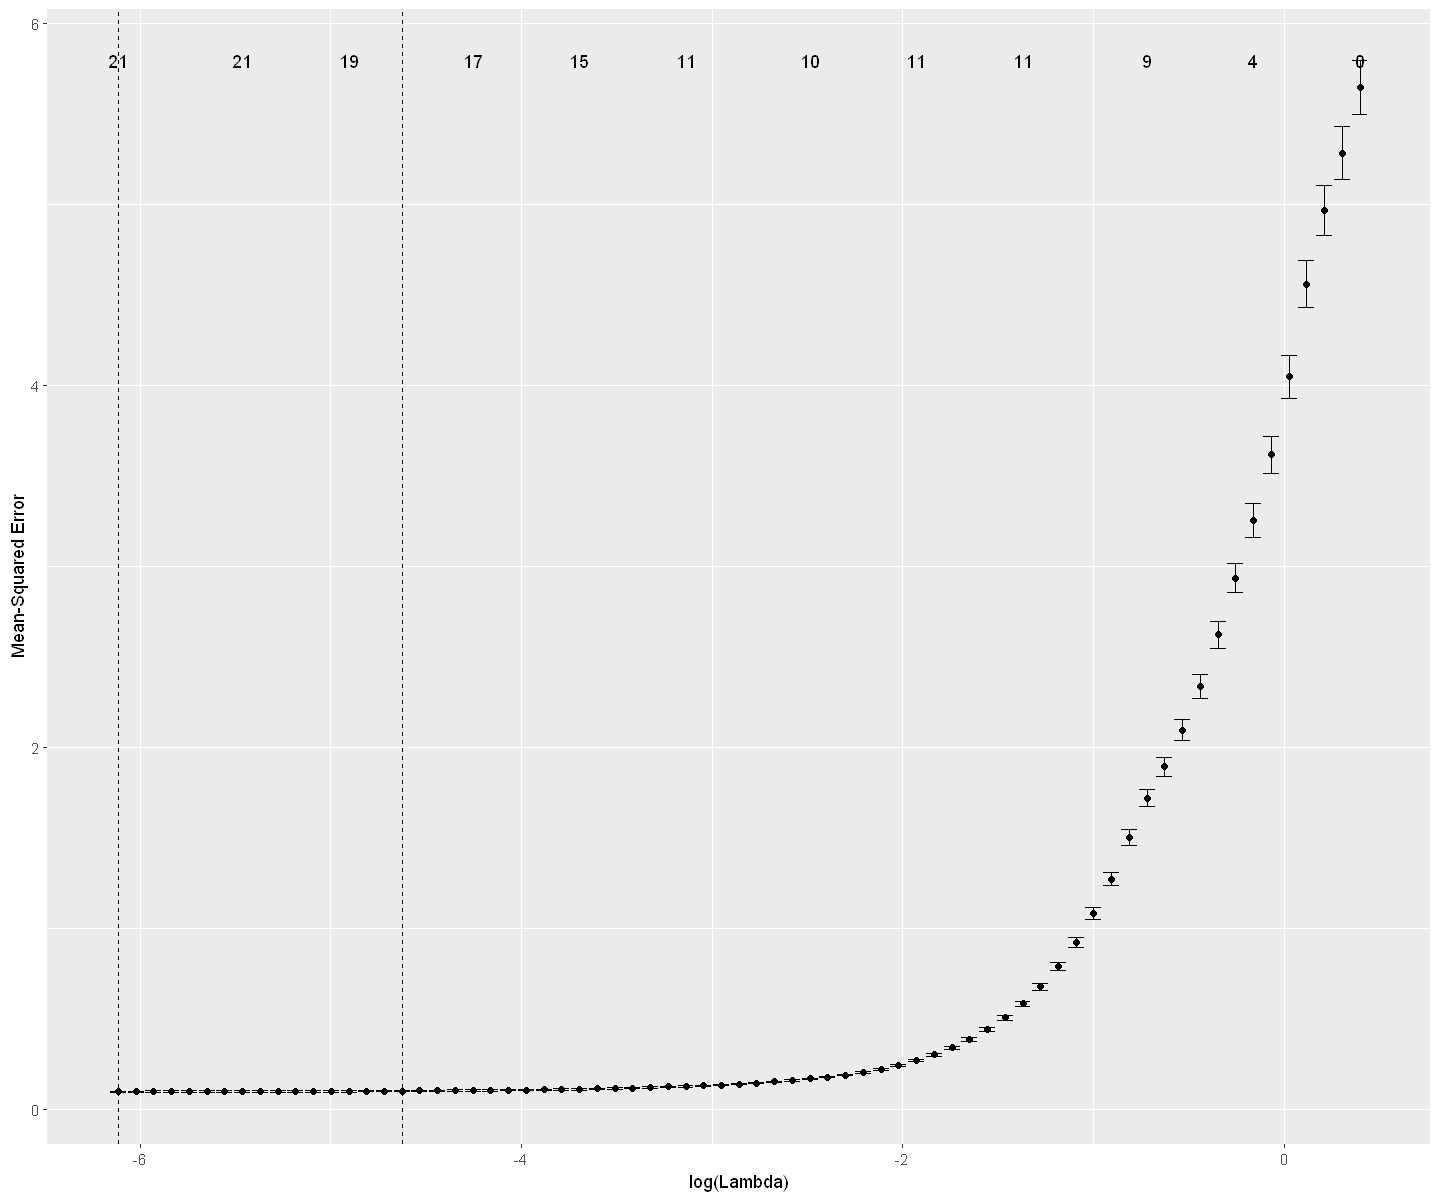

In [15]:
reg.lasso.cv <- cv.glmnet(y = datappr[, 10], x = x.mat)
#plot(reg.lasso.cv)
autoplot(reg.lasso.cv)

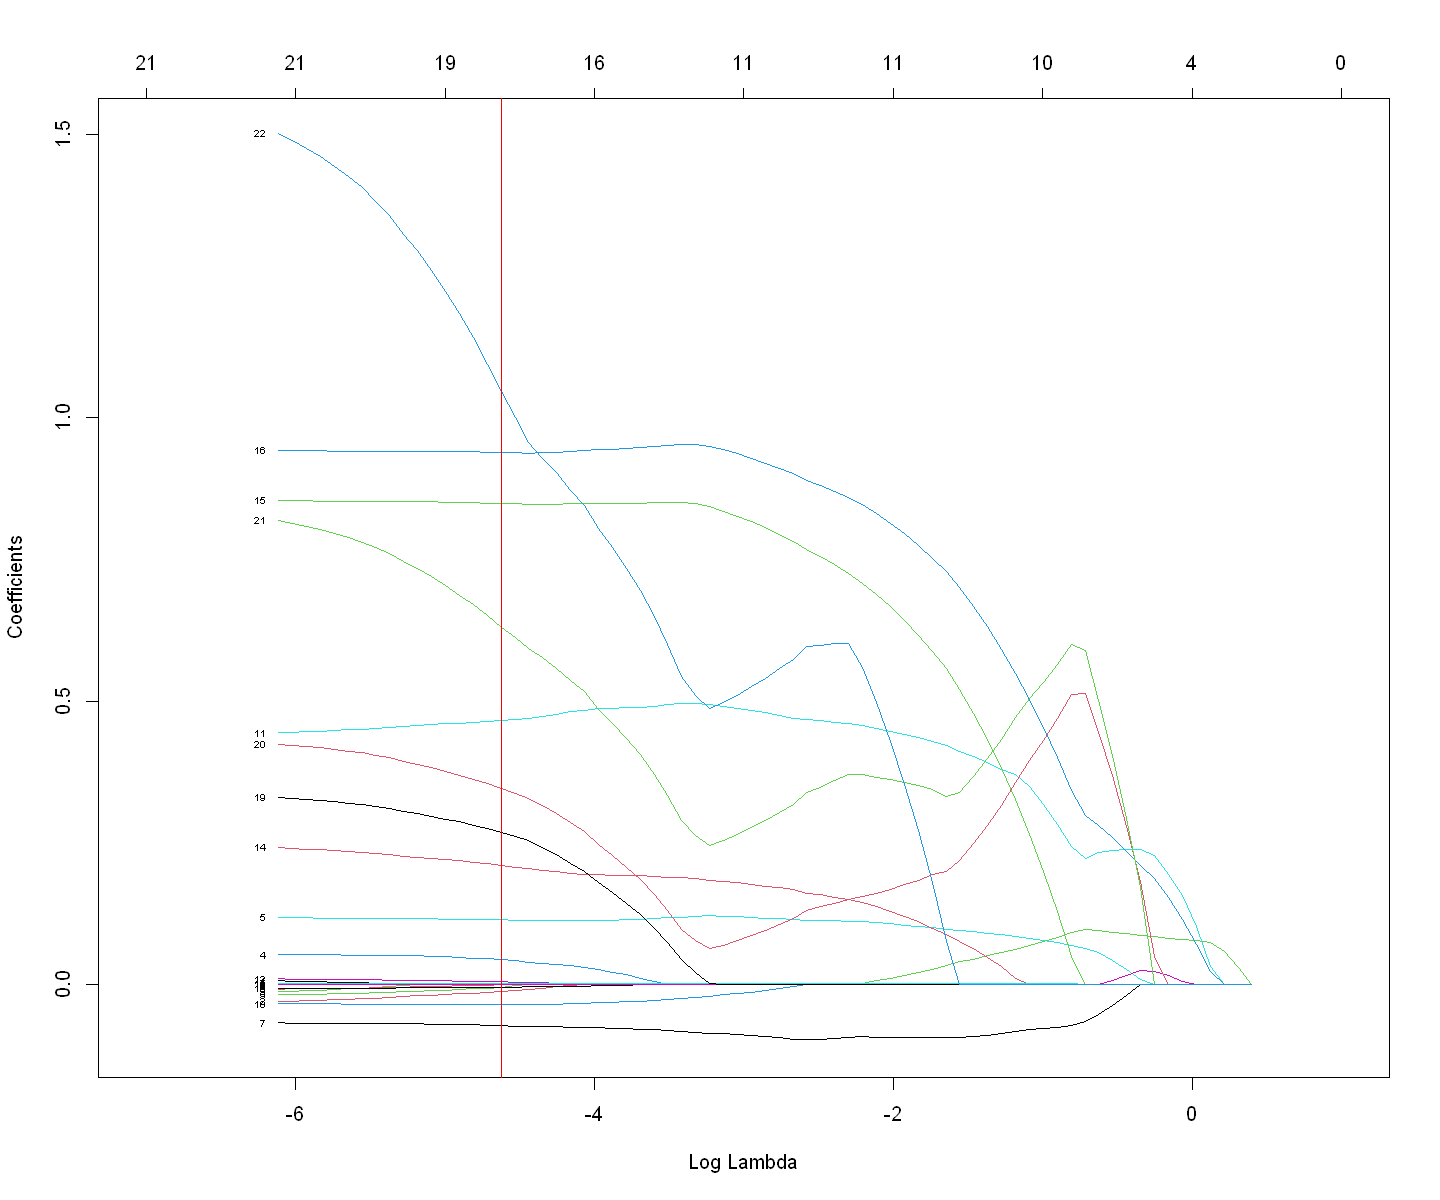

In [16]:
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-7,1),ylim=c(-0.1,1.5))
abline(v=log(reg.lasso.cv$lambda.1se),col="red")

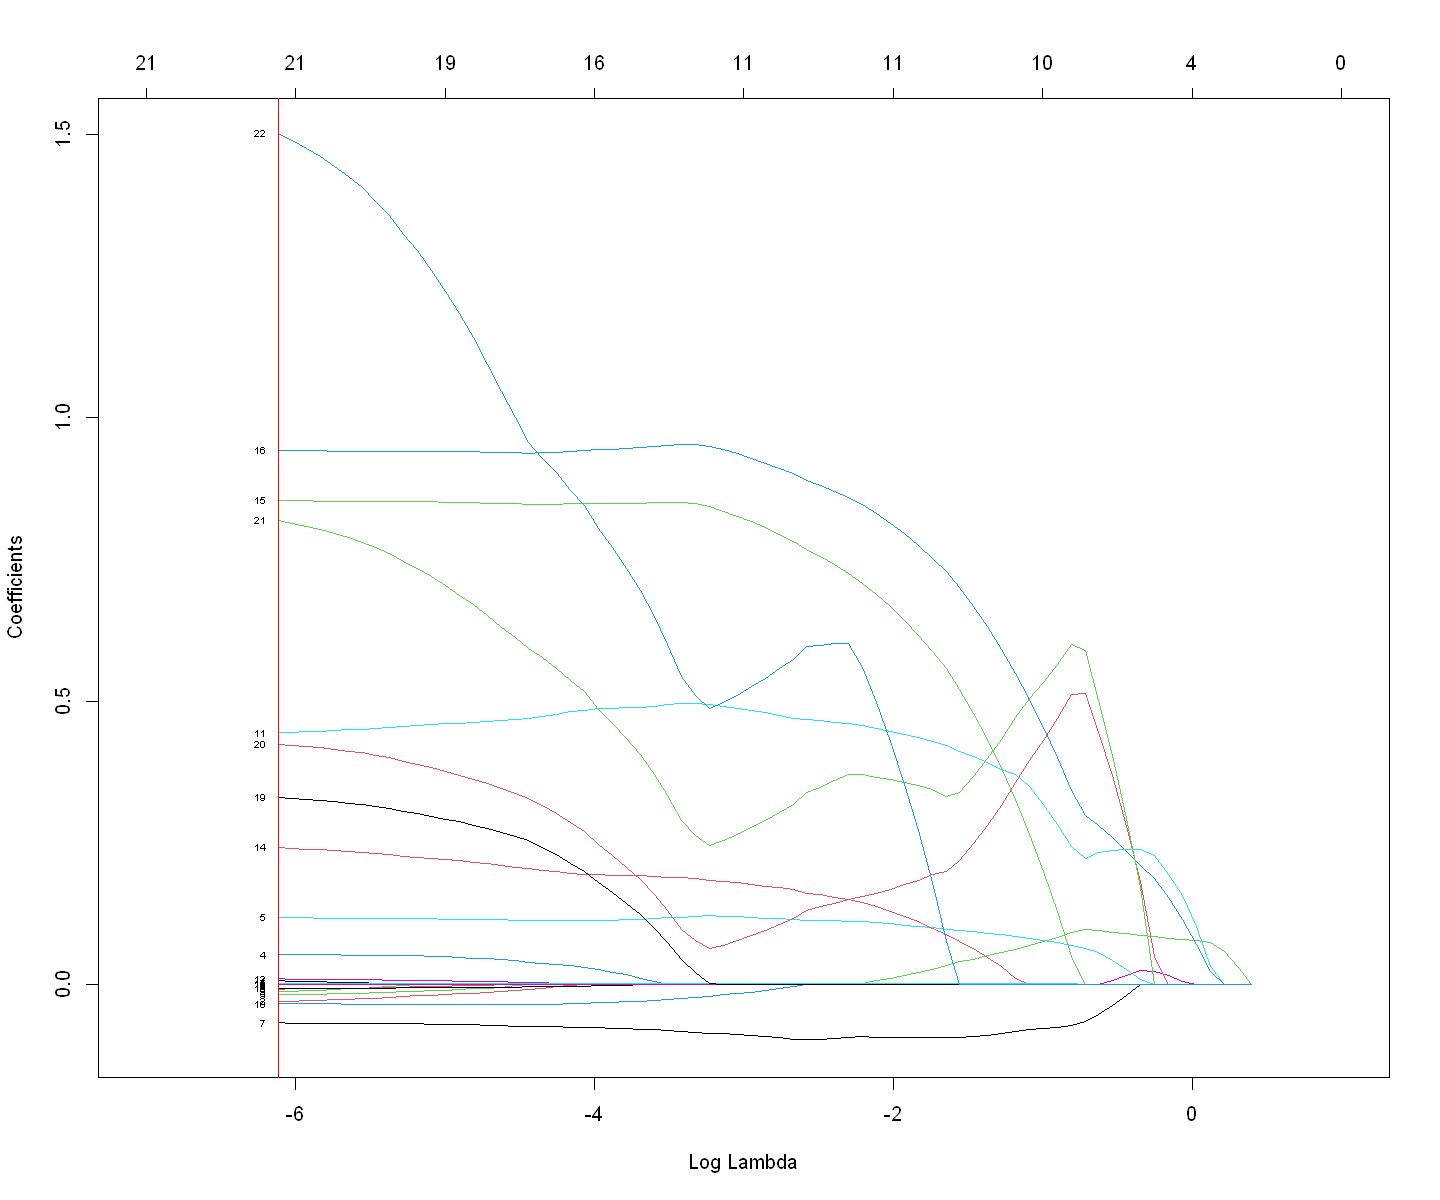

In [17]:
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-7,1),ylim=c(-0.1,1.5))
abline(v=log(reg.lasso.cv$lambda.min),col="red")

In [18]:
V=10 ; nV=floor(nrow(datappr)/V)
S=sample(1:nrow(datappr),replace=FALSE)
error.CV = c()
for(v in 1:V)
{ # Rq : les deux dernières obs sont tjs dans l'échantillon d'apprentissage...
    datappr.learn=datappr[-c(S[(nV*(v-1)):(nV*v)]),] 
    datappr.valid=datappr[c(S[(nV*(v-1)):(nV*v)]),]
    error.CV=c(error.CV,mean((datappr.valid$Value_co2_emissions_kt_by_country-predict(aov(Value_co2_emissions_kt_by_country ~ ., data=datappr.learn),newdata=datappr.valid))^2))
}
mean(error.CV)

print(reg.lasso.cv)

[1] 0.0998116


Call:  cv.glmnet(x = x.mat, y = datappr[, 10]) 

Measure: Mean-Squared Error 

      Lambda Index Measure       SE Nonzero
min 0.002212    71  0.1003 0.004078      21
1se 0.009802    55  0.1043 0.004065      18


In [19]:
### critère AIC linéaire
reg.glm.step <- step(reg.lm, direction = "backward")
summary(reg.glm.step)
anova(reg.glm.step)

Start:  AIC=-5293.87
Value_co2_emissions_kt_by_country ~ Year + Access.to.electricity....of.population. + 
    Access.to.clean.fuels.for.cooking + Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.nuclear..TWh. + Electricity.from.renewables..TWh. + 
    Low.carbon.electricity....electricity. + Primary.energy.consumption.per.capita..kWh.person. + 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    gdp_growth + gdp_per_capita + Density.n.P.Km2. + Land.Area.Km2. + 
    Latitude + Longitude + Country

                                                                   Df Sum of Sq
- Access.to.clean.fuels.for.cooking                                 1      0.09
- Longitude                                                         1      0.18
<none>                                                                         
- Electricity.from.nuclear..TWh.                                    1      1.33
- Year                                


Call:
lm(formula = Value_co2_emissions_kt_by_country ~ Year + Access.to.electricity....of.population. + 
    Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.nuclear..TWh. + Electricity.from.renewables..TWh. + 
    Low.carbon.electricity....electricity. + Primary.energy.consumption.per.capita..kWh.person. + 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    gdp_growth + gdp_per_capita + Density.n.P.Km2. + Land.Area.Km2. + 
    Latitude + Longitude + Country, data = datappr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04827 -0.17065  0.00854  0.19720  1.65261 

Coefficients:
                                                                   Estimate
(Intercept)                                                      -1.216e+01
Year2005-2009                                                    -4.935e-02
Year2010-2014                                                    -3.545e-02
Year2015-2020                       

Df  
Year                                                                3
Access.to.electricity....of.population.                             1
Renewable.energy.share.in.the.total.final.energy.consumption....    1
Electricity.from.nuclear..TWh.                                      1
Electricity.from.renewables..TWh.                                   1
Low.carbon.electricity....electricity.                              1
Primary.energy.consumption.per.capita..kWh.person.                  1
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.         1
gdp_growth                                                          1
gdp_per_capita                                                      1
Density.n.P.Km2.                                                    1
Land.Area.Km2.                                                      1
Latitude                                                            1
Longitude                                                           1
Country                                                             4
Residuals                                                        2273
                                                                 Sum Sq      
Year                                                               35.5281555
Access.to.electricity....of.population.                          3131.8099066
Renewable.energy.share.in.the.total.final.energy.consumption....  122.2668997
Electricity.from.nuclear..TWh.                                   2263.4414838
Electricity.from.renewables..TWh.                                1711.3559272
Low.carbon.electricity....electricity.                             12.4727513
Primary.energy.consumption.per.capita..kWh.person.                 26.2321904
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.        45.2362264
gdp_growth                                                          8.3706607
gdp_per_capita                                                      1.1210562
Density.n.P.Km2.                                                   13.9473567
Land.Area.Km2.                                                   5338.9918270
Latitude                                                            2.8995081
Longitude                                                           0.9028897
Country                                                            32.4344480
Residuals                                                         223.9835377
                                                                 Mean Sq     
Year                                                             1.184272e+01
Access.to.electricity....of.population.                          3.131810e+03
Renewable.energy.share.in.the.total.final.energy.consumption.... 1.222669e+02
Electricity.from.nuclear..TWh.                                   2.263441e+03
Electricity.from.renewables..TWh.                                1.711356e+03
Low.carbon.electricity....electricity.                           1.247275e+01
Primary.energy.consumption.per.capita..kWh.person.               2.623219e+01
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.      4.523623e+01
gdp_growth                                                       8.370661e+00
gdp_per_capita                                                   1.121056e+00
Density.n.P.Km2.                                                 1.394736e+01
Land.Area.Km2.                                                   5.338992e+03
Latitude                                                         2.899508e+00
Longitude                                                        9.028897e-01
Country                                                          8.108612e+00
Residuals                                                        9.854093e-02
                                                                 F value     
Year                                                               120.180703
Access.to.electricity....of.population.                          31

Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_point()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_point()`)."


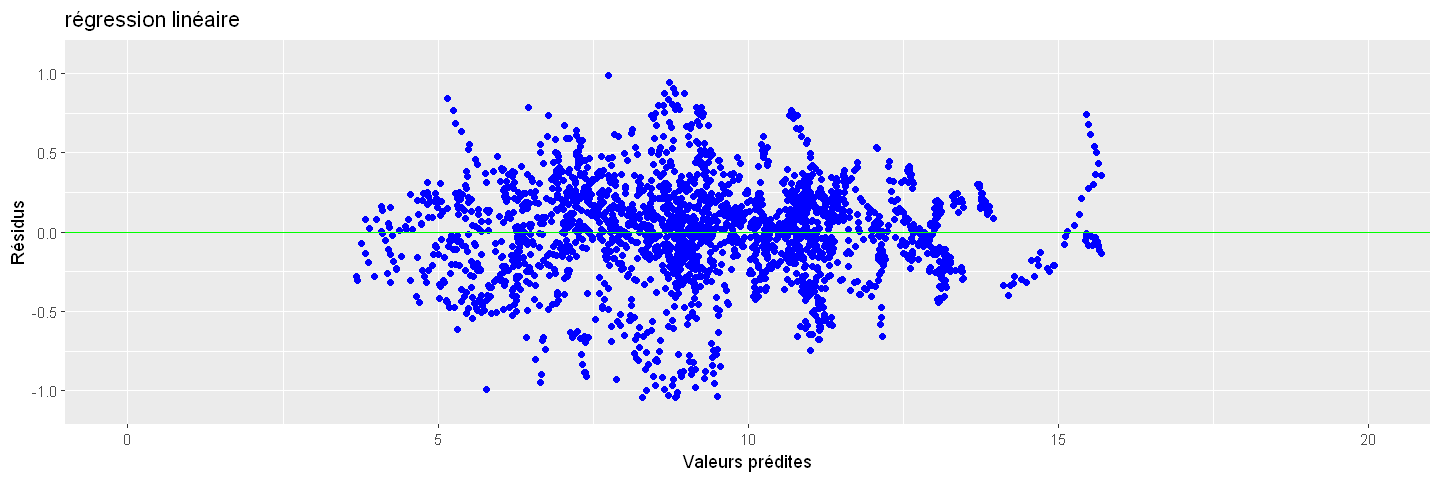

Warning message:
"Removed 3 rows containing missing values or values outside the scale range (`geom_point()`)."


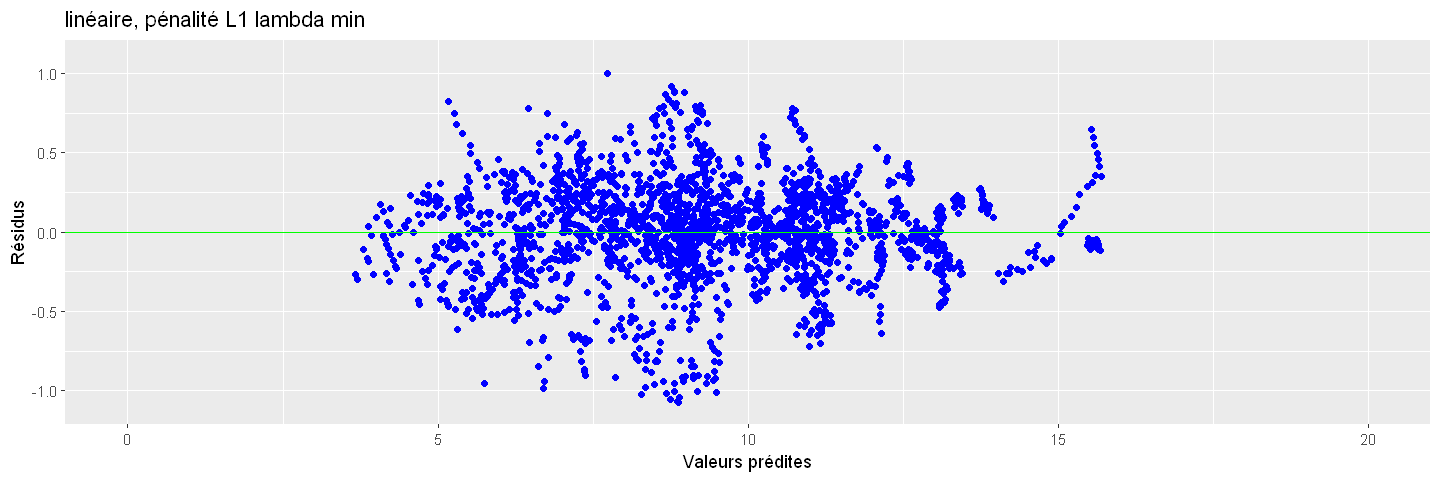

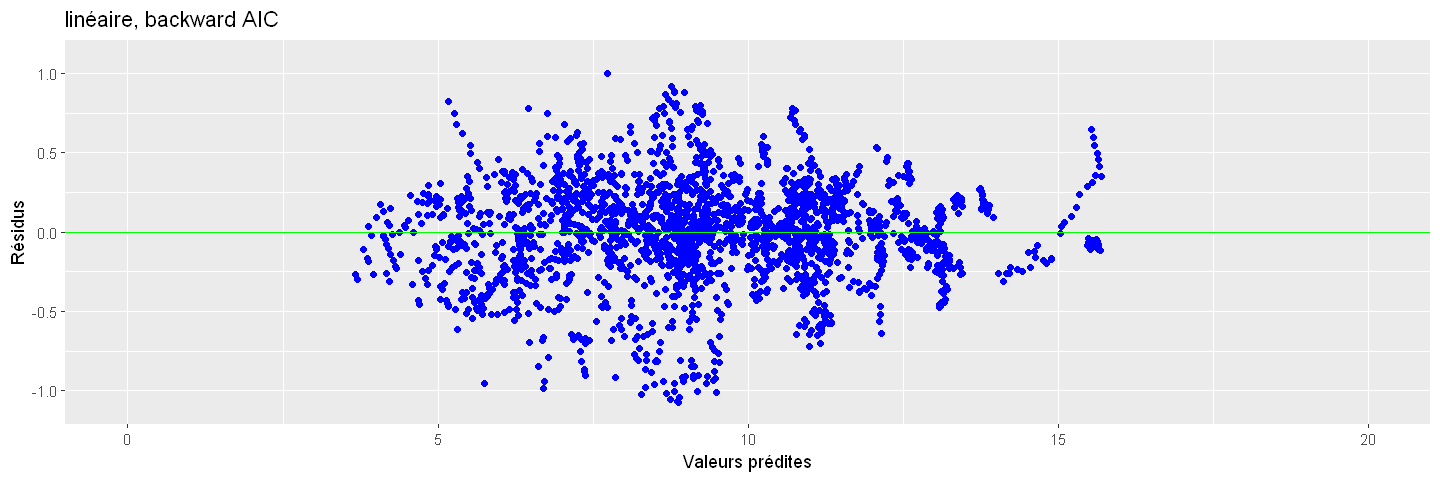

In [20]:
### linéaire pas de sélection
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values
### Lasso lambda min
fit.lasso <- predict(reg.lasso.cv, s = "lambda.min", newx = x.mat)
res.lasso <- datappr$Value_co2_emissions_kt_by_country - fit.lasso
### AIC
fit.glm <- reg.glm.step$fitted.values
res.glm <- reg.glm.step$residuals

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
g1<-gplot.res(fit.lm, res.lm, "régression linéaire")
g2<-gplot.res(fit.lasso, res.lasso, "linéaire, pénalité L1 lambda min")
g3<-gplot.res(fit.lasso, res.lasso, "linéaire, backward AIC")
g1
g2
g3

In [21]:
# Calcul des prévisions pour le modèle linéaire complet
pred.glm <- predict(reg.lm, newdata = datestr)
# Erreur quadratique moyenne de prévision (MSE)
sum((pred.glm - datestr[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr)

[1] 0.09864353

In [22]:
# Calcul des prévisions pour le modèle linéaire pénalisation Lasso
x.test <- model.matrix(Value_co2_emissions_kt_by_country ~ . - 1, data = datestr)
reg.lasso.cv.test <- cv.glmnet(y = datestr[, 10], x = x.test)
fit.lasso <- predict(reg.lasso.cv.test, s = "lambda.min", newx = x.test)
# Erreur quadratique moyenne de prévision (MSE)
sum((fit.lasso - datestr[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr)

[1] 0.09518893

In [23]:
# Calcul des prévisions pour le modèle linéaire backward AIC
pred.glm <- predict(reg.glm.step, newdata = datestr)
# Erreur quadratique moyenne de prévision (MSE)
sum((pred.glm - datestr[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr)

[1] 0.09877281

In [99]:
### Conclusion de partie 1 : le meilleur modèle est le Lasso

In [24]:
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 3))
coef(reg.lasso.cv, s = "lambda.min")

[1] "CV estimate of lambda : 0.002"

23 x 1 sparse Matrix of class "dgCMatrix"
                                                                            s1
(Intercept)                                                      -1.214827e+01
Year2000-2004                                                     6.553939e-03
Year2005-2009                                                    -2.970976e-02
Year2010-2014                                                    -1.254505e-02
Year2015-2020                                                     5.247590e-02
Access.to.electricity....of.population.                           1.181161e-01
Access.to.clean.fuels.for.cooking                                 .           
Renewable.energy.share.in.the.total.final.energy.consumption.... -6.762879e-02
Electricity.from.nuclear..TWh.                                   -7.807579e-03
Electricity.from.renewables..TWh.                                -1.815561e-02
Low.carbon.electricity....electricity.                           -3.384203e-02
Primary.en

In [25]:
library(e1071)

In [26]:
svm.reg.lin.tune <- tune.svm(Value_co2_emissions_kt_by_country ~ . - Country - Year, type = "eps-regression", data = datappr, kernel = "lin", cost = c(1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5))
summary(svm.reg.lin.tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    2

- best performance: 0.1167154 

- Detailed performance results:
  cost     error dispersion
1  1.0 0.1167480 0.01345380
2  1.5 0.1167166 0.01348867
3  2.0 0.1167154 0.01348865
4  2.5 0.1167507 0.01346933
5  3.0 0.1167454 0.01349340
6  3.5 0.1167725 0.01351324
7  4.0 0.1167485 0.01347609
8  4.5 0.1167697 0.01348550
9  5.0 0.1167368 0.01349754


Warning message:
"Removed 24 rows containing missing values or values outside the scale range (`geom_point()`)."


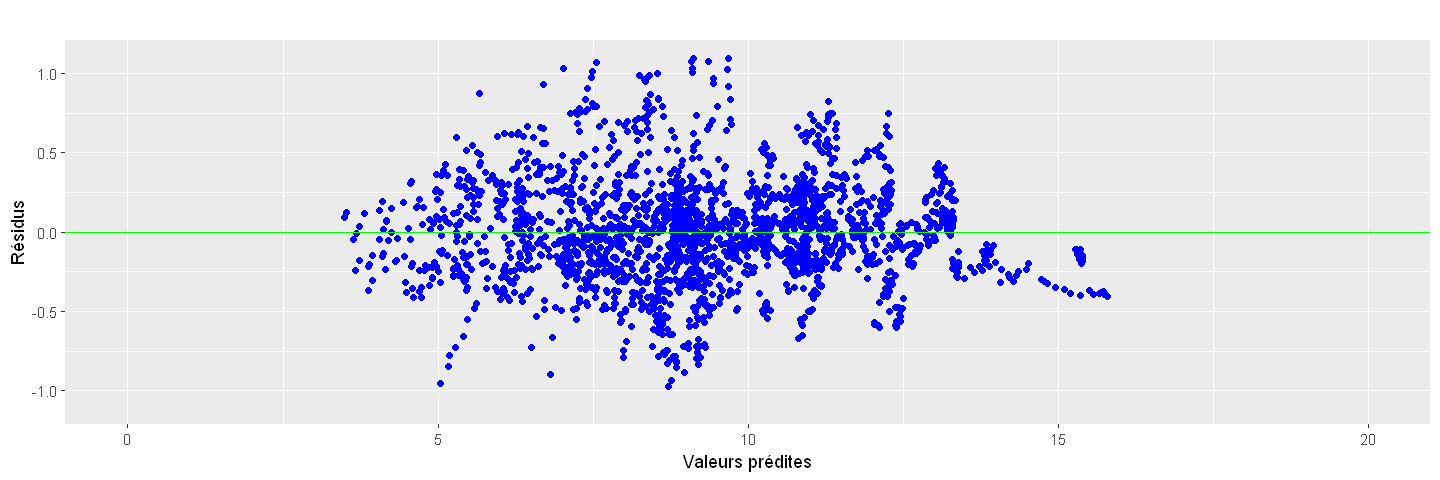

In [27]:
fit.svmr=svm.reg.lin.tune$best.model$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [28]:
svm.reg.poly <- svm(Value_co2_emissions_kt_by_country ~ . - Country - Year, type = "eps-regression", data = datappr, kernel = "poly")
summary(svm.reg.poly)


Call:
svm(formula = Value_co2_emissions_kt_by_country ~ . - Country - Year, 
    data = datappr, type = "eps-regression", kernel = "poly")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
      gamma:  0.07142857 
     coef.0:  0 
    epsilon:  0.1 


Number of Support Vectors:  1053






Warning message:
"Removed 54 rows containing missing values or values outside the scale range (`geom_point()`)."


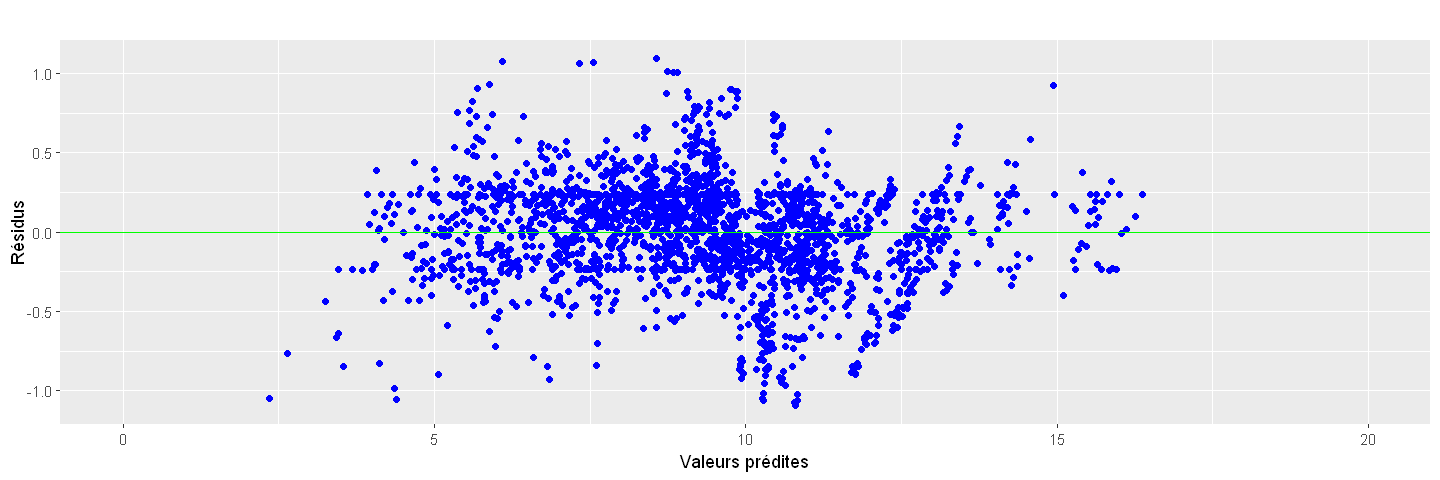

In [29]:
fit.svmr=svm.reg.poly$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [30]:
svm.reg.poly.tune <- tune.svm(Value_co2_emissions_kt_by_country ~ . - Country - Year, type = "eps-regression", data = datappr, kernel = "poly", cost = c(1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5), coef0 = -5:5, gamma = seq(0.02, 0.1, by = 0.02))
summary(svm.reg.poly.tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma coef0 cost
  0.04     4    1

- best performance: 0.03517675 

- Detailed performance results:
    gamma coef0 cost        error   dispersion
1    0.02    -5  1.0 7.464204e+04 1.158964e+04
2    0.04    -5  1.0 1.303622e+06 2.337280e+05
3    0.06    -5  1.0 7.820813e+06 1.446143e+06
4    0.08    -5  1.0 2.606785e+07 3.714615e+06
5    0.10    -5  1.0 6.988748e+07 1.196396e+07
6    0.02    -4  1.0 5.103071e+04 9.753754e+03
7    0.04    -4  1.0 8.802287e+05 1.647158e+05
8    0.06    -4  1.0 5.258192e+06 7.369037e+05
9    0.08    -4  1.0 1.798168e+07 2.782042e+06
10   0.10    -4  1.0 4.722005e+07 8.315290e+06
11   0.02    -3  1.0 2.941654e+04 5.836578e+03
12   0.04    -3  1.0 5.633728e+05 8.583260e+04
13   0.06    -3  1.0 3.201251e+06 4.946761e+05
14   0.08    -3  1.0 1.109885e+07 2.056330e+06
15   0.10    -3  1.0 2.860010e+07 5.242902e+06
16   0.02    -2  1.0 1.427707e+04 2.779126e+03
17   

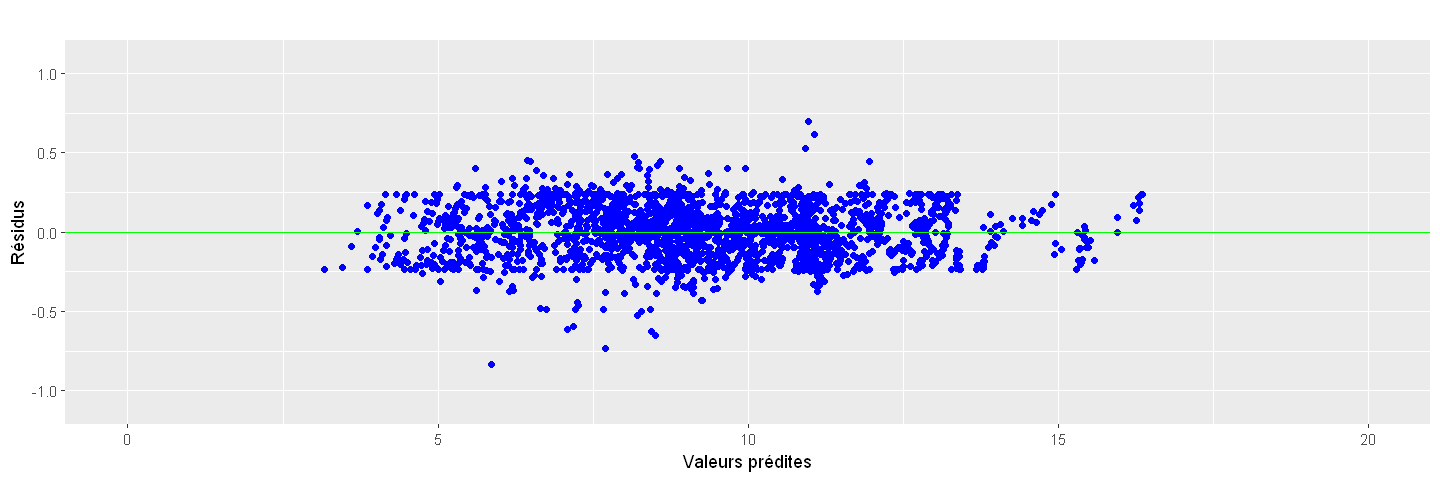

In [31]:
fit.svmr=svm.reg.poly.tune$best.model$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [32]:
svm.reg.rad <- svm(Value_co2_emissions_kt_by_country ~ . - Country - Year, type = "eps-regression", data = datappr, kernel = "radial")
summary(svm.reg.rad)


Call:
svm(formula = Value_co2_emissions_kt_by_country ~ . - Country - Year, 
    data = datappr, type = "eps-regression", kernel = "radial")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.07142857 
    epsilon:  0.1 


Number of Support Vectors:  416






Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_point()`)."


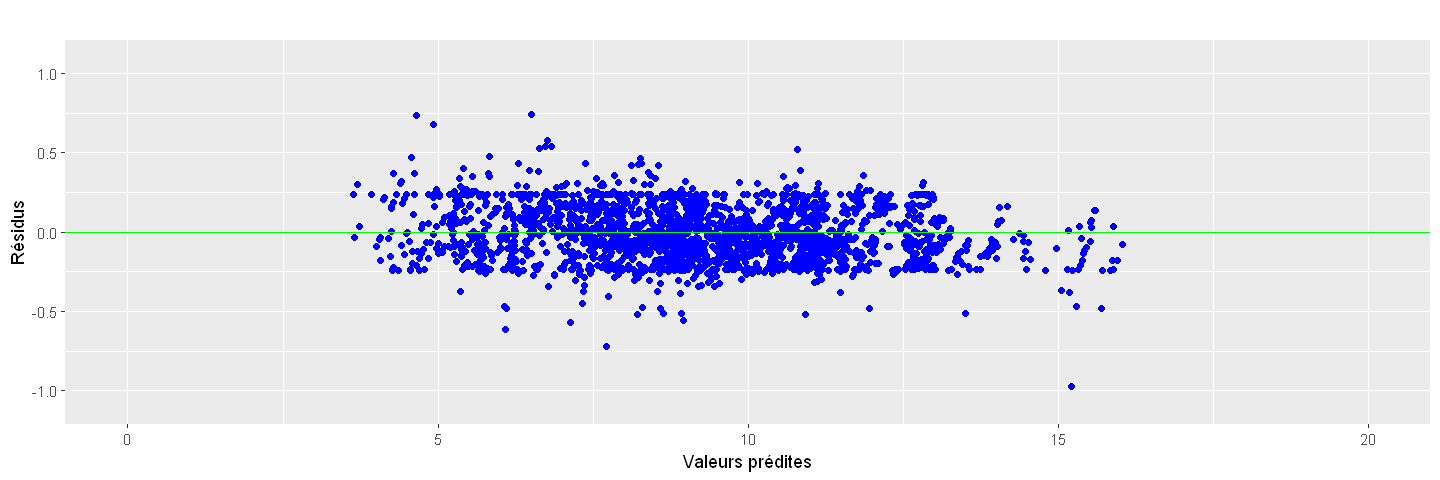

In [33]:
fit.svmr=svm.reg.rad$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [34]:
svm.reg.rad.tune <- tune.svm(Value_co2_emissions_kt_by_country ~ . - Country - Year, type = "eps-regression", data = datappr, kernel = "radial", cost = c(1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6), gamma = seq(0.02, 0.1, by = 0.02))
summary(svm.reg.rad.tune)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
  0.02    6

- best performance: 0.03928762 

- Detailed performance results:
   gamma cost      error dispersion
1   0.02  1.0 0.05731560 0.01427579
2   0.04  1.0 0.05535562 0.01842180
3   0.06  1.0 0.05531532 0.02077101
4   0.08  1.0 0.05786856 0.02242022
5   0.10  1.0 0.06253922 0.02386713
6   0.02  1.5 0.05257366 0.01383097
7   0.04  1.5 0.04905036 0.01775941
8   0.06  1.5 0.04913164 0.02020465
9   0.08  1.5 0.05157612 0.02192404
10  0.10  1.5 0.05567217 0.02309352
11  0.02  2.0 0.04955570 0.01343844
12  0.04  2.0 0.04587149 0.01678154
13  0.06  2.0 0.04606621 0.01959307
14  0.08  2.0 0.04867375 0.02140630
15  0.10  2.0 0.05284392 0.02245683
16  0.02  2.5 0.04716596 0.01320944
17  0.04  2.5 0.04378536 0.01625073
18  0.06  2.5 0.04430969 0.01924067
19  0.08  2.5 0.04761420 0.02145070
20  0.10  2.5 0.05200814 0.02260163
21  0.02  3.0 0.04559527 0.01284501
22  0.04  3.0 0.04241755

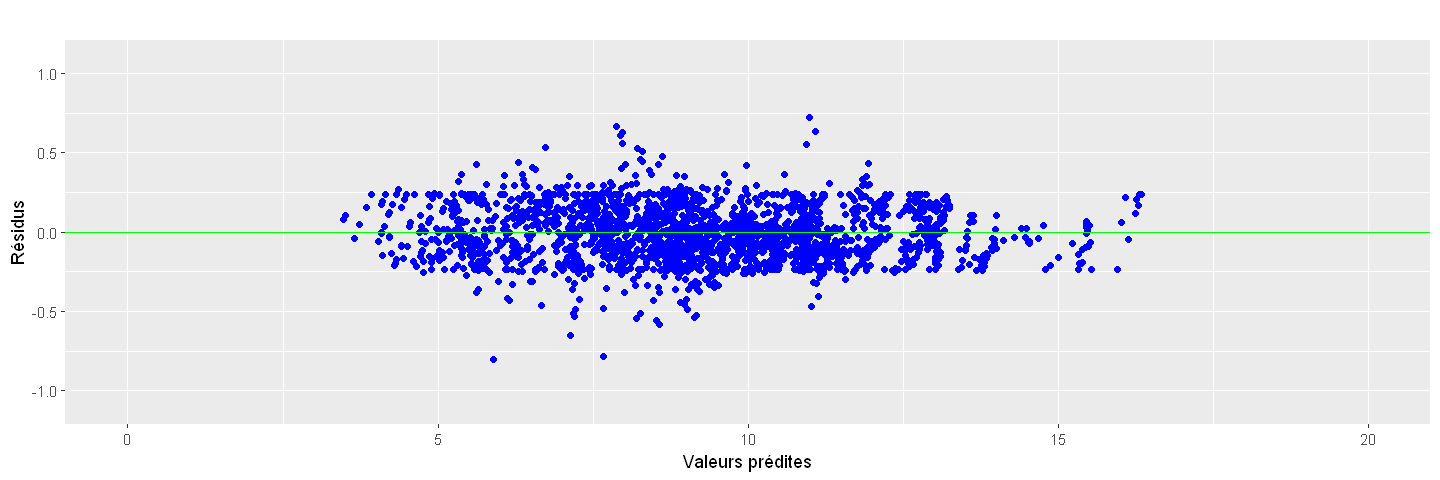

In [35]:
fit.svmr=svm.reg.rad.tune$best.model$fitted
res.svmr=fit.svmr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.svmr,res.svmr,titre="")

In [36]:
pred.svmr.lin.tune=predict(svm.reg.lin.tune$best.model,newdata=datestr)
pred.svmr.poly = predict(svm.reg.poly, newdata=datestr)
pred.svmr.poly.tune = predict(svm.reg.poly.tune$best.model, newdata = datestr)
pred.svmr.rad = predict(svm.reg.rad, newdata=datestr)
pred.svmr.rad.tune = predict(svm.reg.rad.tune$best.model, newdata = datestr)

paste("Tuned linear kernel:",sum((pred.svmr.lin.tune-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")
paste("Default polynomial kernel:",sum((pred.svmr.poly-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")
paste("Tuned polynomial kernel:",sum((pred.svmr.poly.tune-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")
paste("Default radial kernel:",sum((pred.svmr.rad-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")
paste("Tuned radial kernel:",sum((pred.svmr.rad.tune-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr),sep=" ")

[1] "Tuned linear kernel: 0.112860947046157"

[1] "Default polynomial kernel: 0.233254166009602"

[1] "Tuned polynomial kernel: 0.0339310043357134"

[1] "Default radial kernel: 0.0585088051359562"

[1] "Tuned radial kernel: 0.0489893271745995"

In [28]:
### conclusion partie 2 : Tuned polynomial est le meilleur
### meilleur aussi que Lasso avec lambda min (pour rappel : 0.09)

In [37]:
library(rpart) 
help(rpart)
help(rpart.control)

rpart                  package:rpart                   R Documentation

_R_e_c_u_r_s_i_v_e _P_a_r_t_i_t_i_o_n_i_n_g _a_n_d _R_e_g_r_e_s_s_i_o_n _T_r_e_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     Fit a 'rpart' model

_U_s_a_g_e:

     rpart(formula, data, weights, subset, na.action = na.rpart, method,
           model = FALSE, x = FALSE, y = TRUE, parms, control, cost, ...)
     
_A_r_g_u_m_e_n_t_s:

 formula: a formula, with a response but no interaction terms.  If this
          is a data frame, it is taken as the model frame (see
          'model.frame).'

    data: an optional data frame in which to interpret the variables
          named in the formula.

 weights: optional case weights.

  subset: optional expression saying that only a subset of the rows of
          the data should be used in the fit.

na.action: the default action deletes all observations for which 'y' is
          missing, but keeps those in which one or more predictors are
          missing.

  method: one of '"anova"', '"poisson"', '"class"' or '"exp"'.  If
          'method' is missing then the routine tries to make an
          intelligent guess.  If 'y' is a survival object, then 'method
          = "exp"' is assumed, if 'y' has 2 columns then 'method =
          "poisson"' is assumed, if 'y' is a factor then 'method =
          "class"' is assumed, otherwise 'method = "anova"' is assumed.
          It is wisest to specify the method directly, especially as
          more criteria may added to the function in future.

          Alternatively, 'method' can be a list of functions named
          'init', 'split' and 'eval'.  Examples are given in the file
          'tests/usersplits.R' in the sources, and in the vignettes
          'User Written Split Functions'.

   model: if logical: keep a copy of the model frame in the result?  If
          the input value for 'model' is a model frame (likely from an
          earlier call to the 'rpart' function), then this frame is
          used rather than constructing new data.

       x: keep a copy of the 'x' matrix in the result.

       y: keep a copy of the dependent variable in the result.  If
          missing and 'model' is supplied this defaults to 'FALSE'.

   parms: optional parameters for the splitting function.
          Anova splitting has no parameters.
          Poisson splitting has a single parameter, the coefficient of
          variation of the prior distribution on the rates.  The
          default value is 1.
          Exponential splitting has the same parameter as Poisson.
          For classification splitting, the list can contain any of:
          the vector of prior probabilities (component 'prior'), the
          loss matrix (component 'loss') or the splitting index
          (component 'split').  The priors must be positive and sum to
          1.  The loss matrix must have zeros on the diagonal and
          positive off-diagonal elements.  The splitting index can be
          'gini' or 'information'.  The default priors are proportional
          to the data counts, the losses default to 1, and the split
          defaults to 'gini'.

 control: a list of options that control details of the 'rpart'
          algorithm.  See 'rpart.control'.

    cost: a vector of non-negative costs, one for each variable in the
          model. Defaults to one for all variables.  These are scalings
          to be applied when considering splits, so the improvement on
          splitting on a variable is divided by its cost in deciding
          which split to choose.

     ...: arguments to 'rpart.control' may also be specified in the
          call to 'rpart'.  They are checked against the list of valid
          arguments.

_D_e_t_a_i_l_s:

     This differs from the 'tree' function in S mainly in its handling
     of surrogate variables.  In most details it follows Breiman _et.
     al_ (1984) quite closely.  R package 'tree' prov

In [38]:
tree.reg=rpart(Value_co2_emissions_kt_by_country~.,data=datappr,control=rpart.control(cp=0.001))

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


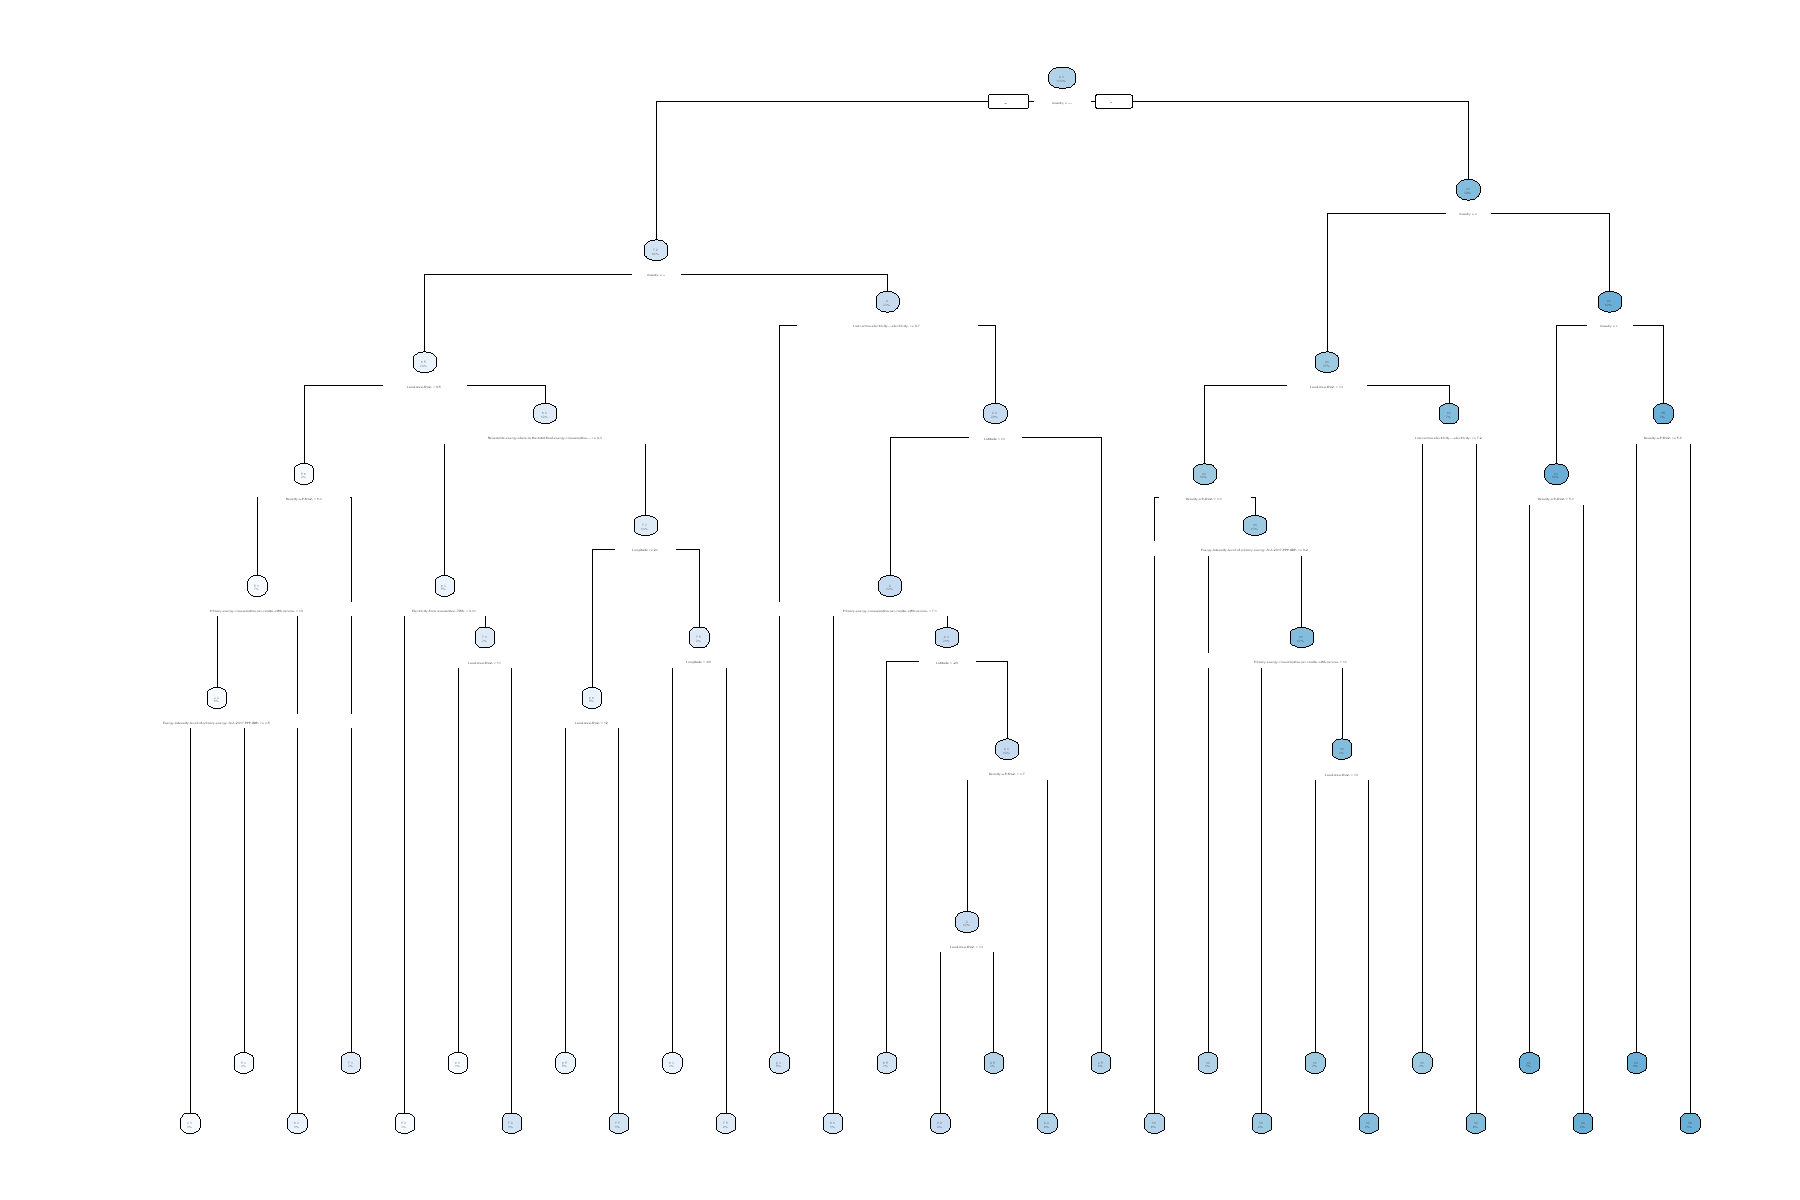

In [39]:
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
rpart.plot(tree.reg)

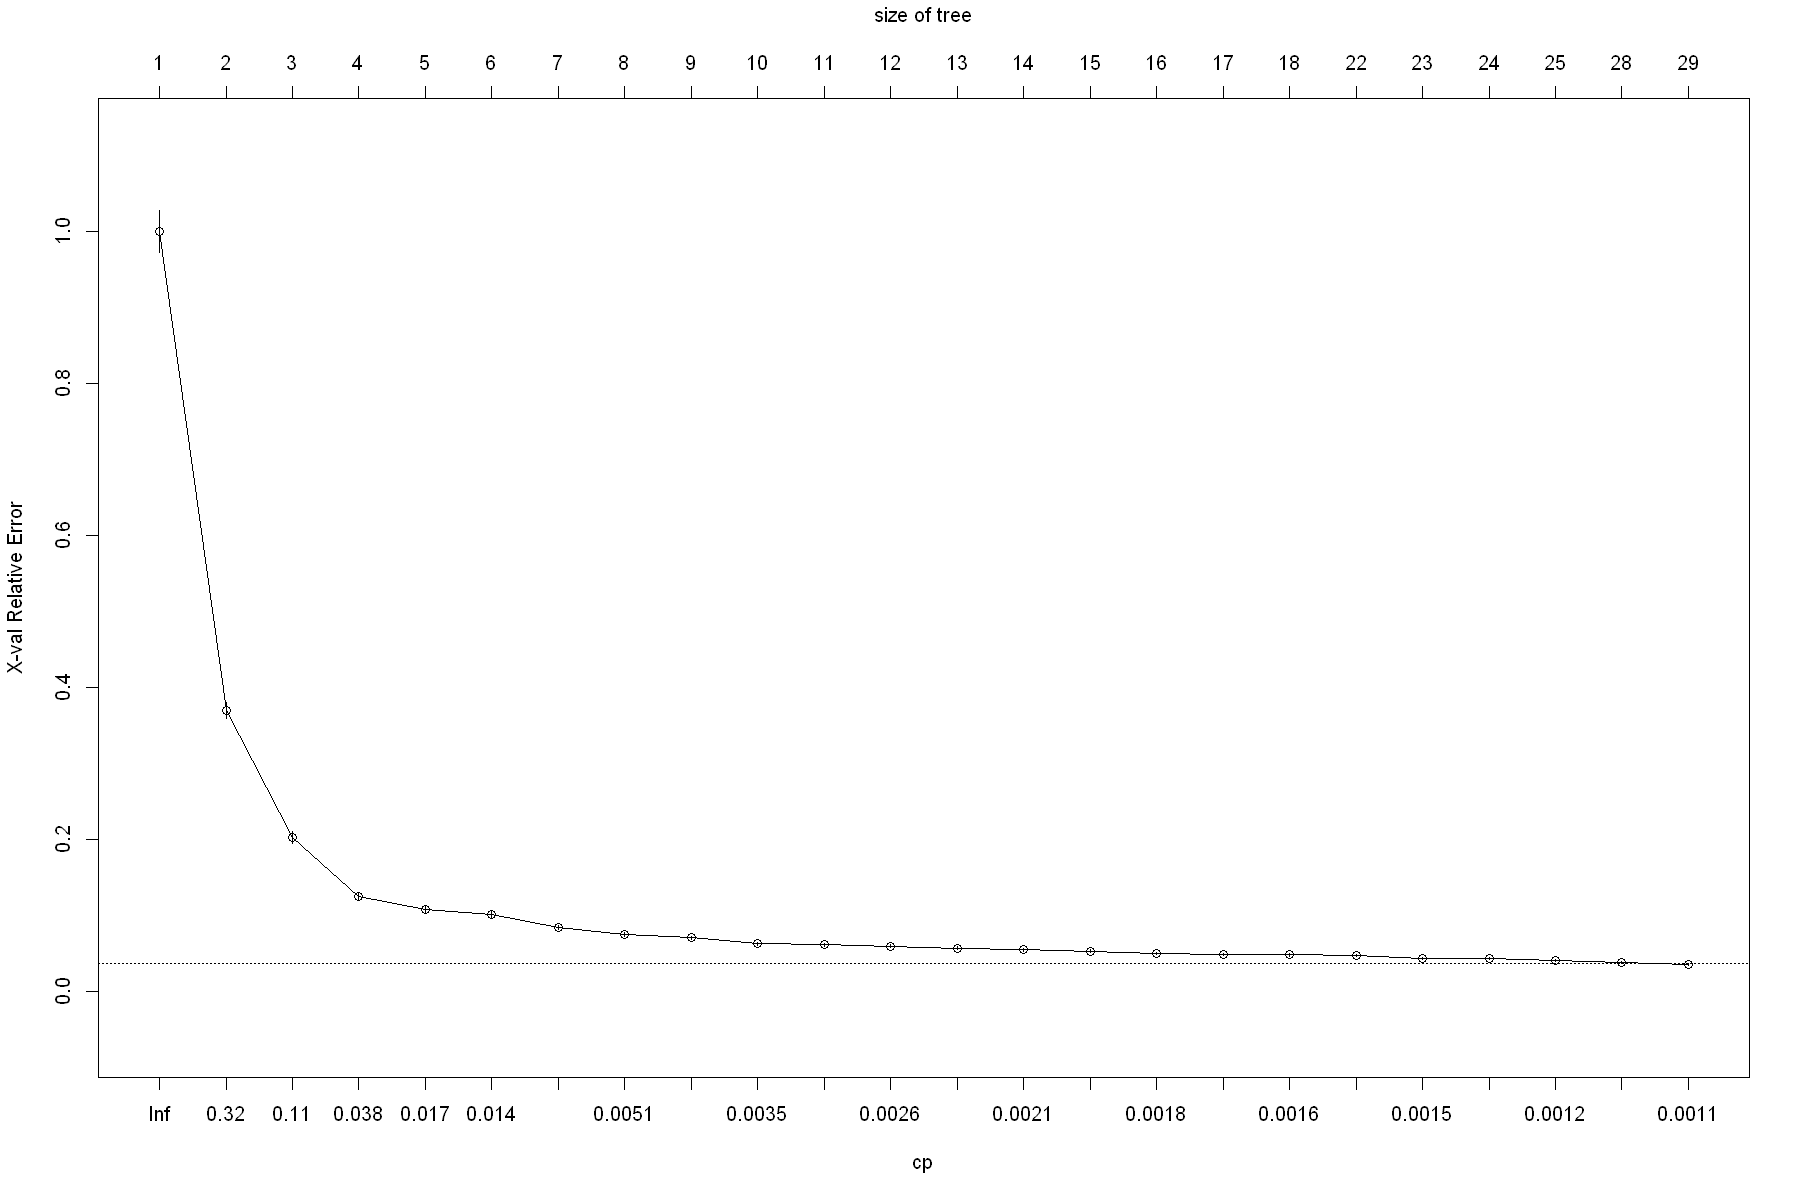

xpred.rpart               package:rpart                R Documentation

_R_e_t_u_r_n _C_r_o_s_s-_V_a_l_i_d_a_t_e_d _P_r_e_d_i_c_t_i_o_n_s

_D_e_s_c_r_i_p_t_i_o_n:

     Gives the predicted values for an 'rpart' fit, under cross
     validation, for a set of complexity parameter values.

_U_s_a_g_e:

     xpred.rpart(fit, xval = 10, cp, return.all = FALSE)
     
_A_r_g_u_m_e_n_t_s:

     fit: a object of class '"rpart"'.

    xval: number of cross-validation groups.  This may also be an
          explicit list of integers that define the cross-validation
          groups.

      cp: the desired list of complexity values.  By default it is
          taken from the 'cptable' component of the fit.

return.all: if FALSE return only the first element of the prediction

_D_e_t_a_i_l_s:

     Complexity penalties are actually ranges, not values.  If the 'cp'
     values found in the table were .36, .28, and .13, for instance,
     this means that the first row of the table holds for all
     complexity penalties in the range [.36, 1], the second row for
     'cp' in the range [.28, .36) and the third row for [.13,.28).  By
     default, the geometric mean of each interval is used for cross
     validation.

_V_a_l_u_e:

     A matrix with one row for each observation and one column for each
     complexity value.  If 'return.all' is TRUE and the prediction for
     each node is a vector, then the result will be an array containing
     all of the predictions.  When the response is categorical, for
     instance, the result contains the predicted class followed by the
     class probabilities of the selected terminal node; 'result[1,,]'
     will be the matrix of predicted classes, 'result[2,,]' the matrix
     of class 1 probabilities, etc.

_S_e_e _A_l_s_o:

     'rpart'

_E_x_a_m_p_l_e_s:

     fit <- rpart(Mileage ~ Weight, car.test.frame)
     xmat <- xpred.rpart(fit)
     xerr <- (xmat - car.test.frame$Mileage)^2
     apply(xerr, 2, sum)   # cross-validated error estimate
     
     # approx same result as rel. error from printcp(fit)
     apply(xerr, 2, sum)/var(car.test.frame$Mileage) 
     printcp(fit)

In [40]:
help(xpred.rpart)
xmat<-xpred.rpart(tree.reg,xval=10) 
# one row for each observation and one column for each complexity value

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr[,"Value_co2_emissions_kt_by_country"])^2,2,sum)

plotcp(tree.reg)

[1] 0.001051734

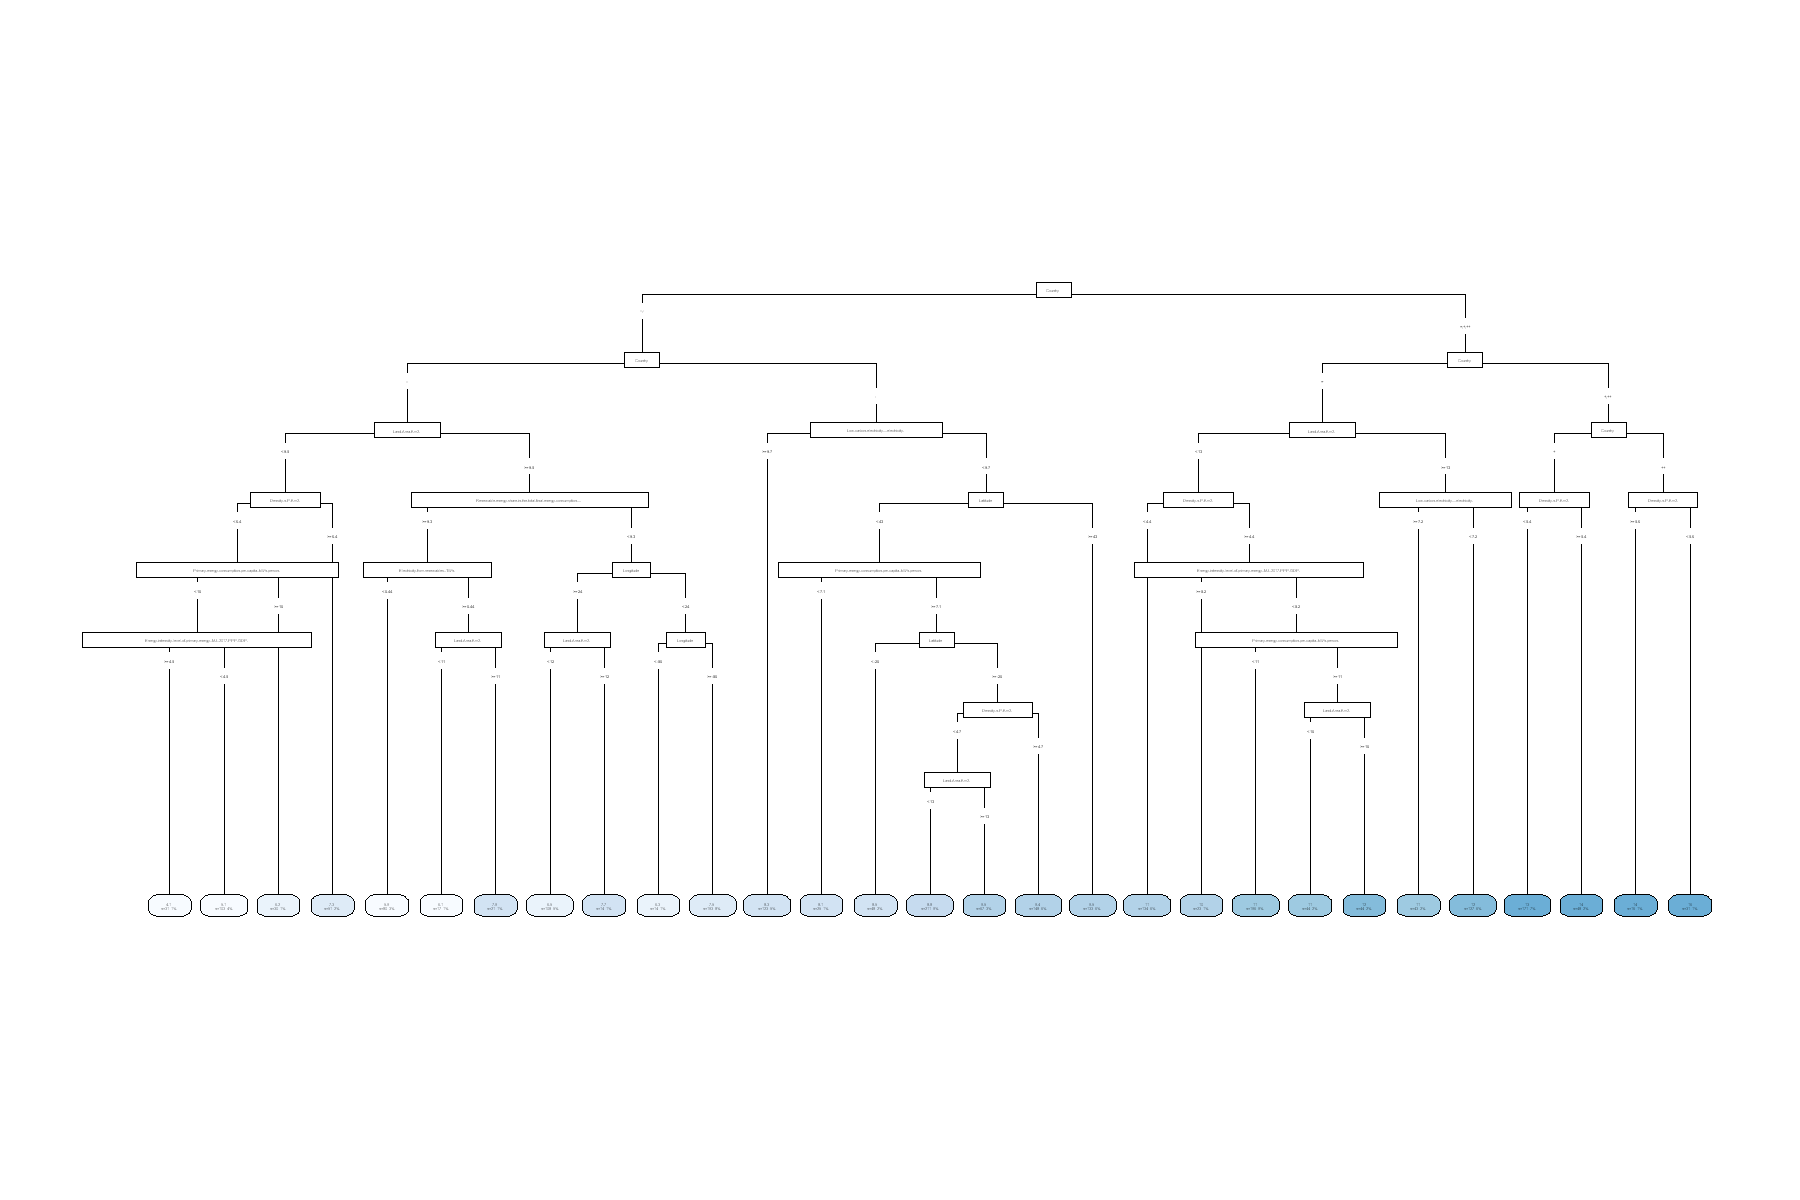

In [41]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(Value_co2_emissions_kt_by_country~.,data=datappr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(tree.reg,type=5,extra=101)

Le chargement a nécessité le package : grid

Le chargement a nécessité le package : libcoin

Le chargement a nécessité le package : mvtnorm



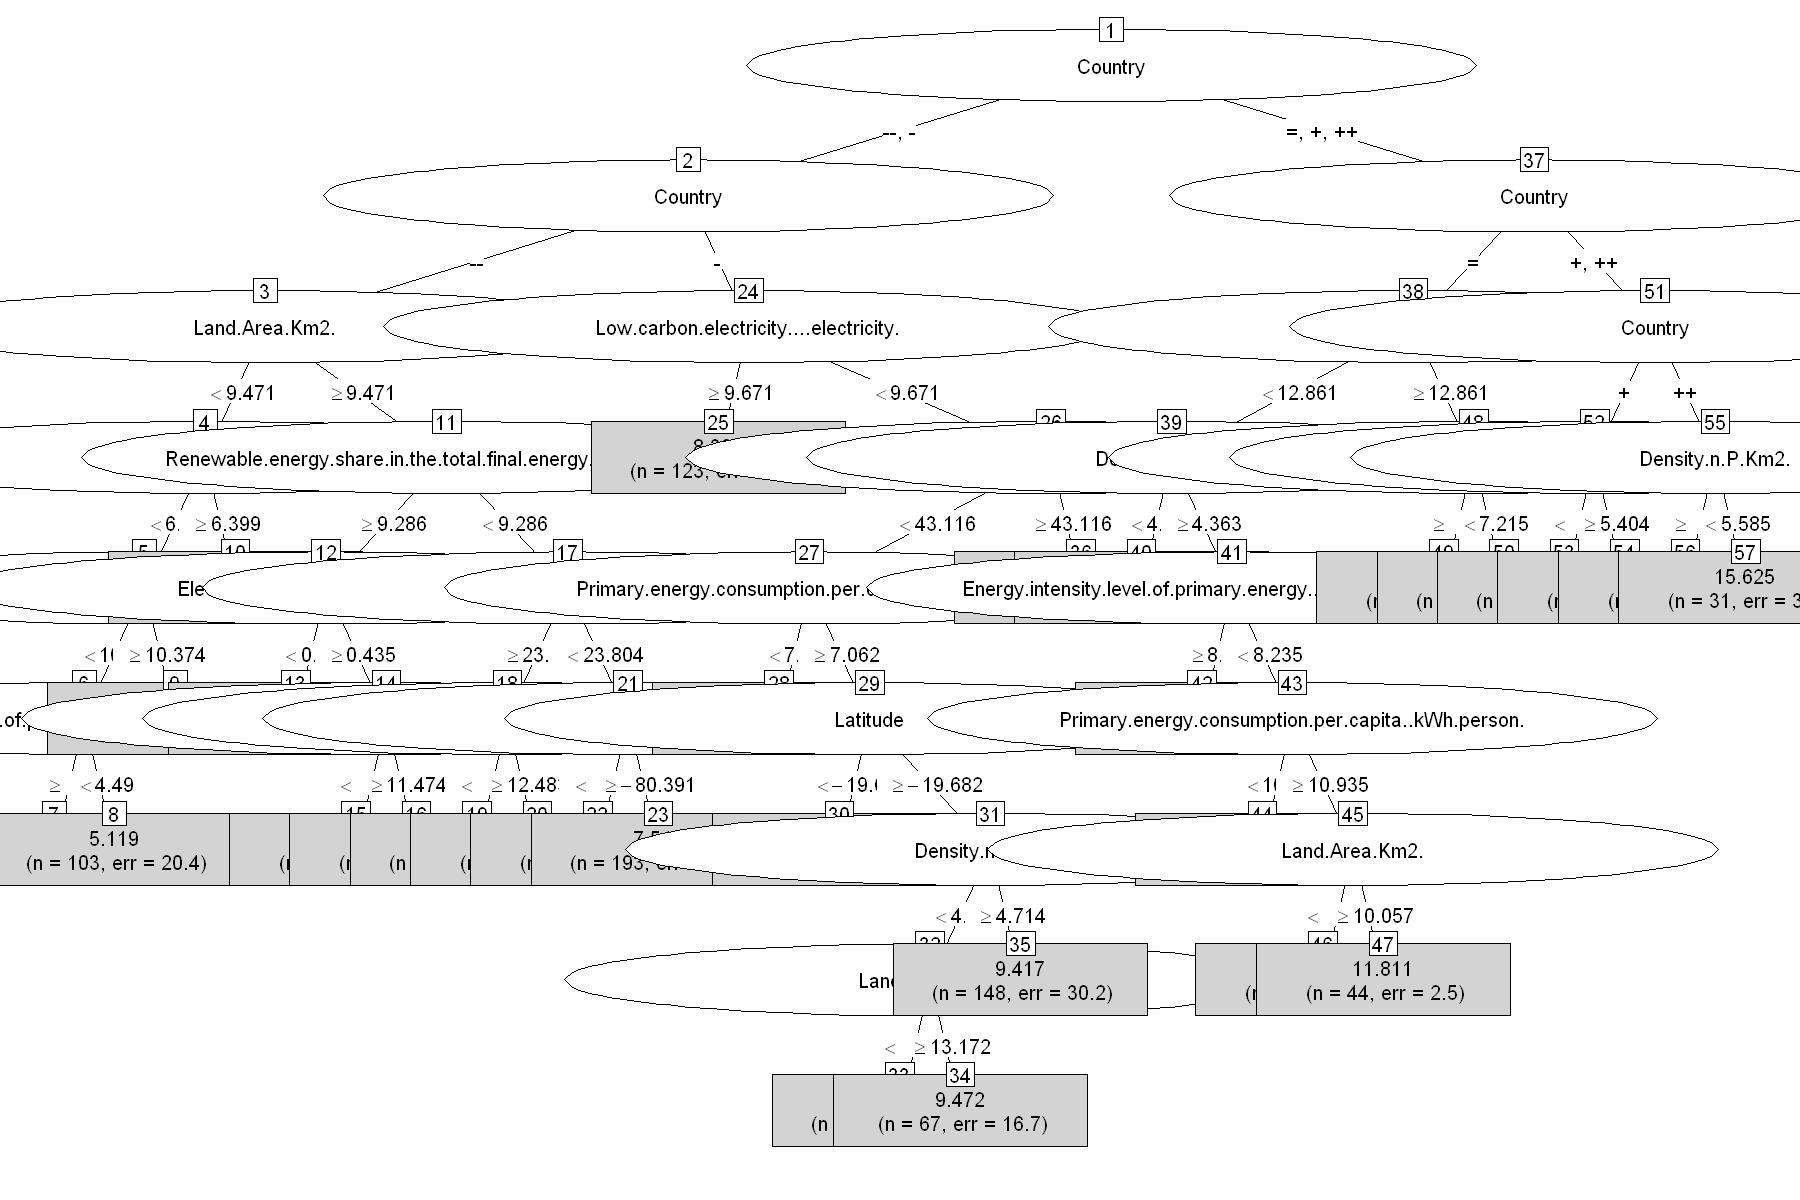

In [42]:
library(partykit)
plot(as.party(tree.reg), type="simple")

Warning message:
"Removed 20 rows containing missing values or values outside the scale range (`geom_point()`)."


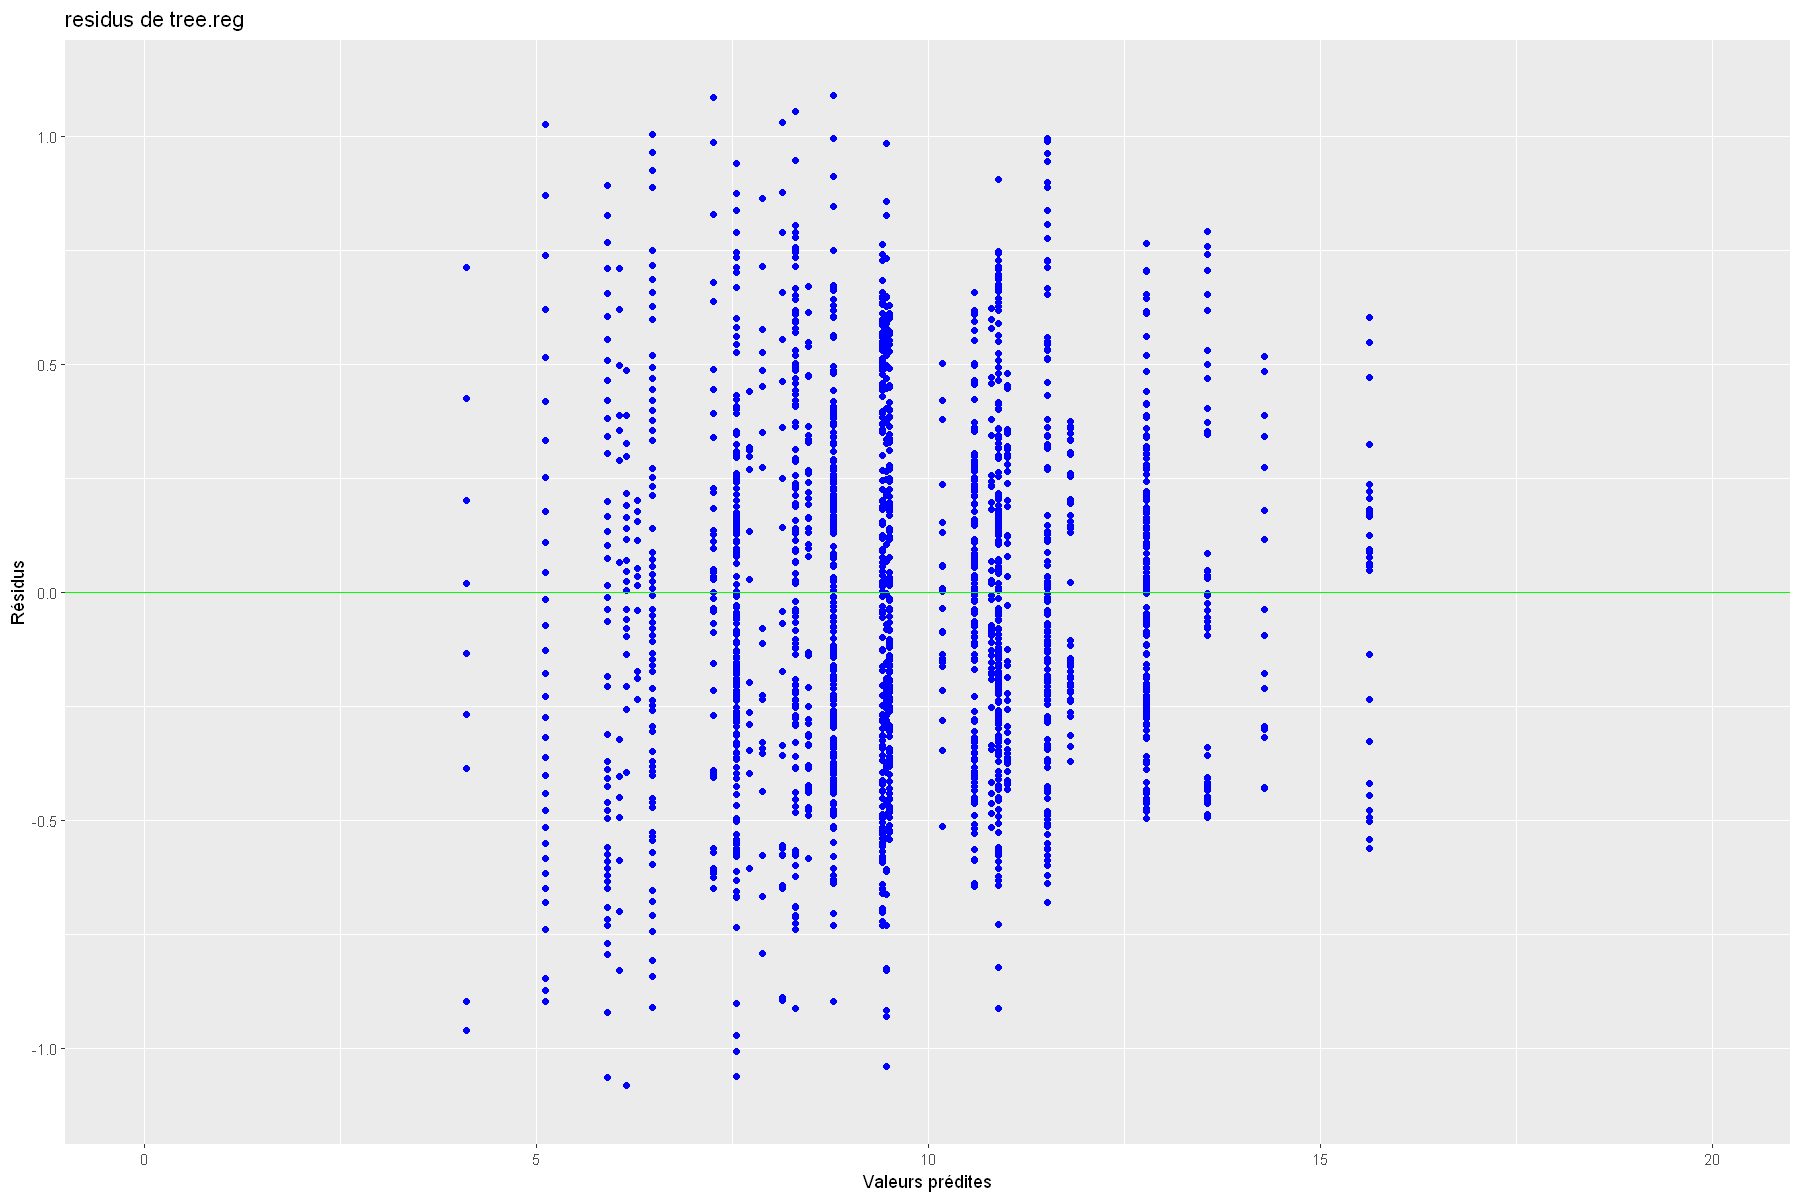

In [43]:
fit.tree=predict(tree.reg)
res.tree=fit.tree-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.tree,res.tree,"residus de tree.reg")

In [44]:
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision en régression
sum((pred.treer-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr)

[1] 0.1802351

In [45]:
library(randomForest)
help(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : 'randomForest'


L'objet suivant est masqué depuis 'package:gridExtra':

    combine


L'objet suivant est masqué depuis 'package:dplyr':

    combine


L'objet suivant est masqué depuis 'package:ggplot2':

    margin




randomForest           package:randomForest            R Documentation

_C_l_a_s_s_i_f_i_c_a_t_i_o_n _a_n_d _R_e_g_r_e_s_s_i_o_n _w_i_t_h _R_a_n_d_o_m _F_o_r_e_s_t

_D_e_s_c_r_i_p_t_i_o_n:

     'randomForest' implements Breiman's random forest algorithm (based
     on Breiman and Cutler's original Fortran code) for classification
     and regression.  It can also be used in unsupervised mode for
     assessing proximities among data points.

_U_s_a_g_e:

     ## S3 method for class 'formula'
     randomForest(formula, data=NULL, ..., subset, na.action=na.fail)
     ## Default S3 method:
     randomForest(x, y=NULL,  xtest=NULL, ytest=NULL, ntree=500,
                  mtry=if (!is.null(y) && !is.factor(y))
                  max(floor(ncol(x)/3), 1) else floor(sqrt(ncol(x))),
                  weights=NULL,
                  replace=TRUE, classwt=NULL, cutoff, strata,
                  sampsize = if (replace) nrow(x) else ceiling(.632*nrow(x)),
                  nodesize = if (!is.null(y) && !is.factor(y)) 5 else 1,
                  maxnodes = NULL,
                  importance=FALSE, localImp=FALSE, nPerm=1,
                  proximity, oob.prox=proximity,
                  norm.votes=TRUE, do.trace=FALSE,
                  keep.forest=!is.null(y) && is.null(xtest), corr.bias=FALSE,
                  keep.inbag=FALSE, ...)
     ## S3 method for class 'randomForest'
     print(x, ...)
     
_A_r_g_u_m_e_n_t_s:

    data: an optional data frame containing the variables in the model.
          By default the variables are taken from the environment which
          'randomForest' is called from.

  subset: an index vector indicating which rows should be used.  (NOTE:
          If given, this argument must be named.)

na.action: A function to specify the action to be taken if NAs are
          found.  (NOTE: If given, this argument must be named.)

x, formula: a data frame or a matrix of predictors, or a formula
          describing the model to be fitted (for the 'print' method, an
          'randomForest' object).

       y: A response vector.  If a factor, classification is assumed,
          otherwise regression is assumed.  If omitted, 'randomForest'
          will run in unsupervised mode.

   xtest: a data frame or matrix (like 'x') containing predictors for
          the test set.

   ytest: response for the test set.

   ntree: Number of trees to grow.  This should not be set to too small
          a number, to ensure that every input row gets predicted at
          least a few times.

    mtry: Number of variables randomly sampled as candidates at each
          split.  Note that the default values are different for
          classification (sqrt(p) where p is number of variables in
          'x') and regression (p/3)

 weights: A vector of length same as 'y' that are positive weights used
          only in sampling data to grow each tree (not used in any
          other calculation)

 replace: Should sampling of cases be done with or without replacement?

 classwt: Priors of the classes.  Need not add up to one.  Ignored for
          regression.

  cutoff: (Classification only) A vector of length equal to number of
          classes.  The `winning' class for an observation is the one
          with the maximum ratio of proportion of votes to cutoff.
          Default is 1/k where k is the number of classes (i.e.,
          majority vote wins).

  strata: A (factor) variable that is used for stratified sampling.

sampsize: Size(s) of sample to draw.  For classification, if sampsize
          is a vector of the length the number of strata, then sampling
          is stratified by strata, and the elements of sampsize
          indicate the numbers to be drawn from the strata.

nodesize: Minimum size of terminal nodes.  Setting this number larger
          causes smaller trees to be grown (and thus take less time).
          Note that the default values a

In [47]:
rf.reg=randomForest(Value_co2_emissions_kt_by_country~., data=datappr,xtest=datestr[,-10],ytest=datestr[,"Value_co2_emissions_kt_by_country"],
   ntree=500,do.trace=50,importance=TRUE)
attributes(rf.reg)
rf.reg$mtry

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.01917     0.34 |  0.01599     0.28 |
 100 |  0.01626     0.29 |  0.01511     0.26 |
 150 |  0.01535     0.27 |  0.01456     0.25 |
 200 |  0.01487     0.26 |  0.01427     0.25 |
 250 |  0.01474     0.26 |  0.01417     0.24 |
 300 |  0.01455     0.26 |  0.01411     0.24 |
 350 |  0.01422     0.25 |  0.01397     0.24 |
 400 |   0.0141     0.25 |  0.01393     0.24 |
 450 |  0.01391     0.25 |  0.01389     0.24 |
 500 |  0.01388     0.25 |  0.01394     0.24 |


$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 5

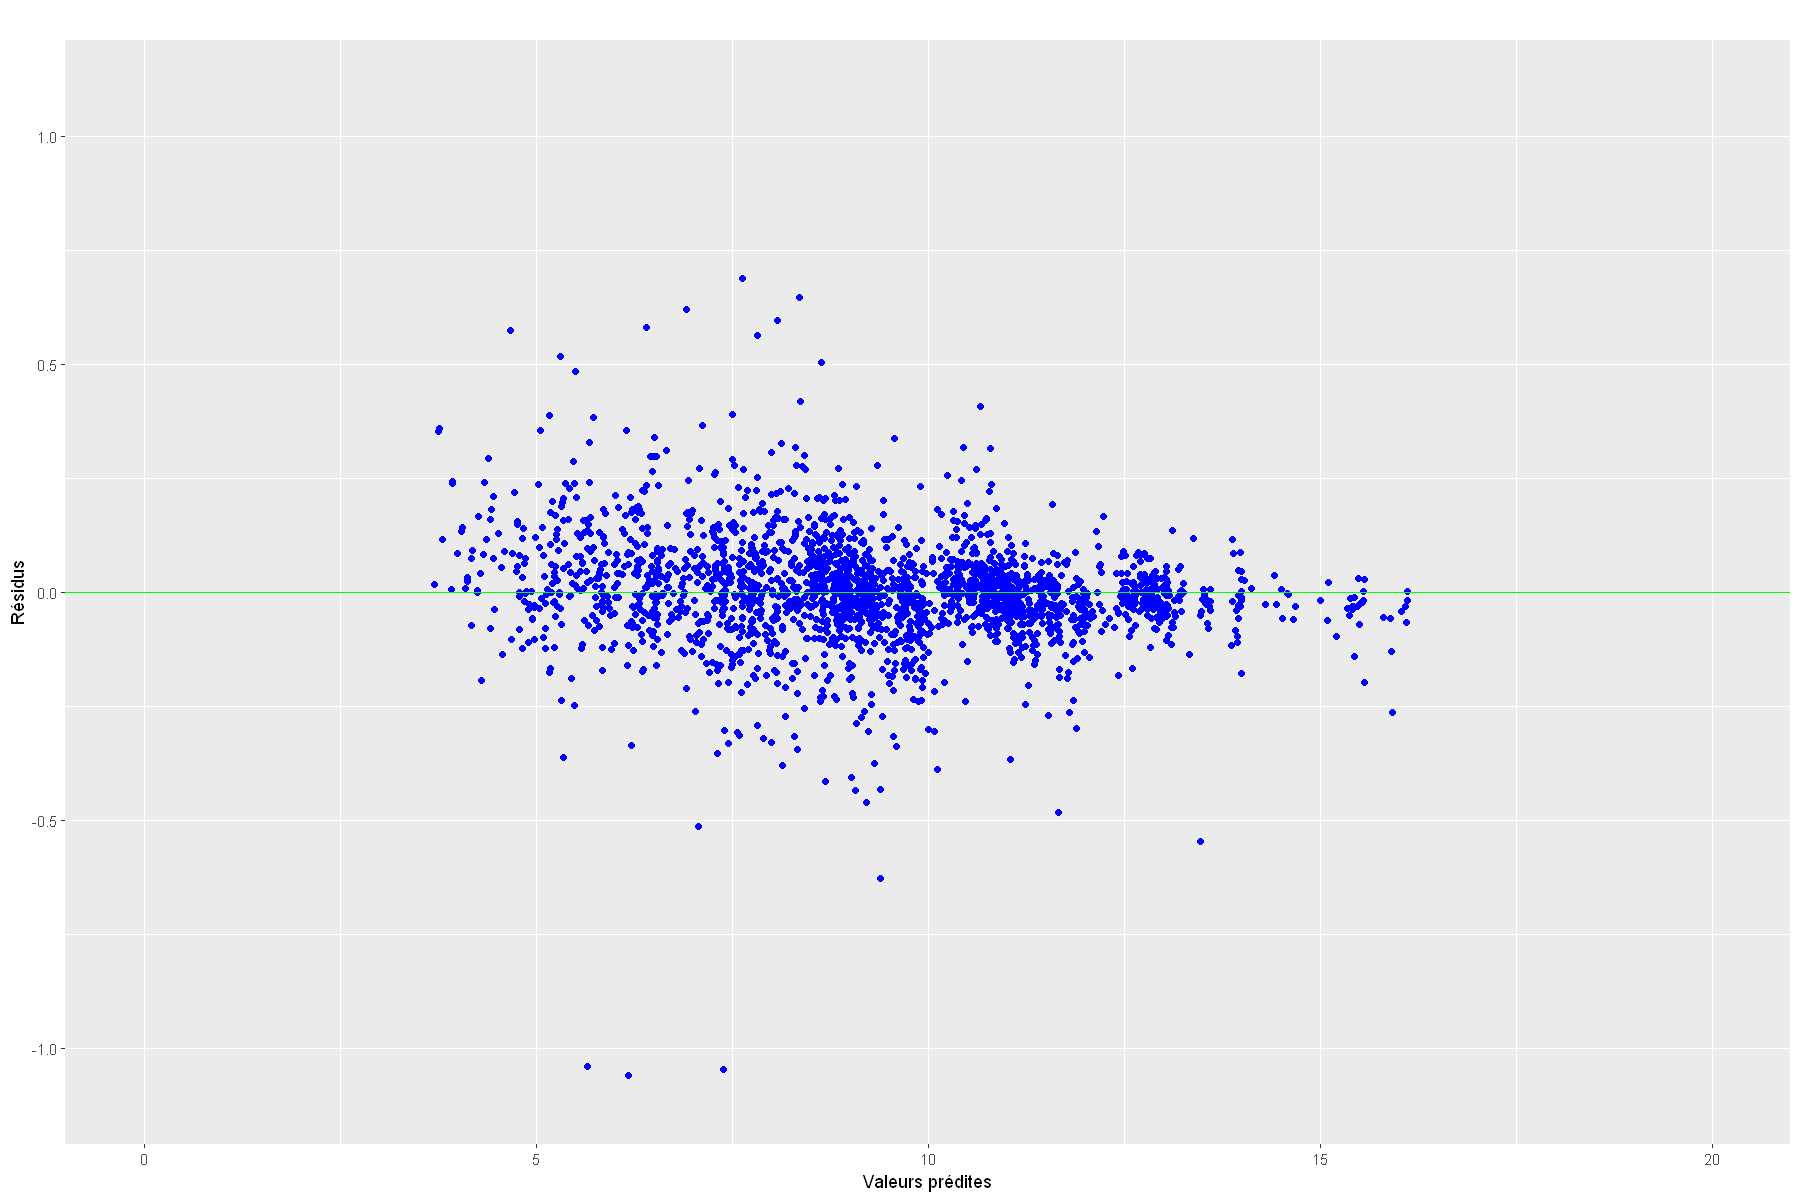

In [48]:
fit.rfr=rf.reg$predicted
res.rfr=fit.rfr-datappr[,"Value_co2_emissions_kt_by_country"]
gplot.res(fit.rfr,res.rfr,titre="")

Country 
                                                           50.34 
                                                Density.n.P.Km2. 
                                                           34.50 
                                                            Year 
                                                           32.73 
                                                  Land.Area.Km2. 
                                                           30.36 
     Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                           28.24 
                                                       Longitude 
                                                           27.79 
                          Low.carbon.electricity....electricity. 
                                                           26.51 
                               Electricity.from.renewables..TWh. 
                                                           24.23 
                                                        Latitude 
                                                           23.72 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                           18.89 
              Primary.energy.consumption.per.capita..kWh.person. 
                                                           16.23 
                                                  gdp_per_capita 
                                                           15.70 
                                  Electricity.from.nuclear..TWh. 
                                                           15.60 
                         Access.to.electricity....of.population. 
                                                           15.43 
                               Access.to.clean.fuels.for.cooking 
                                                           15.29 
                                                      gdp_growth 
                                                            8.74

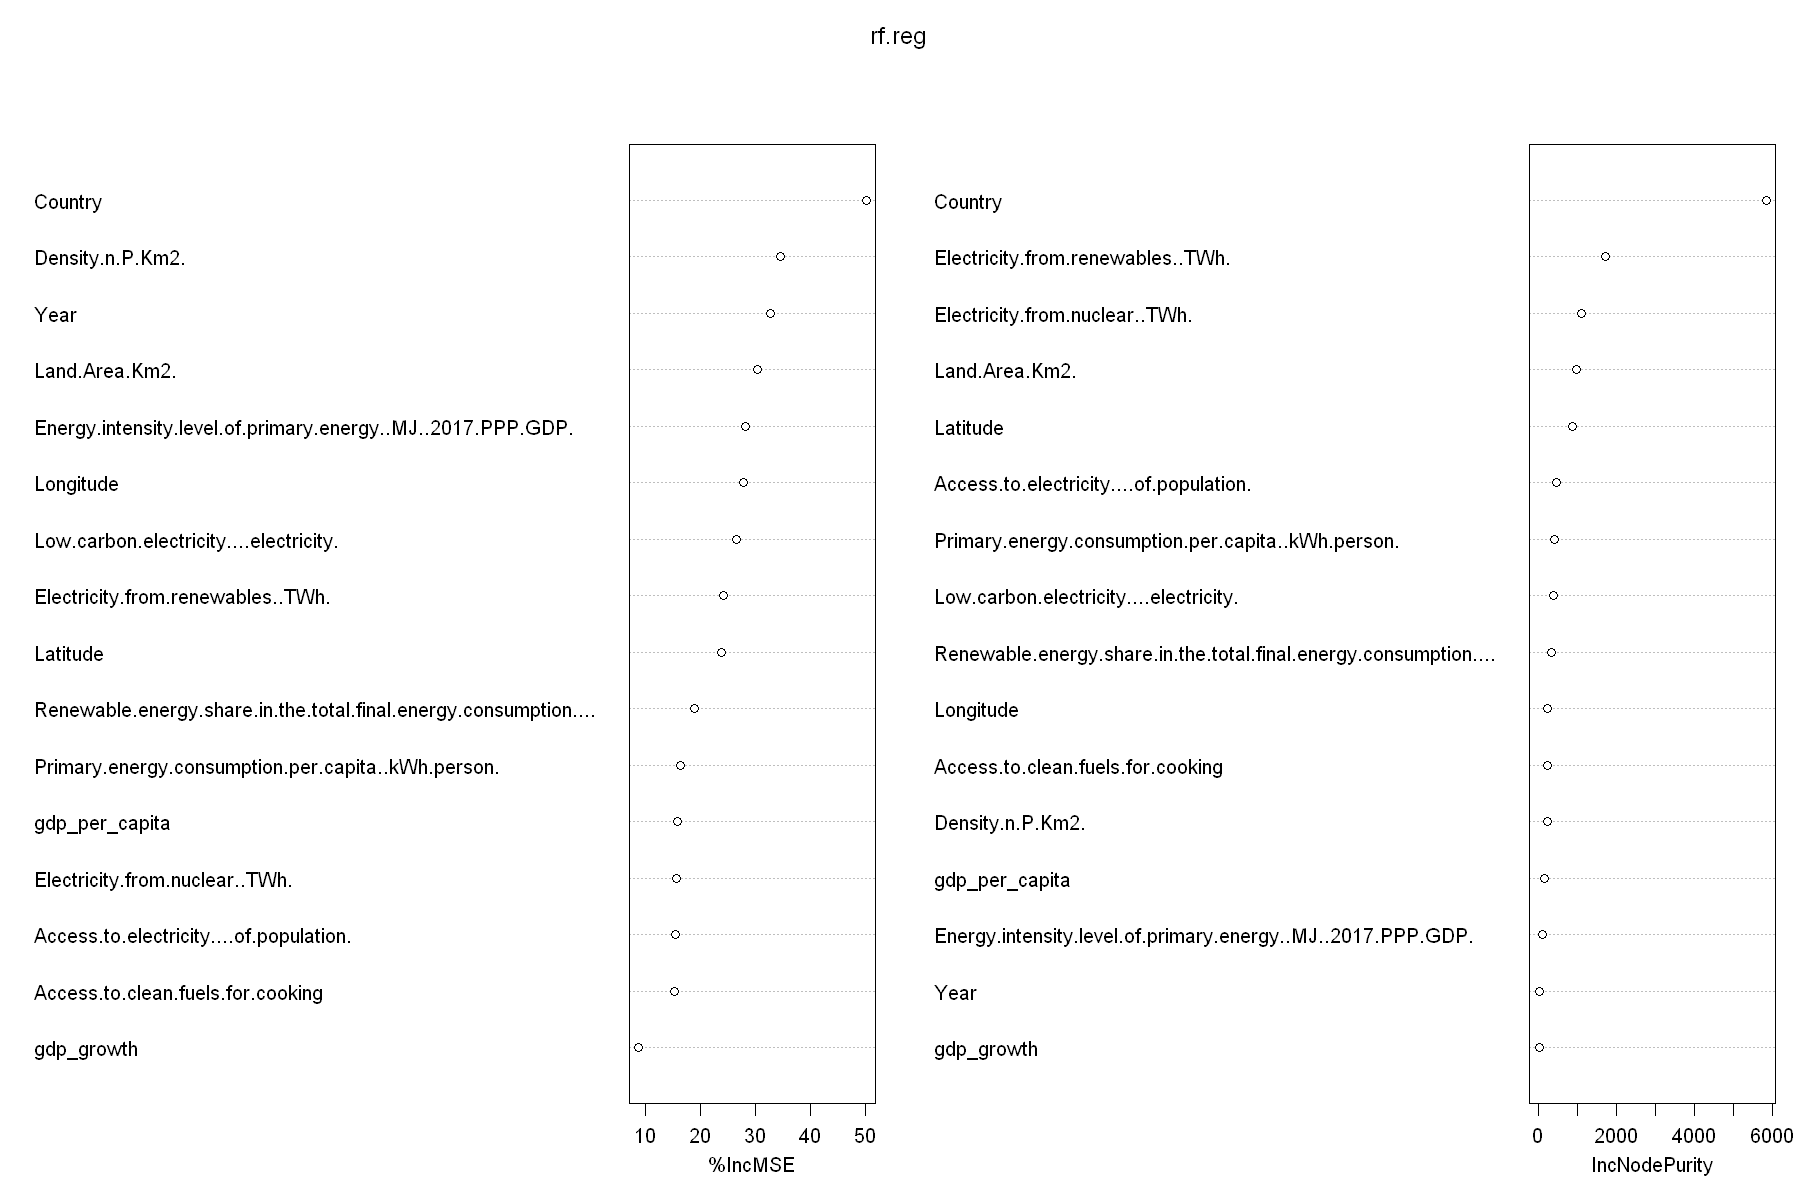

In [49]:
sort(round(importance(rf.reg), 2)[,1], decreasing=TRUE)
varImpPlot(rf.reg)

Le chargement a nécessité le package : randomForestSRC


 randomForestSRC 3.2.3 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 



Attachement du package : 'randomForestSRC'


Les objets suivants sont masqués depuis 'package:e1071':

    impute, tune


L'objet suivant est masqué depuis 'package:purrr':

    partial




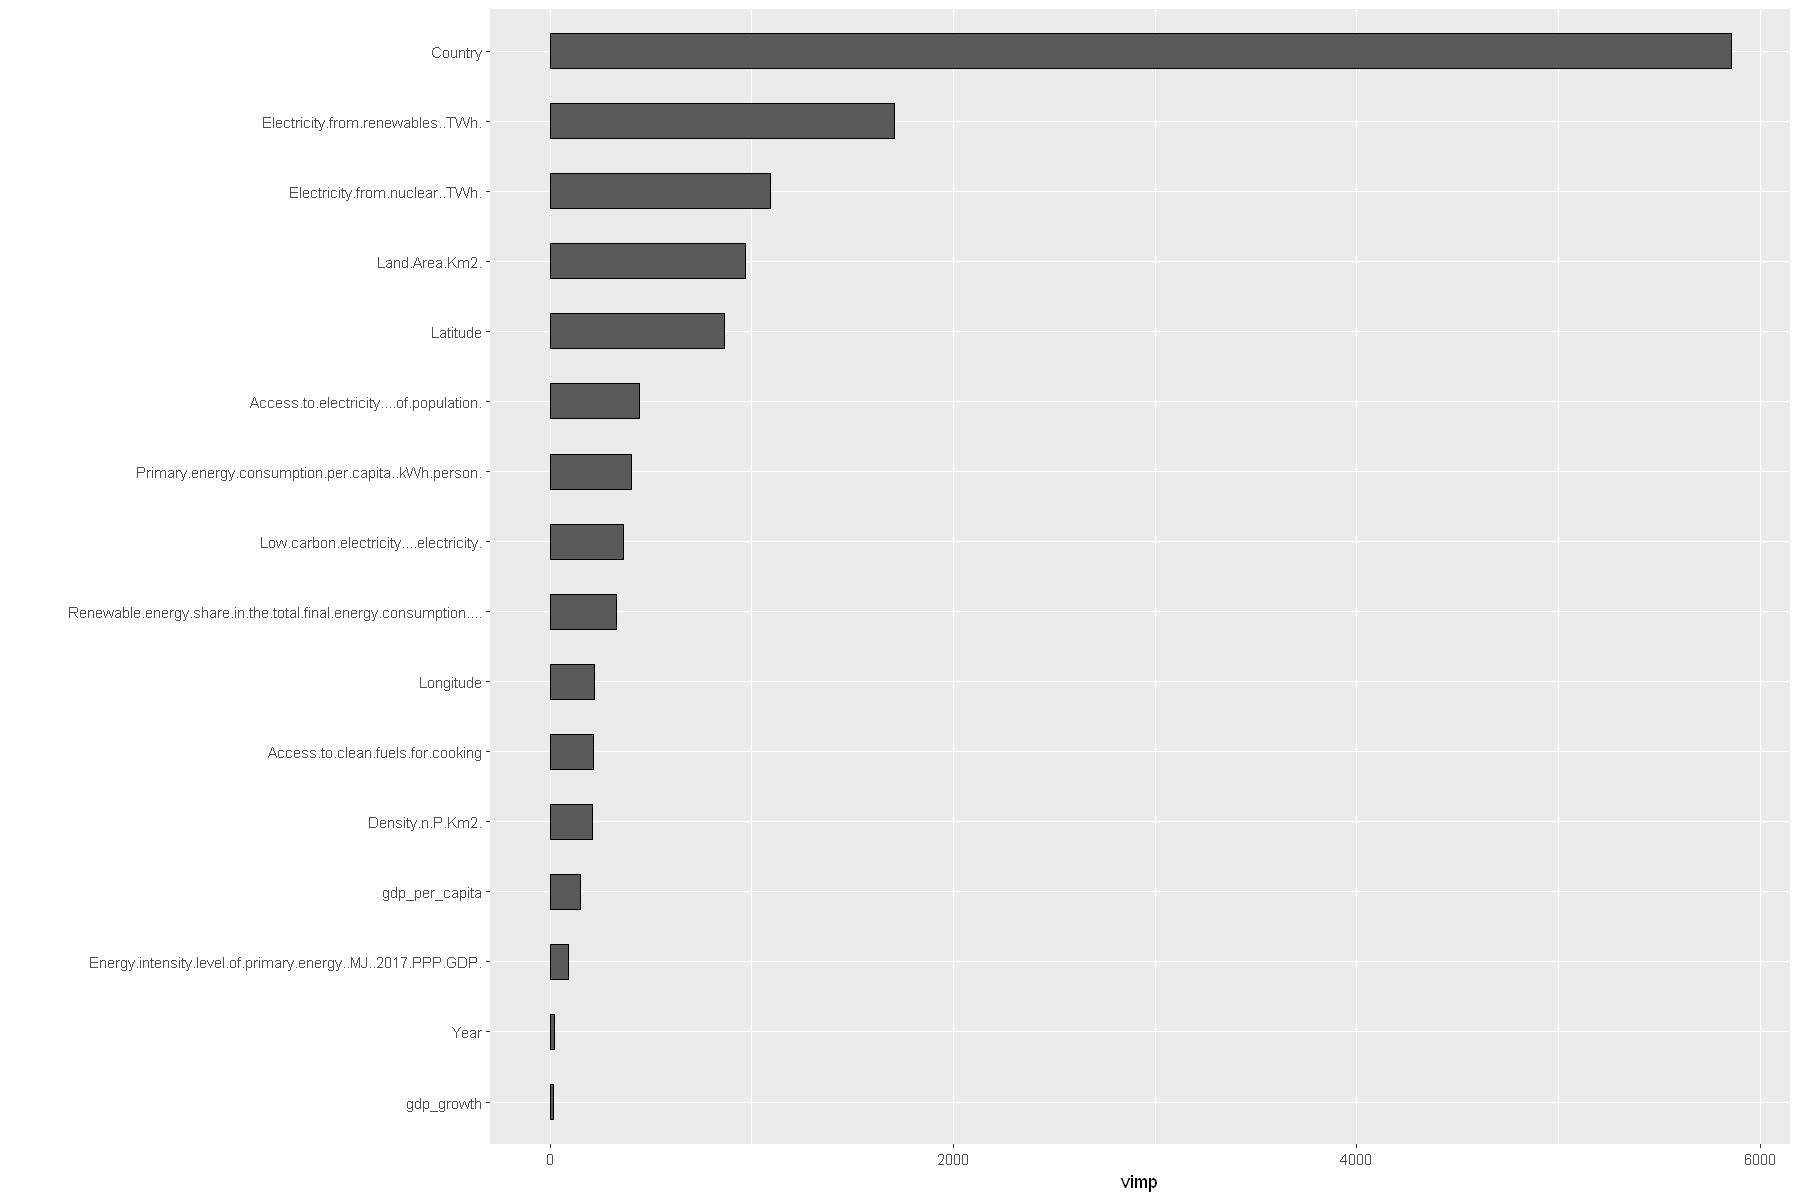

In [50]:
library(ggRandomForests)
plot(gg_vimp(rf.reg))

In [51]:
# Forêts aléatoires
pred.rfr=rf.reg$test$predicted
# Erreur quadratique moyenne de prévision
sum((pred.rfr-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr)

[1] 0.0139425

In [52]:
### conclusion : Random Forest mieux que toutes les méthodes précédemment implémentées, erreur : 0.014